# House Prices - Advanced Regression Techniques


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Загрузим данные
### Тренировочный набор

In [2]:
data = pd.read_csv("data/train.csv", index_col="Id")
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

### Тестовый набор

In [4]:
test_df = pd.read_csv("data/test.csv", index_col="Id");
test_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
test_df.Street.value_counts()

Street
Pave    1453
Grvl       6
Name: count, dtype: int64

## Предварительный анализ данных

### MSSubClass - тип жилья

- **20**: 1-этажный дом 1946 года постройки и новее (разных стилей)
- **30**: 1-этажный дом 1945 года постройки и старше
- **40**: 1-этажный дом с готовой мансардой (любой возраст)
- **45**: 1-2-этажный дом, незаконченный (любой возраст)
- **50**: 1-2-этажный дом, законченный (любой возраст)
- **60**: 2-этажный дом 1946 года постройки и новее
- **70**: 2-этажный дом 1945 года постройки и старше
- **75**: 1-2-этажный дом (любой возраст)
- **80**: раздельный или многоуровневый дом
- **85**: раздельное фойе
- **90**: сдвоенный - все стили и возрасты
- **120**: 1-этажная ПЗ (планируемая застройка) - 1946 и новее
- **150**: 1-2-этажный ПЗ (любой возраст)
- **160**: 2-этажная ПЗ - 1946 и новее
- **180**: ПЗ - многоуровневый - включая раздельное фойе
- **190**: 2 семейных общаги - для всех стилей и возрастов

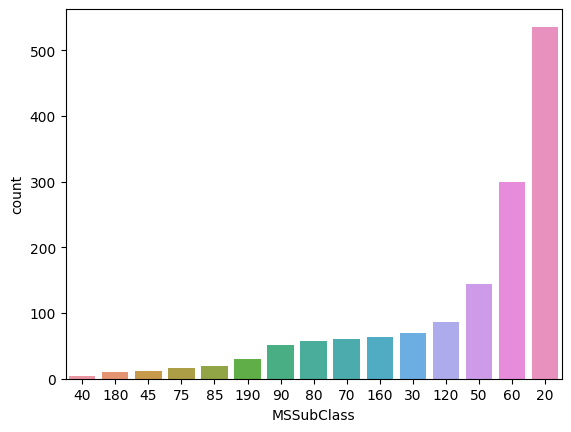

In [6]:
count_vals_subclass = data.MSSubClass.value_counts().reset_index()

sns.barplot(
    data=count_vals_subclass,
    x="MSSubClass",
    y="count",
    order=count_vals_subclass.sort_values("count").MSSubClass,
);

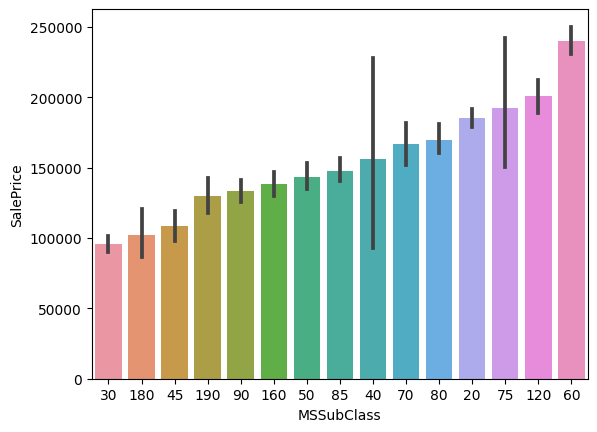

In [7]:
subclass_price_df = data.groupby("MSSubClass", as_index=False).SalePrice.mean()

sns.barplot(
    data=data,
    x="MSSubClass",
    y="SalePrice",
    order=subclass_price_df.sort_values("SalePrice").MSSubClass,
);

Заметня неплохая корреляция между типом жилья и его стоимостью. За исключением пожалуй 40 (1-этажный дом с готовой мансардой) и 75 (1-2 этажный дом для всех возрастов), у этих двух типов наблюдается сильный разброс в цене.

Заменим числовые коды соответствующие разным типам домов на среднюю цену в каждом классе, но значения 40 и 75 заменим на NaN из-за большого разброса в цене.

In [8]:
df = pd.DataFrame(data.MSSubClass).rename(columns={"MSSubClass": "subclass_price"})
# df.subclass_price.replace({40: np.nan, 75: np.nan}, inplace=True)
df.subclass_price.replace(subclass_price_df.MSSubClass.values,
                          subclass_price_df.SalePrice.values,
                          inplace=True)

df.head()

,subclass_price
Id,
1,239948.501672
2,185224.811567
3,239948.501672
4,166772.416667
5,239948.501672


## MSZoning - расположение дома

- **A**:	Сельское хозяйство
- **C**:	Комерческий
- **FV**:	Деревня на воде
- **I**:	Промышленная
- **RH**:	Высокая плотность застройки
- **RL**:	Низкая плотность застройки
- **RP**:	Низкая плотность застройки, рядом парк 
- **RM**:	Средняя плотность застройки

In [9]:
data.MSZoning.unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

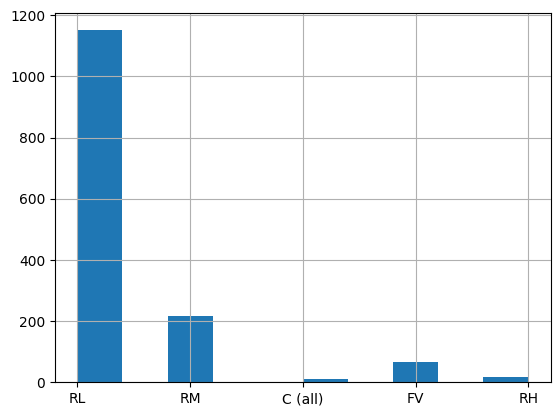

In [10]:
data.MSZoning.hist();

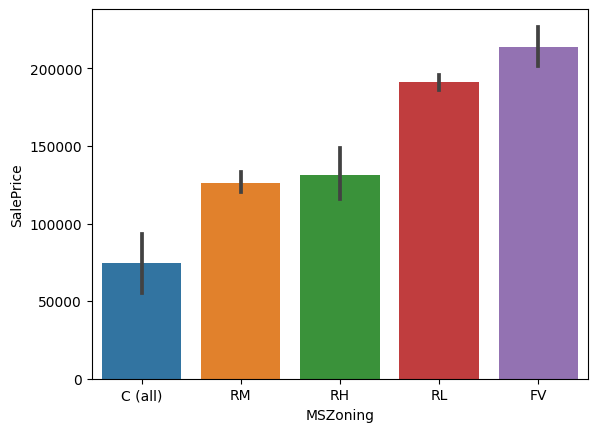

In [11]:
zoning_price_df = data.groupby("MSZoning", as_index=False).SalePrice.mean()

sns.barplot(
    data=data,
    x="MSZoning",
    y="SalePrice",
    order=zoning_price_df.sort_values("SalePrice").MSZoning,
);

...

## LotFrontage - длина линии, по которой дом соединен с улицей

In [12]:
data.LotFrontage.isna().sum()

259

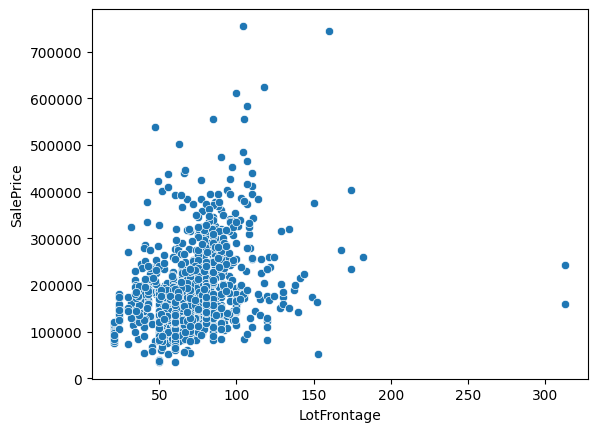

In [13]:
sns.scatterplot(data=data, x="LotFrontage", y="SalePrice");

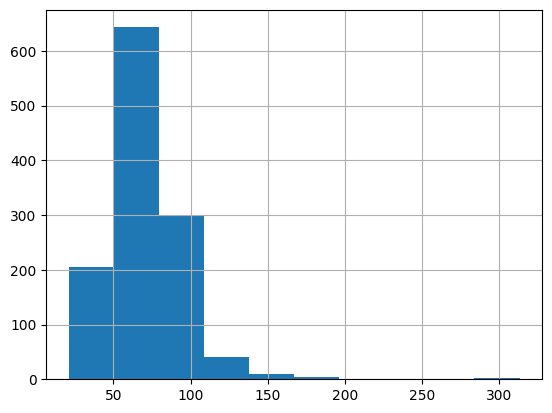

In [14]:
data.LotFrontage.hist();

Этот признак довольно слабо коррелирует с ценой дома, и тем более 259 значений пропущено. Его отбросим

## LotArea - размер участка в квадратных футах

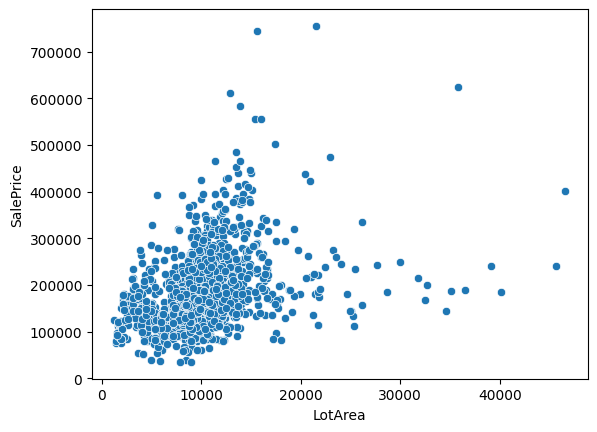

In [15]:
sns.scatterplot(data=data.query("LotArea <= 50000"), x="LotArea", y="SalePrice");

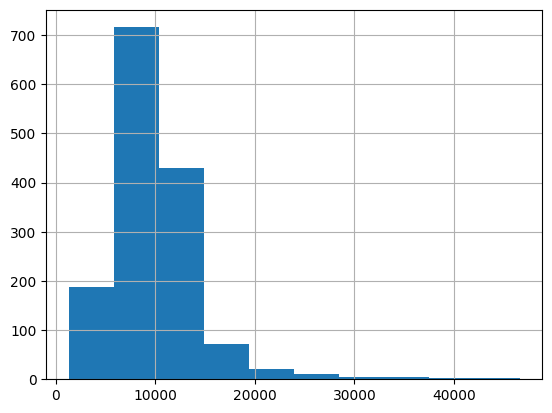

In [16]:
data.query("LotArea <= 50000").LotArea.hist();

Площадь участка довольно важный признак при выборе дома, поэтому его мы оставим

In [17]:
df["lot_area"] = data.LotArea
df.head()

,subclass_price,lot_area
Id,,
1,239948.501672,8450
2,185224.811567,9600
3,239948.501672,11250
4,166772.416667,9550
5,239948.501672,14260


## Street - тип подъездной дороги

- **Grvl** (Graveld) - грунтовая дорога
- **Pave** (Paved) - бетонная/плиточная дорога

Напрашивается предположение, что дома с грунтовой дорогой стоят меньше, чем с бетонной

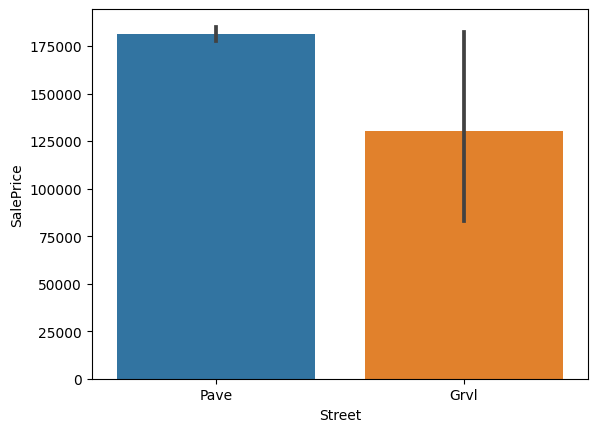

In [18]:
sns.barplot(data=data, x="Street", y="SalePrice");

In [19]:
data.Street.value_counts()

Street
Pave    1454
Grvl       6
Name: count, dtype: int64

Наличие вымощенной дороги явно определяет будущую цену дома, в то время как цена домов с грунтовой дорогой сильно варьируется. Добавим в тренировочный фрейм булеву колнку, которая будет соответствовать типу дороги.

In [20]:
df["pav_strt"] = (data.Street == "Pave").astype(np.int64)
df.head()

,subclass_price,lot_area,pav_strt
Id,,,
1,239948.501672,8450,1
2,185224.811567,9600,1
3,239948.501672,11250,1
4,166772.416667,9550,1
5,239948.501672,14260,1


## Alley - тип подъездной аллеи
- **Grvl** (Graved) - грунтовая
- **Pave** (Paved) - вымощенная
- **NA** (No alley access) - отсутствует (составляет большую часть данных)

In [21]:
data.Alley.isna().sum()

1369

In [22]:
data.Alley.fillna("NA", inplace=True)
data.Alley.value_counts()

Alley
NA      1369
Grvl      50
Pave      41
Name: count, dtype: int64

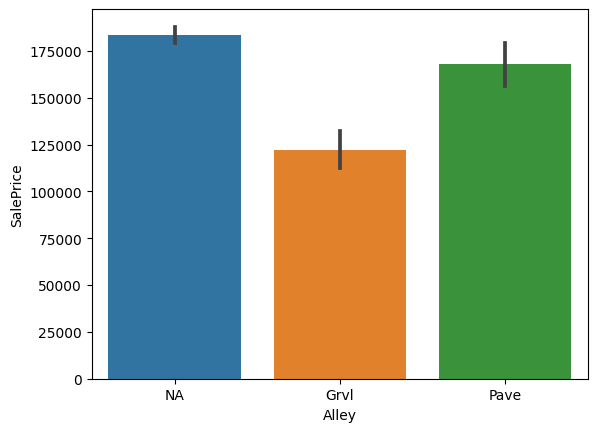

In [23]:
sns.barplot(data=data, x="Alley", y="SalePrice");

Наблюдаем интересный график: дома, на подъезде к которым нет аллеи, в основном стоят дороже. Добавим в фрейм еще две колонки соответствующие типу аллеи: graved_alley и paved_alley

In [24]:
df["grav_al"] = (data.Alley == "Grvl").astype(np.int64)
df["pav_al"] = (data.Alley == "Pave").astype(np.int64)
df.head()

,subclass_price,lot_area,pav_strt,grav_al,pav_al
Id,,,,,
1,239948.501672,8450,1,0,0
2,185224.811567,9600,1,0,0
3,239948.501672,11250,1,0,0
4,166772.416667,9550,1,0,0
5,239948.501672,14260,1,0,0


## LotShape - форма участка

- **Reg** (regular) - симметричный
- **IR1** - слегка не симметричный
- **IR2** - умеренно не симметричный
- **IR3** - совсем не симметричный

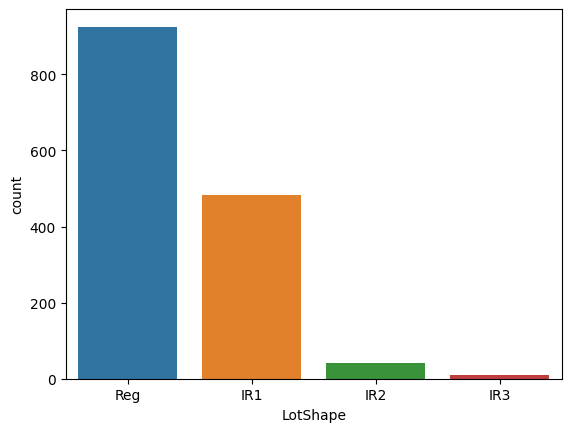

In [25]:
sns.countplot(data=data, x="LotShape");

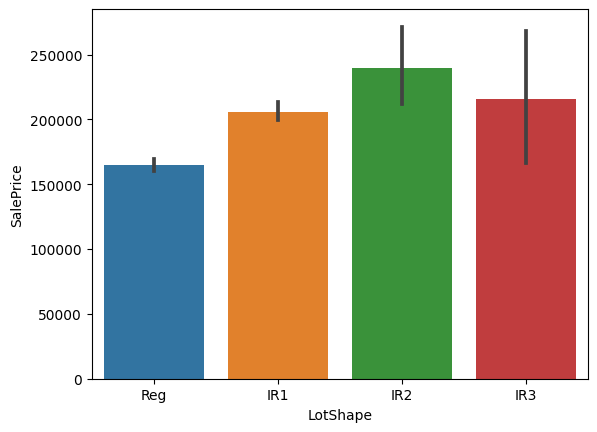

In [26]:
sns.barplot(data=data, x="LotShape", y="SalePrice");

In [27]:
data.groupby('LotShape').SalePrice.describe().sort_values("mean")

,count,mean,std,min,25%,50%,75%,max
LotShape,,,,,,,,
Reg,925.0,164754.818378,69673.427215,34900.0,120000.0,146000.0,188000.0,582933.0
IR1,484.0,206101.665289,85858.489559,52000.0,150000.0,189000.0,239000.0,755000.0
IR3,10.0,216036.500000,82540.334855,73000.0,167875.0,203570.0,265000.0,375000.0
IR2,41.0,239833.365854,99669.427362,110000.0,175000.0,221000.0,250000.0,538000.0


В среднем симметричные участки (reg и IR1) стоят дешевле, чем не симметричные, поэтому добавим данный признак в фрейм. RegShape: 1 - регулярный участок, 0 - соответстсвует IR1, IR2, IR3.

In [28]:
df["regShape"] = (data.LotShape == "Reg").astype(np.int64)
df.head()

,subclass_price,lot_area,pav_strt,grav_al,pav_al,regShape
Id,,,,,,
1,239948.501672,8450,1,0,0,1
2,185224.811567,9600,1,0,0,1
3,239948.501672,11250,1,0,0,0
4,166772.416667,9550,1,0,0,0
5,239948.501672,14260,1,0,0,0


## LandContour - ровность участка
- **Lvl** () - ровный
- **Bnk** () - на склоне холма
- **HLS** () - склон холма
- **Low** - разный

In [29]:
data.groupby('LandContour').SalePrice.describe().sort_values('mean')

,count,mean,std,min,25%,50%,75%,max
LandContour,,,,,,,,
Bnk,63.0,143104.079365,49361.244074,52500.0,113000.0,139400.0,171250.00,315000.0
Lvl,1311.0,180183.746758,78463.567918,34900.0,130000.0,162900.0,212000.00,755000.0
Low,36.0,203661.111111,83935.353620,39300.0,143000.0,190000.0,263750.00,385000.0
HLS,50.0,231533.940000,101790.139741,82500.0,151750.0,222250.0,281347.25,538000.0


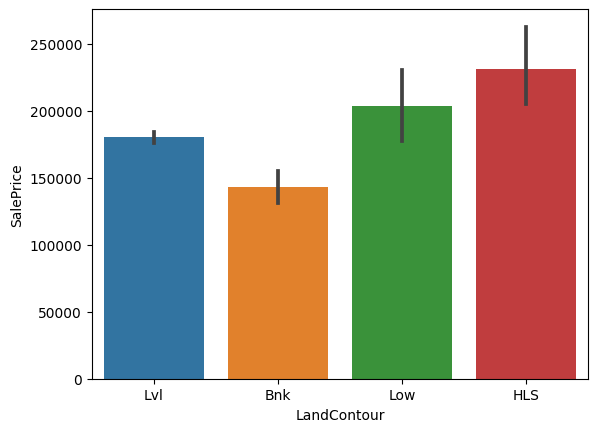

In [30]:
sns.barplot(data=data, x="LandContour", y="SalePrice");

In [31]:
df["lvlContour"] = (data.LandContour == "Lvl").astype(np.int64)
df["hlsContour"] = (data.LandContour == "HLS").astype(np.int64)
df["bnkContour"] = (data.LandContour == "Bnk").astype(np.int64)
df.head()

,subclass_price,lot_area,pav_strt,grav_al,pav_al,regShape,lvlContour,hlsContour,bnkContour
Id,,,,,,,,,
1,239948.501672,8450,1,0,0,1,1,0,0
2,185224.811567,9600,1,0,0,1,1,0,0
3,239948.501672,11250,1,0,0,0,1,0,0
4,166772.416667,9550,1,0,0,0,1,0,0
5,239948.501672,14260,1,0,0,0,1,0,0


## Utilities - тип доступных коммунальных услуг
- **AllPub** - все коммунальные услуги
- **NoSewr** - только электричество, газ и вода, кроме канализации
- **NoSeWa** - только электричество и газ
- **ELO** - только электричество

In [32]:
data.groupby("Utilities").SalePrice.describe()

,count,mean,std,min,25%,50%,75%,max
Utilities,,,,,,,,
AllPub,1459.0,180950.95682,79461.599814,34900.0,129950.0,163000.0,214000.0,755000.0
NoSeWa,1.0,137500.00000,NaN,137500.0,137500.0,137500.0,137500.0,137500.0


Что тут можно сказать, все дома, кроме одного, имеют доступ ко всем коммуникациям. Что касается тестового набора данных, то там аналогичная картина, но есть 2 неопределенных значения (все остальные - AllPub). **Отбросим** данный признак.

## LotConfig - расположение участка
- **Inside** - внутренний участок
- **Corner** - находится в углу сектора
- **Culdesac** - тупик
- **FR2** - с 2-х сторон есть фасад соседних домов
- **FR3** - с 3-х сторон есть фасад соседних домов

In [33]:
data.groupby("LotConfig").SalePrice.describe().sort_values("mean")

,count,mean,std,min,25%,50%,75%,max
LotConfig,,,,,,,,
Inside,1052.0,176938.047529,76426.805787,34900.0,128000.0,159697.5,207125.0,611657.0
FR2,47.0,177934.574468,62788.926829,81000.0,143500.0,165000.0,194500.0,394617.0
Corner,263.0,181623.425856,84466.041222,52500.0,129250.0,160000.0,220000.0,755000.0
FR3,4.0,208475.000000,78379.222374,128000.0,169925.0,195450.0,234000.0,315000.0
CulDSac,94.0,223854.617021,93117.546586,84000.0,156475.0,199262.0,269342.5,625000.0


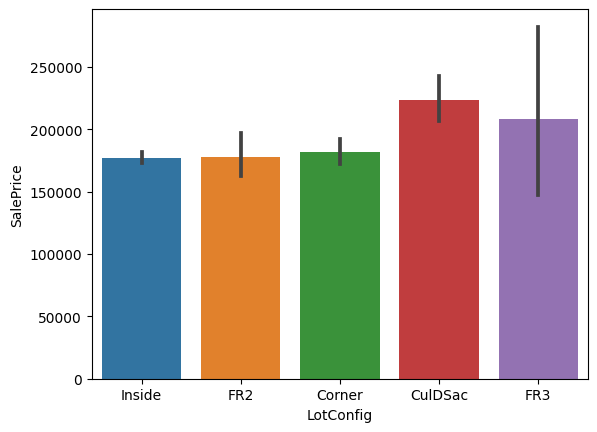

In [34]:
sns.barplot(data=data, x="LotConfig", y="SalePrice");

Признак расположения дома тоже отбросим

## LandSlope - наклон участка
- **Gtl** - Пологий склон
- **Mod** - Умеренный наклон
- **Sev** - Крутой склон

In [35]:
data.groupby("LandSlope").SalePrice.describe().sort_values("mean")

,count,mean,std,min,25%,50%,75%,max
LandSlope,,,,,,,,
Gtl,1382.0,179956.799566,78669.369151,34900.0,129900.0,161875.0,212000.0,755000.0
Mod,65.0,196734.138462,92375.358116,39300.0,130000.0,186700.0,259500.0,538000.0
Sev,13.0,204379.230769,86729.922409,61000.0,143000.0,185000.0,260000.0,375000.0


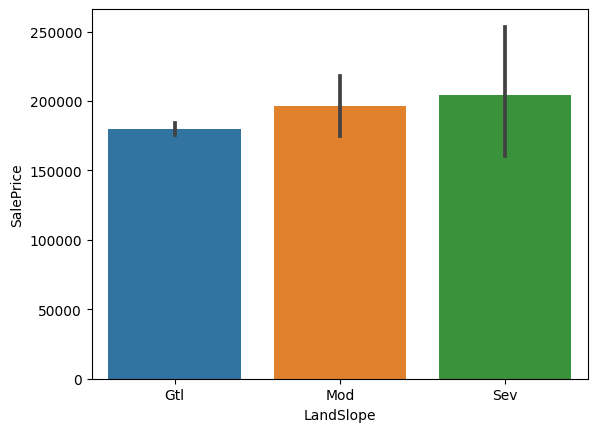

In [36]:
sns.barplot(x=data.LandSlope, y=data.SalePrice);

Наклон участка также не оказывает сильного влияния на цену, отбрасываем его

## Neighborhood - расположение в пределах города Эймс
Там перечисляется куча районов, не будем их тут все приводить, потому что это всего лишь названия

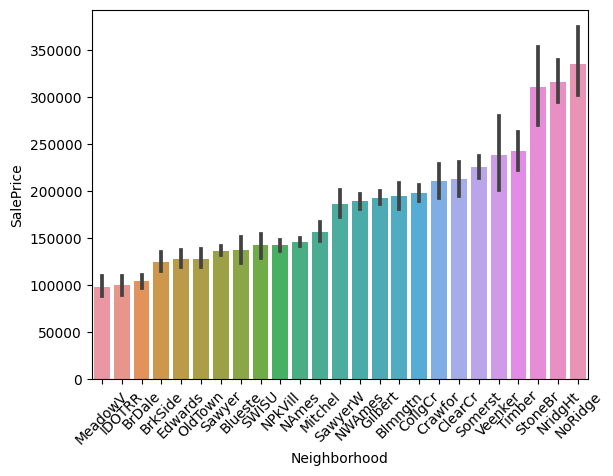

In [37]:
neighboe_price_df = data.groupby("Neighborhood", as_index=False).SalePrice.mean()

sns.barplot(
    data=data,
    x="Neighborhood",
    y="SalePrice",
    order=neighboe_price_df.sort_values("SalePrice").Neighborhood,
);
plt.xticks(rotation=45);

А вот район города оказывает значительное влияние на цену дома, значит этот признак нам понадобится. Вместо названий районов возьмем среднюю цену дома в каждом из них.

In [38]:
df["Neighborhood"] = data.Neighborhood.replace(neighboe_price_df.Neighborhood.values,
                                               neighboe_price_df.SalePrice.values)
df.head()

,subclass_price,lot_area,pav_strt,grav_al,pav_al,regShape,lvlContour,hlsContour,bnkContour,Neighborhood
Id,,,,,,,,,,
1,239948.501672,8450,1,0,0,1,1,0,0,197965.773333
2,185224.811567,9600,1,0,0,1,1,0,0,238772.727273
3,239948.501672,11250,1,0,0,0,1,0,0,197965.773333
4,166772.416667,9550,1,0,0,0,1,0,0,210624.725490
5,239948.501672,14260,1,0,0,0,1,0,0,335295.317073


## Condition1 и Condition2 - близость к различным условиям

In [39]:
data.groupby("Condition1").SalePrice.describe().sort_values("mean")

,count,mean,std,min,25%,50%,75%,max
Condition1,,,,,,,,
Artery,48.0,135091.666667,66226.660548,66500.0,105000.00,119550.0,143000.0,475000.0
RRAe,11.0,138400.000000,24030.813553,87000.0,127750.00,142500.0,156500.0,171000.0
Feedr,81.0,142475.481481,42157.290117,40000.0,121600.00,140000.0,167500.0,244600.0
RRAn,26.0,184396.615385,66177.922070,79500.0,152393.75,171495.0,190105.0,423000.0
Norm,1260.0,184495.492063,81256.980125,34900.0,131500.00,166500.0,219500.0,755000.0
RRNe,2.0,190750.000000,5303.300859,187000.0,188875.00,190750.0,192625.0,194500.0
RRNn,5.0,212400.000000,93823.238060,110000.0,128000.00,214000.0,290000.0,320000.0
PosN,19.0,215184.210526,65256.536609,109500.0,167250.00,200000.0,252250.0,385000.0
PosA,8.0,225875.000000,52348.932313,180000.0,188750.00,212500.0,244000.0,335000.0


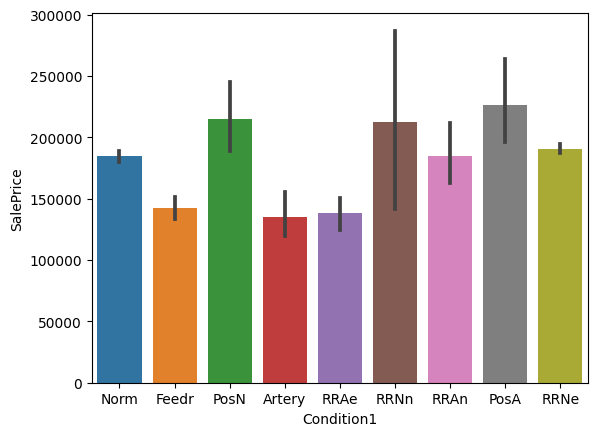

In [40]:
sns.barplot(data=data, x="Condition1", y="SalePrice");

In [41]:
data.groupby("Condition2").SalePrice.describe().sort_values("mean")

,count,mean,std,min,25%,50%,75%,max
Condition2,,,,,,,,
RRNn,2.0,96750.000000,39951.533137,68500.0,82625.0,96750.0,110875.0,125000.0
Artery,2.0,106500.000000,16263.455967,95000.0,100750.0,106500.0,112250.0,118000.0
Feedr,6.0,121166.666667,33544.994659,79500.0,95500.0,127500.0,137000.0,167500.0
RRAn,1.0,136905.000000,NaN,136905.0,136905.0,136905.0,136905.0,136905.0
Norm,1445.0,181169.405536,79337.735547,34900.0,130000.0,163500.0,214000.0,755000.0
RRAe,1.0,190000.000000,NaN,190000.0,190000.0,190000.0,190000.0,190000.0
PosN,2.0,284875.000000,141598.132933,184750.0,234812.5,284875.0,334937.5,385000.0
PosA,1.0,325000.000000,NaN,325000.0,325000.0,325000.0,325000.0,325000.0


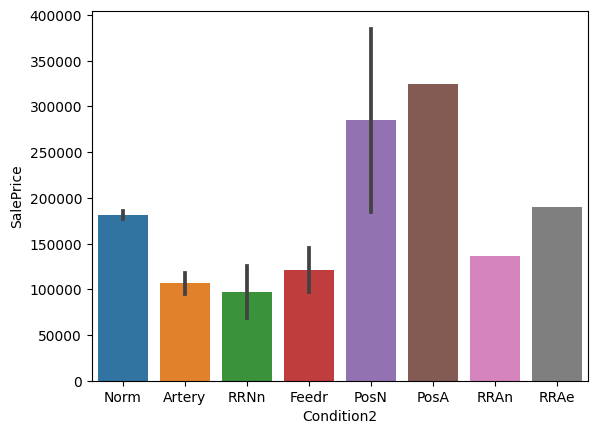

In [42]:
sns.barplot(data=data, x="Condition2", y="SalePrice");

Вообще странные признаки, потому что подавляющее большинство имеет значение Norm или нормальный. Отбросим эти два признака.

## BldgType - тип жилого помещения
- **1Fam** - 1 семья
- **1FmCon** - переоборудовано на 2 семьи (строилось для 1 семьи)
- **Duplx** - двухуровневый
- **TwnhsE** - конечная часть таунхауса
- **TwnhsI** - внутренняя часть таунхауса

In [43]:
data.groupby("BldgType").SalePrice.describe().sort_values("mean")

,count,mean,std,min,25%,50%,75%,max
BldgType,,,,,,,,
2fmCon,31.0,128432.258065,35458.545158,55000.0,106875.0,127500.0,142500.0,228950.0
Duplex,52.0,133541.076923,27833.249197,82000.0,118375.0,135980.0,145000.0,206300.0
Twnhs,43.0,135911.627907,41013.222080,75000.0,95750.0,137500.0,168750.0,230000.0
TwnhsE,114.0,181959.342105,60626.108918,75500.0,143187.5,172200.0,207375.0,392500.0
1Fam,1220.0,185763.807377,82648.502922,34900.0,131475.0,167900.0,222000.0,755000.0


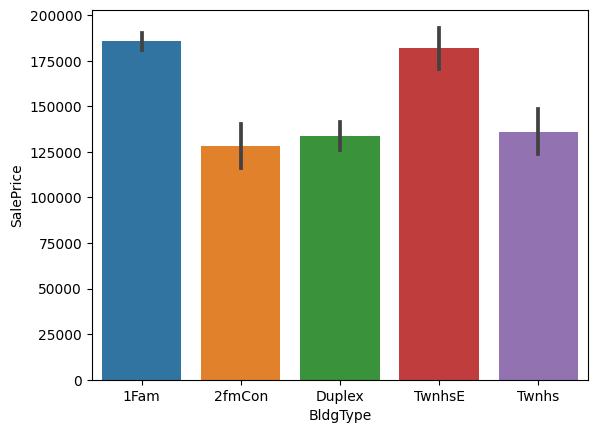

In [44]:
sns.barplot(data=data, x="BldgType", y="SalePrice");

Разделим по цене жилые помещения на два типа: в первый будут входить 1Fam, TwnhsE, а во второй - 2fmCon, Duplex и Twnhs. В качестве значений возьмем чреднюю цену по группе.

In [45]:
_sr = data.groupby("BldgType").SalePrice.median()
_sr

BldgType
1Fam      167900.0
2fmCon    127500.0
Duplex    135980.0
Twnhs     137500.0
TwnhsE    172200.0
Name: SalePrice, dtype: float64

In [46]:
df["BldgType"] = round(data.BldgType.map(_sr.to_dict()) / _sr.max(), 2)
df.head()

,subclass_price,lot_area,pav_strt,grav_al,pav_al,regShape,lvlContour,hlsContour,bnkContour,Neighborhood,BldgType
Id,,,,,,,,,,,
1,239948.501672,8450,1,0,0,1,1,0,0,197965.773333,0.98
2,185224.811567,9600,1,0,0,1,1,0,0,238772.727273,0.98
3,239948.501672,11250,1,0,0,0,1,0,0,197965.773333,0.98
4,166772.416667,9550,1,0,0,0,1,0,0,210624.725490,0.98
5,239948.501672,14260,1,0,0,0,1,0,0,335295.317073,0.98


## HouseStyle - стиль дома
Далее идет перечисление различных типов домов

In [47]:
data.groupby("HouseStyle").SalePrice.describe().sort_values("mean")

,count,mean,std,min,25%,50%,75%,max
HouseStyle,,,,,,,,
1.5Unf,14.0,110150.000000,19036.473090,76000.0,98175.0,111250.0,120500.0,139400.0
SFoyer,37.0,135074.486486,30480.898192,75500.0,127500.0,135960.0,148000.0,206300.0
1.5Fin,154.0,143116.740260,54277.941119,37900.0,114625.0,132000.0,159325.5,410000.0
2.5Unf,11.0,157354.545455,63934.128032,101000.0,125000.0,133900.0,163500.0,325000.0
SLvl,65.0,166703.384615,38305.161339,91000.0,145000.0,164500.0,178000.0,345000.0
1Story,726.0,175985.477961,77055.715011,34900.0,127000.0,154750.0,209350.0,611657.0
2Story,445.0,210051.764045,87339.213570,40000.0,159500.0,190000.0,240000.0,755000.0
2.5Fin,8.0,220000.000000,118211.976671,104000.0,164250.0,194000.0,223750.0,475000.0


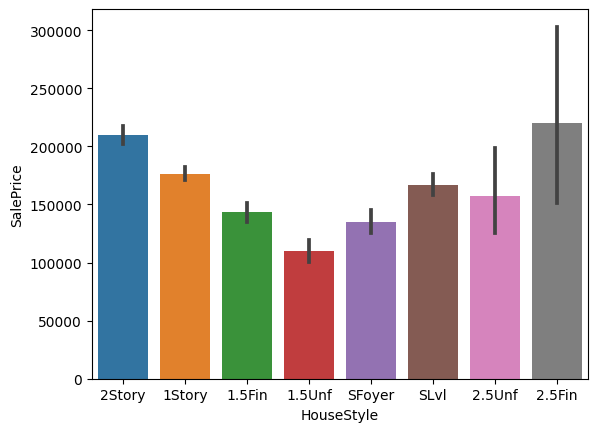

In [48]:
sns.barplot(data=data, x="HouseStyle", y="SalePrice");

От типа дома зависит и его цена, поэтому добавим в фрейм средние цены каждого из типов домов

In [49]:
df["HouseStyle"] = data.HouseStyle.map(
    data.groupby("HouseStyle").SalePrice.mean().to_dict()
)
df.head()

,subclass_price,lot_area,pav_strt,grav_al,pav_al,regShape,lvlContour,hlsContour,bnkContour,Neighborhood,BldgType,HouseStyle
Id,,,,,,,,,,,,
1,239948.501672,8450,1,0,0,1,1,0,0,197965.773333,0.98,210051.764045
2,185224.811567,9600,1,0,0,1,1,0,0,238772.727273,0.98,175985.477961
3,239948.501672,11250,1,0,0,0,1,0,0,197965.773333,0.98,210051.764045
4,166772.416667,9550,1,0,0,0,1,0,0,210624.725490,0.98,210051.764045
5,239948.501672,14260,1,0,0,0,1,0,0,335295.317073,0.98,210051.764045


## OverallQual - общая оценка дома (материал и отделка) от 1 до 10

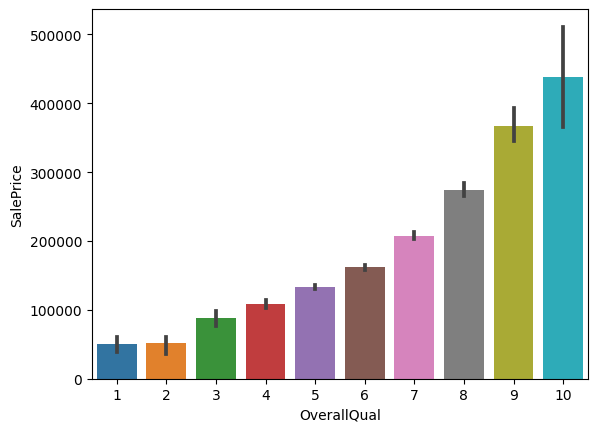

In [50]:
sns.barplot(data=data, x="OverallQual", y="SalePrice");

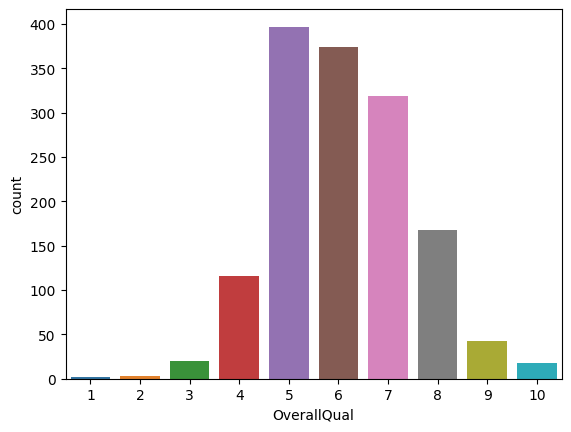

In [51]:
sns.countplot(data=data, x="OverallQual");

Интересная гипотеза: смотря на распределение оценки дома, можно легко заметить, что оно близко к нормальному, отсюда вытекает справедливый вывод: если взять произвольную большую выборку оценок на фильмы/дома/игры/... (продукты) то большая часть продуктов будет иметь среднюю оценку (5-6), в то время как лишь маля часть будет максимальную или минимальную оценку.

А что с будем делать с признаком? Конечно же возбмем его в фрейм, причем даже никак не модифицируя.

In [52]:
df["OverallQual"] = data.OverallQual
df.head()

,subclass_price,lot_area,pav_strt,grav_al,pav_al,regShape,lvlContour,hlsContour,bnkContour,Neighborhood,BldgType,HouseStyle,OverallQual
Id,,,,,,,,,,,,,
1,239948.501672,8450,1,0,0,1,1,0,0,197965.773333,0.98,210051.764045,7
2,185224.811567,9600,1,0,0,1,1,0,0,238772.727273,0.98,175985.477961,6
3,239948.501672,11250,1,0,0,0,1,0,0,197965.773333,0.98,210051.764045,7
4,166772.416667,9550,1,0,0,0,1,0,0,210624.725490,0.98,210051.764045,7
5,239948.501672,14260,1,0,0,0,1,0,0,335295.317073,0.98,210051.764045,8


## OverallCond - оценка общего состояния дома от 1 до 10

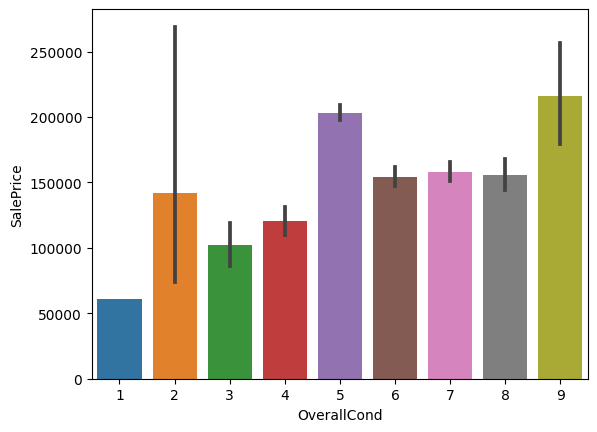

In [53]:
sns.barplot(data=data, x="OverallCond", y="SalePrice");

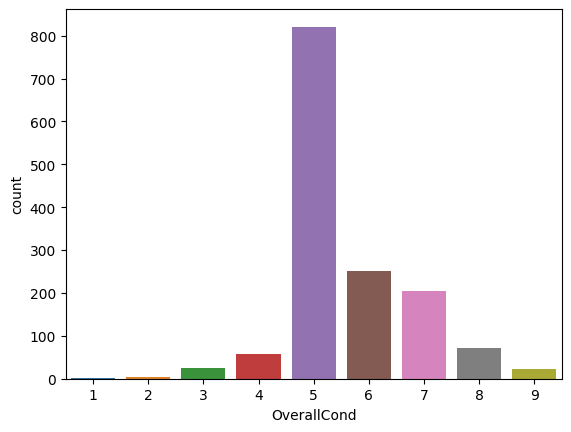

In [54]:
sns.countplot(data=data, x="OverallCond");

Спорный момент: брать его или не брать? Вощьмем, во время обучения уже поймем, полезен он или нет.

In [55]:
df["OverallCond"] = data.OverallCond
df.head()

,subclass_price,lot_area,pav_strt,grav_al,pav_al,regShape,lvlContour,hlsContour,bnkContour,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond
Id,,,,,,,,,,,,,,
1,239948.501672,8450,1,0,0,1,1,0,0,197965.773333,0.98,210051.764045,7,5
2,185224.811567,9600,1,0,0,1,1,0,0,238772.727273,0.98,175985.477961,6,8
3,239948.501672,11250,1,0,0,0,1,0,0,197965.773333,0.98,210051.764045,7,5
4,166772.416667,9550,1,0,0,0,1,0,0,210624.725490,0.98,210051.764045,7,5
5,239948.501672,14260,1,0,0,0,1,0,0,335295.317073,0.98,210051.764045,8,5


## YearBuilt - год постройки

In [56]:
# year_price_df = data[["YearBuilt", "SalePrice"]]
year_price_df = pd.DataFrame(data={"YearBuilt": data.YearBuilt.values, "SalePrice": data.SalePrice.values}, index=data.index)

year_price_df["YearBuilt"] = round(year_price_df["YearBuilt"], -1)
year_price_df.YearBuilt.replace({1870: 1890, 1880: 1890}, inplace=True)

year_price_df.head()

,YearBuilt,SalePrice
Id,,
1,2000,208500
2,1980,181500
3,2000,223500
4,1920,140000
5,2000,250000


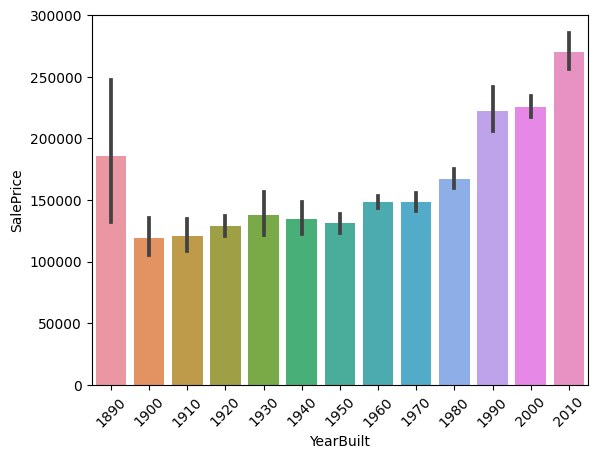

In [57]:
# sns.barplot(x=round(data.YearBuilt, -1), y=data.SalePrice);
sns.barplot(data=year_price_df, x="YearBuilt", y="SalePrice");
plt.xticks(rotation=45);

In [58]:
year_price_df.groupby("YearBuilt").SalePrice.describe()

,count,mean,std,min,25%,50%,75%,max
YearBuilt,,,,,,,,
1890,14.0,185777.071429,112511.590747,94000.0,118625.0,124450.0,241484.25,475000.0
1900,13.0,119340.461538,30135.988720,79000.0,95000.0,106250.0,145900.00,163000.0
1910,32.0,120826.281250,38668.620930,37900.0,102125.0,123750.0,135225.00,240000.0
1920,103.0,129068.495146,44328.862681,34900.0,102000.0,120000.0,154400.00,256000.0
1930,45.0,138091.866667,62377.980268,55000.0,102000.0,120500.0,159434.00,359100.0
1940,73.0,134587.958904,58359.418996,52000.0,100000.0,119900.0,145000.00,381000.0
1950,105.0,130948.847619,38233.033650,35311.0,110000.0,129000.0,144900.00,256000.0
1960,205.0,148133.034146,37745.681987,60000.0,129500.0,142000.0,160000.00,375000.0
1970,160.0,148636.743750,47272.284171,75000.0,119500.0,139500.0,172250.00,345000.0


Видно что в 19-м веке дома стоили явно дороже, чем в 20-м, но начиная с 1990 дома стоят дороже, чем в 18-м веке. Добавим в фрейм столбец с годом постройки, но значение вместо года, возьмем среднюю цену в каждом из десятилетий.

In [59]:
df["yearBuilt"] = year_price_df.YearBuilt.map(
    year_price_df.groupby("YearBuilt").SalePrice.mean().to_dict()
)
df.head()

,subclass_price,lot_area,pav_strt,grav_al,pav_al,regShape,lvlContour,hlsContour,bnkContour,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,yearBuilt
Id,,,,,,,,,,,,,,,
1,239948.501672,8450,1,0,0,1,1,0,0,197965.773333,0.98,210051.764045,7,5,225728.599388
2,185224.811567,9600,1,0,0,1,1,0,0,238772.727273,0.98,175985.477961,6,8,166821.364964
3,239948.501672,11250,1,0,0,0,1,0,0,197965.773333,0.98,210051.764045,7,5,225728.599388
4,166772.416667,9550,1,0,0,0,1,0,0,210624.725490,0.98,210051.764045,7,5,129068.495146
5,239948.501672,14260,1,0,0,0,1,0,0,335295.317073,0.98,210051.764045,8,5,225728.599388


## YearRemodAdd - дата ремонта

In [60]:
# year_price_df = data[["YearBuilt", "SalePrice"]]
yearremod_price_df = pd.DataFrame(data={"YearRemodAdd": data.YearRemodAdd.values, "SalePrice": data.SalePrice.values}, index=data.index)

yearremod_price_df["YearRemodAdd"] = round(yearremod_price_df["YearRemodAdd"], -1)
yearremod_price_df.YearRemodAdd.replace({1870: 1890, 1880: 1890}, inplace=True)

yearremod_price_df.head()

,YearRemodAdd,SalePrice
Id,,
1,2000,208500
2,1980,181500
3,2000,223500
4,1970,140000
5,2000,250000


In [61]:
yearremod_price_df.groupby("YearRemodAdd").SalePrice.describe()

,count,mean,std,min,25%,50%,75%,max
YearRemodAdd,,,,,,,,
1950,211.0,119207.189573,38859.929571,34900.0,94250.00,117500.0,138393.50,256000.0
1960,138.0,138183.137681,33166.572130,60000.0,124125.00,137250.0,154825.00,375000.0
1970,140.0,140076.492857,39207.278066,75000.0,112375.00,135250.0,161625.00,274970.0
1980,139.0,159834.179856,40386.215968,82500.0,133250.00,150900.0,180000.00,287000.0
1990,122.0,200346.180328,65738.745782,93500.0,161850.00,182950.0,235000.00,475000.0
2000,468.0,202916.457265,77981.359913,52000.0,151000.00,188000.0,234000.00,755000.0
2010,242.0,242513.057851,99730.149354,64500.0,173774.75,224250.0,296623.25,611657.0


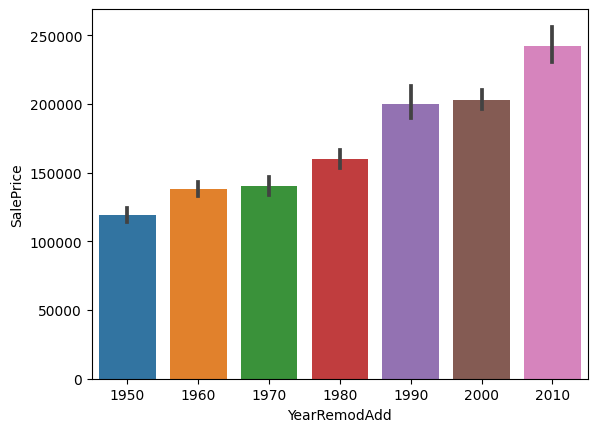

In [62]:
sns.barplot(data=yearremod_price_df, x="YearRemodAdd", y="SalePrice");

Явная зависимость года ремонта и цены дома - берем

In [63]:
df["yearRemod"] = yearremod_price_df.YearRemodAdd.map(
    yearremod_price_df.groupby("YearRemodAdd").SalePrice.mean()
)
df.head()

,subclass_price,lot_area,pav_strt,grav_al,pav_al,regShape,lvlContour,hlsContour,bnkContour,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,yearBuilt,yearRemod
Id,,,,,,,,,,,,,,,,
1,239948.501672,8450,1,0,0,1,1,0,0,197965.773333,0.98,210051.764045,7,5,225728.599388,202916.457265
2,185224.811567,9600,1,0,0,1,1,0,0,238772.727273,0.98,175985.477961,6,8,166821.364964,159834.179856
3,239948.501672,11250,1,0,0,0,1,0,0,197965.773333,0.98,210051.764045,7,5,225728.599388,202916.457265
4,166772.416667,9550,1,0,0,0,1,0,0,210624.725490,0.98,210051.764045,7,5,129068.495146,140076.492857
5,239948.501672,14260,1,0,0,0,1,0,0,335295.317073,0.98,210051.764045,8,5,225728.599388,202916.457265


## RoofStyle - тип крышы
Возможные значения: Flat, Gable, Gambrel, Hip, Mansard, Shed

In [64]:
data.SalePrice.mean()

180921.19589041095

In [65]:
data.groupby("RoofStyle").SalePrice.describe()

,count,mean,std,min,25%,50%,75%,max
RoofStyle,,,,,,,,
Flat,13.0,194690.000000,62522.963515,82000.0,143000.0,185000.0,242000.0,274970.0
Gable,1141.0,171483.956179,66331.237296,34900.0,128000.0,160000.0,202500.0,755000.0
Gambrel,11.0,148909.090909,67013.527807,40000.0,105500.0,139000.0,193750.0,259500.0
Hip,286.0,218876.933566,111549.603563,55000.0,139675.0,176500.0,277875.0,745000.0
Mansard,7.0,180568.428571,58057.624627,100000.0,145500.0,175000.0,216000.0,265979.0
Shed,2.0,225000.000000,49497.474683,190000.0,207500.0,225000.0,242500.0,260000.0


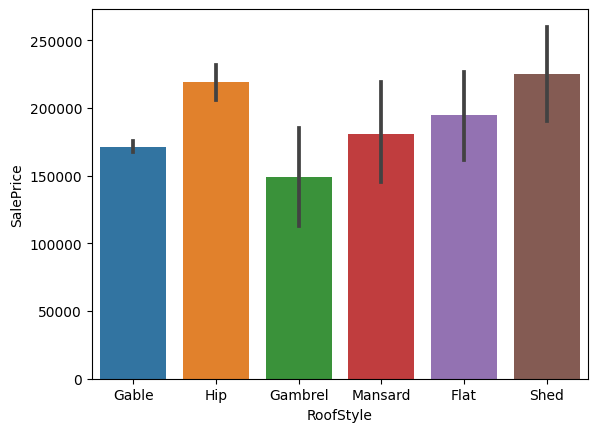

In [66]:
sns.barplot(data=data, x="RoofStyle", y="SalePrice");

Заметен явный избыток значений Gable и Hip, и недостаток истальных, но поскольку есть разница в цене между Gable и Hip, то следует взять этот признак, но разбить его на 3 типа: Gable, Hip, Other.

In [67]:
df["gableRoof"] = (data.RoofStyle == "Gable").astype(np.int64)
df["hipRoof"] = (data.RoofStyle == "Hip").astype(np.int64)
df.head()

,subclass_price,lot_area,pav_strt,grav_al,pav_al,regShape,lvlContour,hlsContour,bnkContour,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,yearBuilt,yearRemod,gableRoof,hipRoof
Id,,,,,,,,,,,,,,,,,,
1,239948.501672,8450,1,0,0,1,1,0,0,197965.773333,0.98,210051.764045,7,5,225728.599388,202916.457265,1,0
2,185224.811567,9600,1,0,0,1,1,0,0,238772.727273,0.98,175985.477961,6,8,166821.364964,159834.179856,1,0
3,239948.501672,11250,1,0,0,0,1,0,0,197965.773333,0.98,210051.764045,7,5,225728.599388,202916.457265,1,0
4,166772.416667,9550,1,0,0,0,1,0,0,210624.725490,0.98,210051.764045,7,5,129068.495146,140076.492857,1,0
5,239948.501672,14260,1,0,0,0,1,0,0,335295.317073,0.98,210051.764045,8,5,225728.599388,202916.457265,1,0


## RoofMatl - материал, из которого изготовлена крыша

In [68]:
data.groupby("RoofMatl").SalePrice.describe()

,count,mean,std,min,25%,50%,75%,max
RoofMatl,,,,,,,,
ClyTile,1.0,160000.000000,NaN,160000.0,160000.0,160000.0,160000.0,160000.0
CompShg,1434.0,179803.679219,77722.388636,34900.0,129900.0,162000.0,213000.0,745000.0
Membran,1.0,241500.000000,NaN,241500.0,241500.0,241500.0,241500.0,241500.0
Metal,1.0,180000.000000,NaN,180000.0,180000.0,180000.0,180000.0,180000.0
Roll,1.0,137000.000000,NaN,137000.0,137000.0,137000.0,137000.0,137000.0
Tar&Grv,11.0,185406.363636,65430.141720,82000.0,136000.0,167000.0,249000.0,274970.0
WdShake,5.0,241400.000000,36218.779659,190000.0,228000.0,242000.0,260000.0,287000.0
WdShngl,6.0,390250.000000,206969.019421,168500.0,278500.0,332500.0,452500.0,755000.0


Не, такое мы брать не будем, абсолютное большинство типов - CompShg

## Exterior1st - наружное покрытие дома

In [69]:
data.groupby("Exterior1st").SalePrice.describe().sort_values("count", ascending=False)

,count,mean,std,min,25%,50%,75%,max
Exterior1st,,,,,,,,
VinylSd,515.0,213732.900971,80646.975785,37900.0,160000.0,200000.0,248614.0,611657.0
HdBoard,222.0,163077.450450,66305.714164,83000.0,129625.0,149900.0,179900.0,755000.0
MetalSd,220.0,149422.177273,54776.408990,62383.0,117750.0,139000.0,164775.0,392000.0
Wd Sdng,206.0,149841.645631,71130.448152,34900.0,112625.0,138943.5,167250.0,745000.0
Plywood,108.0,175942.379630,49497.383293,82500.0,143437.5,167450.0,197500.0,345000.0
CemntBd,61.0,231690.655738,120575.621318,75000.0,119500.0,236500.0,303477.0,556581.0
BrkFace,50.0,194573.000000,82841.914370,40000.0,134525.0,165750.0,245125.0,430000.0
WdShing,26.0,150655.076923,72507.530741,87000.0,109750.0,128700.0,160250.0,385000.0
Stucco,25.0,162990.000000,83307.246529,58500.0,116000.0,144000.0,188700.0,381000.0


In [70]:
exterior1_df = pd.DataFrame(data={"Exterior1st": data.Exterior1st.values, "SalePrice": data.SalePrice.values}, index=data.index)

for name in data.Exterior1st.unique():
    if name not in ["VinylSd", "HdBoard", "MetalSd", "Wd Sdng", "Plywood"]:
        exterior1_df.Exterior1st.replace({name: "Other"}, inplace=True)

exterior1_df.head()

,Exterior1st,SalePrice
Id,,
1,VinylSd,208500
2,MetalSd,181500
3,VinylSd,223500
4,Wd Sdng,140000
5,VinylSd,250000


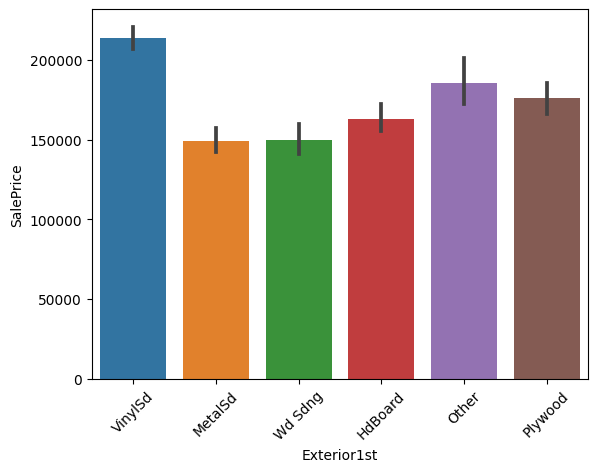

In [71]:
sns.barplot(data=exterior1_df, x="Exterior1st", y="SalePrice");
plt.xticks(rotation=45);

Признак не берем

## Exterior2nd - наружное покрытие дома
По сути это тот же самый признак, что был выше, поэтому не берем.

## MasVnrType - тип облицовки каменной кладки
- **BrkCmn** - кирпич
- **BrkFace** - облицовочный кирпич
- **CBlock** - шлакоблок
- **None** - нет
- **Stone** - камень

In [72]:
data.MasVnrType.fillna("None", inplace=True)

In [73]:
data.groupby("MasVnrType").SalePrice.describe()

,count,mean,std,min,25%,50%,75%,max
MasVnrType,,,,,,,,
BrkCmn,15.0,146318.066667,46187.583632,89471.0,114250.0,139000.0,163950.0,277000.0
BrkFace,445.0,204691.871910,81214.293554,75000.0,149300.0,181000.0,236000.0,755000.0
None,872.0,156958.243119,61491.688969,34900.0,119000.0,143125.0,184025.0,745000.0
Stone,128.0,265583.625000,99940.156577,119000.0,194650.0,246839.0,312779.0,611657.0


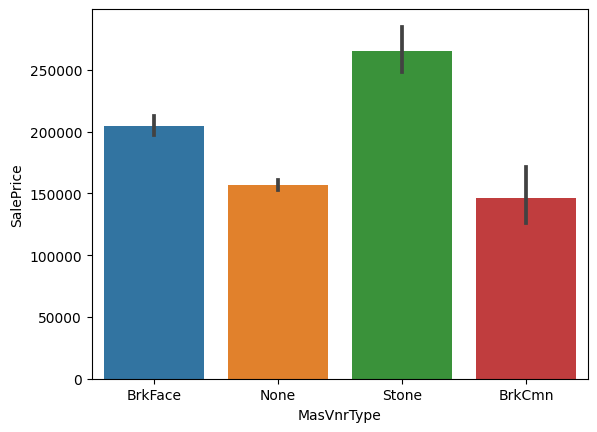

In [74]:
sns.barplot(data=data, x="MasVnrType", y="SalePrice");

Конечно странно, что дома с облицовочным кирпичом стоят дешевле, чем дома сделанные из кирпича, но это не мешает нам взять признак.

In [75]:
df["masBrkFace"] = (data.MasVnrType == "BrkFace").astype(np.int64)
df["masBrkCmn"] = (data.MasVnrType == "BrkCmn").astype(np.int64)
df["masStone"] = (data.MasVnrType == "Stone").astype(np.int64)

df.head()

,subclass_price,lot_area,pav_strt,grav_al,pav_al,regShape,lvlContour,hlsContour,bnkContour,Neighborhood,...,HouseStyle,OverallQual,OverallCond,yearBuilt,yearRemod,gableRoof,hipRoof,masBrkFace,masBrkCmn,masStone
Id,,,,,,,,,,,,,,,,,,,,,
1,239948.501672,8450,1,0,0,1,1,0,0,197965.773333,...,210051.764045,7,5,225728.599388,202916.457265,1,0,1,0,0
2,185224.811567,9600,1,0,0,1,1,0,0,238772.727273,...,175985.477961,6,8,166821.364964,159834.179856,1,0,0,0,0
3,239948.501672,11250,1,0,0,0,1,0,0,197965.773333,...,210051.764045,7,5,225728.599388,202916.457265,1,0,1,0,0
4,166772.416667,9550,1,0,0,0,1,0,0,210624.725490,...,210051.764045,7,5,129068.495146,140076.492857,1,0,0,0,0
5,239948.501672,14260,1,0,0,0,1,0,0,335295.317073,...,210051.764045,8,5,225728.599388,202916.457265,1,0,1,0,0


## MasVnrArea - площадь облицовки

In [76]:
data[data.MasVnrArea.isna()][["MasVnrType", "MasVnrArea"]]

,MasVnrType,MasVnrArea
Id,,
235,None,NaN
530,None,NaN
651,None,NaN
937,None,NaN
974,None,NaN
978,None,NaN
1244,None,NaN
1279,None,NaN


NaN - вероятнее всего означает отсутствие облицовки, значит ее площадь равна 0

In [77]:
data.MasVnrArea.fillna(0, inplace=True)

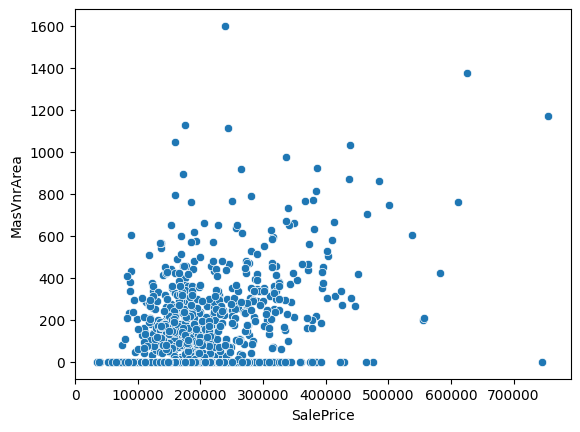

In [78]:
sns.scatterplot(data=data, x="SalePrice", y="MasVnrArea");

Признак стоит взять, потому что корреляция заметна

In [79]:
df["masVnrArea"] = data.MasVnrArea
df.head()

,subclass_price,lot_area,pav_strt,grav_al,pav_al,regShape,lvlContour,hlsContour,bnkContour,Neighborhood,...,OverallQual,OverallCond,yearBuilt,yearRemod,gableRoof,hipRoof,masBrkFace,masBrkCmn,masStone,masVnrArea
Id,,,,,,,,,,,,,,,,,,,,,
1,239948.501672,8450,1,0,0,1,1,0,0,197965.773333,...,7,5,225728.599388,202916.457265,1,0,1,0,0,196.0
2,185224.811567,9600,1,0,0,1,1,0,0,238772.727273,...,6,8,166821.364964,159834.179856,1,0,0,0,0,0.0
3,239948.501672,11250,1,0,0,0,1,0,0,197965.773333,...,7,5,225728.599388,202916.457265,1,0,1,0,0,162.0
4,166772.416667,9550,1,0,0,0,1,0,0,210624.725490,...,7,5,129068.495146,140076.492857,1,0,0,0,0,0.0
5,239948.501672,14260,1,0,0,0,1,0,0,335295.317073,...,8,5,225728.599388,202916.457265,1,0,1,0,0,350.0


## ExterQual - качество материала внешней отделки
- **Ex** - 5
- **Gd** - 4
- **TA** - 3
- **Fa** - 2
- **Po** - 1

In [80]:
data.ExterQual.replace({"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1}, inplace=True)

In [81]:
data.groupby("ExterQual").SalePrice.describe()

,count,mean,std,min,25%,50%,75%,max
ExterQual,,,,,,,,
2,14.0,87985.214286,39826.918794,39300.0,60250.0,82250.0,102000.00,200000.0
3,906.0,144341.313466,42471.815703,34900.0,118589.5,139450.0,165500.00,381000.0
4,488.0,231633.510246,71188.873899,52000.0,185000.0,220000.0,265984.25,745000.0
5,52.0,367360.961538,116401.264200,160000.0,311404.0,364606.5,428788.50,755000.0


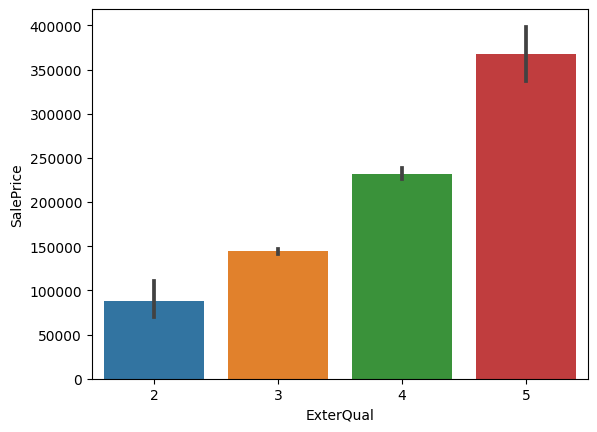

In [82]:
sns.barplot(data=data, x="ExterQual", y="SalePrice");

Взаимосвязь очевидна и не требует пояснений - берем.

In [83]:
df["exterQual"] = data.ExterQual
df.head()

,subclass_price,lot_area,pav_strt,grav_al,pav_al,regShape,lvlContour,hlsContour,bnkContour,Neighborhood,...,OverallCond,yearBuilt,yearRemod,gableRoof,hipRoof,masBrkFace,masBrkCmn,masStone,masVnrArea,exterQual
Id,,,,,,,,,,,,,,,,,,,,,
1,239948.501672,8450,1,0,0,1,1,0,0,197965.773333,...,5,225728.599388,202916.457265,1,0,1,0,0,196.0,4
2,185224.811567,9600,1,0,0,1,1,0,0,238772.727273,...,8,166821.364964,159834.179856,1,0,0,0,0,0.0,3
3,239948.501672,11250,1,0,0,0,1,0,0,197965.773333,...,5,225728.599388,202916.457265,1,0,1,0,0,162.0,4
4,166772.416667,9550,1,0,0,0,1,0,0,210624.725490,...,5,129068.495146,140076.492857,1,0,0,0,0,0.0,3
5,239948.501672,14260,1,0,0,0,1,0,0,335295.317073,...,5,225728.599388,202916.457265,1,0,1,0,0,350.0,4


## ExterCond - оценка текущего качества материала облицовки
- **Ex** - 5
- **Gd** - 4
- **TA** - 3
- **Fa** - 2
- **Po** - 1

In [84]:
data.ExterCond.replace({"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1}, inplace=True)

In [85]:
data.groupby("ExterCond").SalePrice.describe()

,count,mean,std,min,25%,50%,75%,max
ExterCond,,,,,,,,
1,1.0,76500.000000,NaN,76500.0,76500.0,76500.0,76500.00,76500.0
2,28.0,102595.142857,40094.383940,39300.0,65500.0,95750.0,137750.00,169500.0
3,1282.0,184034.896256,79806.257233,34900.0,131100.0,167370.0,217334.25,755000.0
4,146.0,168897.568493,72608.303632,68400.0,128625.0,151250.0,187375.00,625000.0
5,3.0,201333.333333,109235.220205,118000.0,139500.0,161000.0,243000.00,325000.0


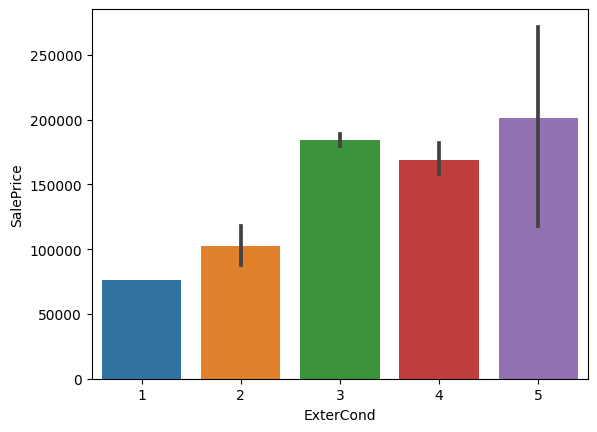

In [86]:
sns.barplot(data=data, x="ExterCond", y="SalePrice");

Тут уже все не так очевидно, но все равно признак возьмем - на этапе обучения определим его важность.

In [87]:
df["exterCond"] = data.ExterCond
df.head()

,subclass_price,lot_area,pav_strt,grav_al,pav_al,regShape,lvlContour,hlsContour,bnkContour,Neighborhood,...,yearBuilt,yearRemod,gableRoof,hipRoof,masBrkFace,masBrkCmn,masStone,masVnrArea,exterQual,exterCond
Id,,,,,,,,,,,,,,,,,,,,,
1,239948.501672,8450,1,0,0,1,1,0,0,197965.773333,...,225728.599388,202916.457265,1,0,1,0,0,196.0,4,3
2,185224.811567,9600,1,0,0,1,1,0,0,238772.727273,...,166821.364964,159834.179856,1,0,0,0,0,0.0,3,3
3,239948.501672,11250,1,0,0,0,1,0,0,197965.773333,...,225728.599388,202916.457265,1,0,1,0,0,162.0,4,3
4,166772.416667,9550,1,0,0,0,1,0,0,210624.725490,...,129068.495146,140076.492857,1,0,0,0,0,0.0,3,3
5,239948.501672,14260,1,0,0,0,1,0,0,335295.317073,...,225728.599388,202916.457265,1,0,1,0,0,350.0,4,3


## Foundation - тип фундамента
- **BrkTil** - кирпичь и плитка
- **CBlock** - шлакоблок
- **PConc** - литой бетон
- **Slab** - плитка
- **Stone** - камень
- **Wood** - древесина

In [88]:
data.groupby("Foundation").SalePrice.describe()

,count,mean,std,min,25%,50%,75%,max
Foundation,,,,,,,,
BrkTil,146.0,132291.075342,54592.393032,37900.0,102400.0,125250.0,151250.00,475000.0
CBlock,634.0,149805.714511,48295.041759,34900.0,122125.0,141500.0,168000.00,402861.0
PConc,647.0,225230.442040,86865.977283,78000.0,173000.0,205000.0,262140.00,755000.0
Slab,24.0,107365.625000,34213.980939,39300.0,89375.0,104150.0,118884.50,198500.0
Stone,6.0,165959.166667,78557.704413,102776.0,109625.0,126500.0,233734.25,266500.0
Wood,3.0,185666.666667,56695.090910,143000.0,153500.0,164000.0,207000.00,250000.0


In [89]:
data.Foundation.replace({"Stone": "Other", "Wood": "Other", "Slab": "Other"}, inplace=True)

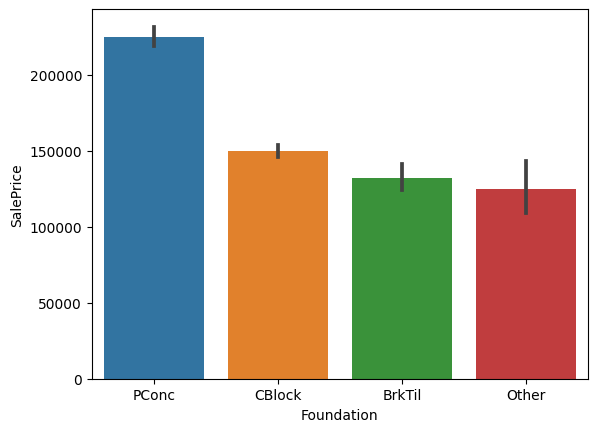

In [90]:
sns.barplot(data=data, x="Foundation", y="SalePrice");

Берем признак

In [91]:
df["foundPConc"] = (data["Foundation"] == "PConc").astype(np.int64)
df["foundCBlock"] = (data["Foundation"] == "CBlock").astype(np.int64)
df["foundBrkTil"] = (data["Foundation"] == "BrkTil").astype(np.int64)

df.head()

,subclass_price,lot_area,pav_strt,grav_al,pav_al,regShape,lvlContour,hlsContour,bnkContour,Neighborhood,...,hipRoof,masBrkFace,masBrkCmn,masStone,masVnrArea,exterQual,exterCond,foundPConc,foundCBlock,foundBrkTil
Id,,,,,,,,,,,,,,,,,,,,,
1,239948.501672,8450,1,0,0,1,1,0,0,197965.773333,...,0,1,0,0,196.0,4,3,1,0,0
2,185224.811567,9600,1,0,0,1,1,0,0,238772.727273,...,0,0,0,0,0.0,3,3,0,1,0
3,239948.501672,11250,1,0,0,0,1,0,0,197965.773333,...,0,1,0,0,162.0,4,3,1,0,0
4,166772.416667,9550,1,0,0,0,1,0,0,210624.725490,...,0,0,0,0,0.0,3,3,0,0,1
5,239948.501672,14260,1,0,0,0,1,0,0,335295.317073,...,0,1,0,0,350.0,4,3,1,0,0


## BsmtQual - высота фундамента
- **Ex** - 5
- **Gd** - 4
- **TA** - 3
- **Fa** - 2
- **Po** - 1
- **NA** - 0

In [92]:
data.BsmtQual.replace({"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1}, inplace=True)

In [93]:
data.BsmtQual.fillna(0, inplace=True)

In [94]:
data.groupby("BsmtQual").SalePrice.describe()

,count,mean,std,min,25%,50%,75%,max
BsmtQual,,,,,,,,
0.0,37.0,105652.891892,29278.694797,39300.0,90000.0,101800.0,118858.0,198500.0
2.0,35.0,115692.028571,34469.667278,61000.0,91400.0,112000.0,133500.0,206900.0
3.0,649.0,140759.818182,43483.265311,34900.0,117000.0,135500.0,158000.0,475000.0
4.0,618.0,202688.478964,58092.364284,75500.0,165100.0,192070.0,234000.0,538000.0
5.0,121.0,327041.041322,113563.237392,123500.0,255500.0,318000.0,378500.0,755000.0


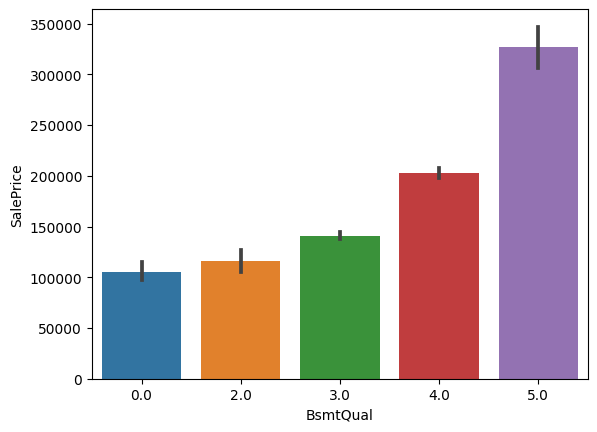

In [95]:
sns.barplot(data=data, x="BsmtQual", y="SalePrice");

Связь есть - берем

In [96]:
df["BsmtQual"] = data.BsmtQual
df.head()

,subclass_price,lot_area,pav_strt,grav_al,pav_al,regShape,lvlContour,hlsContour,bnkContour,Neighborhood,...,masBrkFace,masBrkCmn,masStone,masVnrArea,exterQual,exterCond,foundPConc,foundCBlock,foundBrkTil,BsmtQual
Id,,,,,,,,,,,,,,,,,,,,,
1,239948.501672,8450,1,0,0,1,1,0,0,197965.773333,...,1,0,0,196.0,4,3,1,0,0,4.0
2,185224.811567,9600,1,0,0,1,1,0,0,238772.727273,...,0,0,0,0.0,3,3,0,1,0,4.0
3,239948.501672,11250,1,0,0,0,1,0,0,197965.773333,...,1,0,0,162.0,4,3,1,0,0,4.0
4,166772.416667,9550,1,0,0,0,1,0,0,210624.725490,...,0,0,0,0.0,3,3,0,0,1,3.0
5,239948.501672,14260,1,0,0,0,1,0,0,335295.317073,...,1,0,0,350.0,4,3,1,0,0,4.0


## BsmtCond - оценка общего состояния фундамента
- **Ex** - 5
- **Gd** - 4
- **TA** - 3
- **Fa** - 2
- **Po** - 1
- **NA** - 0

In [97]:
data.BsmtCond.replace({"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1}, inplace=True)
data.BsmtCond.fillna(0, inplace=True)

In [98]:
data.groupby("BsmtCond").SalePrice.describe()

,count,mean,std,min,25%,50%,75%,max
BsmtCond,,,,,,,,
0.0,37.0,105652.891892,29278.694797,39300.0,90000.0,101800.0,118858.0,198500.0
1.0,2.0,64000.000000,4242.640687,61000.0,62500.0,64000.0,65500.0,67000.0
2.0,45.0,121809.533333,43467.796975,55000.0,91500.0,118500.0,137900.0,265979.0
3.0,1311.0,183632.620900,79515.388449,34900.0,132500.0,165000.0,215000.0,755000.0
4.0,65.0,213599.907692,72663.155026,119000.0,155000.0,193879.0,264561.0,465000.0


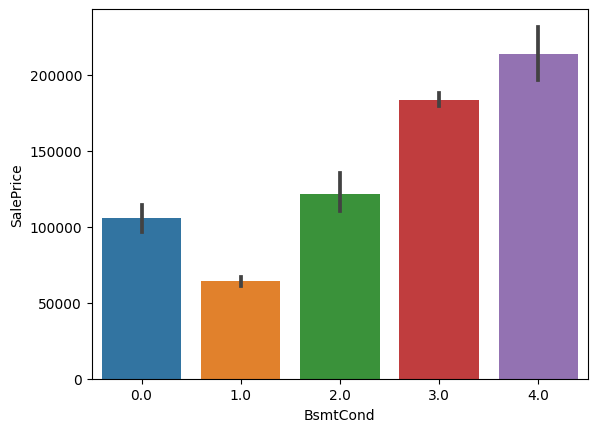

In [99]:
sns.barplot(data=data, x="BsmtCond", y="SalePrice");

Корреляция есть, но заметно исключение в нуле, но это не страшно, поскольку 0 соотвестсвует отсутствию оценки, а также 0 не будет учитываться в работе той же линейной регрессии.

In [100]:
df["BsmtCond"] = data.BsmtCond
df.head()

,subclass_price,lot_area,pav_strt,grav_al,pav_al,regShape,lvlContour,hlsContour,bnkContour,Neighborhood,...,masBrkCmn,masStone,masVnrArea,exterQual,exterCond,foundPConc,foundCBlock,foundBrkTil,BsmtQual,BsmtCond
Id,,,,,,,,,,,,,,,,,,,,,
1,239948.501672,8450,1,0,0,1,1,0,0,197965.773333,...,0,0,196.0,4,3,1,0,0,4.0,3.0
2,185224.811567,9600,1,0,0,1,1,0,0,238772.727273,...,0,0,0.0,3,3,0,1,0,4.0,3.0
3,239948.501672,11250,1,0,0,0,1,0,0,197965.773333,...,0,0,162.0,4,3,1,0,0,4.0,3.0
4,166772.416667,9550,1,0,0,0,1,0,0,210624.725490,...,0,0,0.0,3,3,0,0,1,3.0,4.0
5,239948.501672,14260,1,0,0,0,1,0,0,335295.317073,...,0,0,350.0,4,3,1,0,0,4.0,3.0


## BsmtExposure - оценка стен
- **Gd** - 3
- **Av** - 2
- **Mn** - 1
- **No** - 0
- **NA** - 0

In [101]:
data.BsmtExposure.replace({"Gd": 3, "Av": 2, "Mn": 1, "No": 0}, inplace=True)
data.BsmtExposure.fillna(0, inplace=True)

In [102]:
data.groupby("BsmtExposure").SalePrice.describe()

,count,mean,std,min,25%,50%,75%,max
BsmtExposure,,,,,,,,
0.0,991.0,163439.248234,60861.373994,34900.0,124000.00,151000.0,190000.0,501837.0
1.0,114.0,192789.657895,77335.442652,78000.0,138821.75,182450.0,228092.0,475000.0
2.0,221.0,206643.420814,88655.504849,35311.0,145000.00,185850.0,248900.0,745000.0
3.0,134.0,257689.805970,118923.672583,61000.0,171975.00,226975.0,316325.0,755000.0


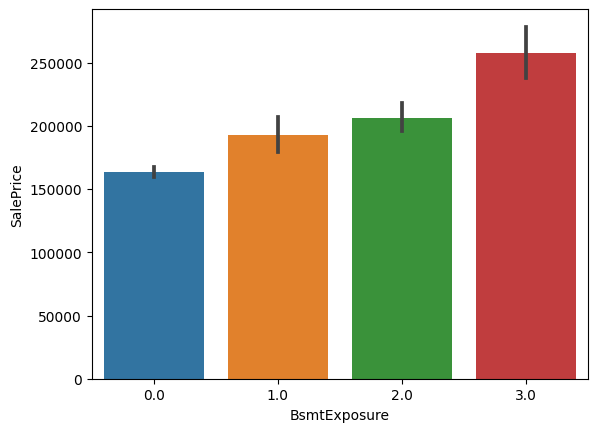

In [103]:
sns.barplot(data=data, x="BsmtExposure", y="SalePrice");

Признак влияет на цену - берем

In [104]:
df["bsmtExpo"] = data.BsmtExposure
df.head()

,subclass_price,lot_area,pav_strt,grav_al,pav_al,regShape,lvlContour,hlsContour,bnkContour,Neighborhood,...,masStone,masVnrArea,exterQual,exterCond,foundPConc,foundCBlock,foundBrkTil,BsmtQual,BsmtCond,bsmtExpo
Id,,,,,,,,,,,,,,,,,,,,,
1,239948.501672,8450,1,0,0,1,1,0,0,197965.773333,...,0,196.0,4,3,1,0,0,4.0,3.0,0.0
2,185224.811567,9600,1,0,0,1,1,0,0,238772.727273,...,0,0.0,3,3,0,1,0,4.0,3.0,3.0
3,239948.501672,11250,1,0,0,0,1,0,0,197965.773333,...,0,162.0,4,3,1,0,0,4.0,3.0,1.0
4,166772.416667,9550,1,0,0,0,1,0,0,210624.725490,...,0,0.0,3,3,0,0,1,3.0,4.0,0.0
5,239948.501672,14260,1,0,0,0,1,0,0,335295.317073,...,0,350.0,4,3,1,0,0,4.0,3.0,2.0


## BsmtFinType1 - оценка поверхности фундамента
- **GLQ** - хорошие жилые помещения
- **ALQ** - норм жилые помещения
- **BLQ** - ниже среднего
- **Rec** - обычная комната
- **LwQ** - низкое качество
- **Unf** - неоценено
- **NA** - отсутствует основание

In [105]:
data.BsmtFinType1.fillna("NA", inplace=True)

In [106]:
data.groupby("BsmtFinType1").SalePrice.describe()

,count,mean,std,min,25%,50%,75%,max
BsmtFinType1,,,,,,,,
ALQ,220.0,161573.068182,50821.277231,81000.0,129000.0,149250.0,179925.00,538000.0
BLQ,148.0,149493.655405,47327.292126,35311.0,122750.0,139100.0,163100.00,359100.0
GLQ,418.0,235413.720096,93215.613258,80000.0,173125.0,213750.0,277375.00,755000.0
LwQ,74.0,151852.702703,50796.987083,75500.0,119000.0,139000.0,179125.00,301000.0
NA,37.0,105652.891892,29278.694797,39300.0,90000.0,101800.0,118858.00,198500.0
Rec,133.0,146889.248120,45190.118879,34900.0,123000.0,142000.0,161500.00,381000.0
Unf,430.0,170670.576744,72577.080129,37900.0,118100.0,161750.0,202623.75,582933.0


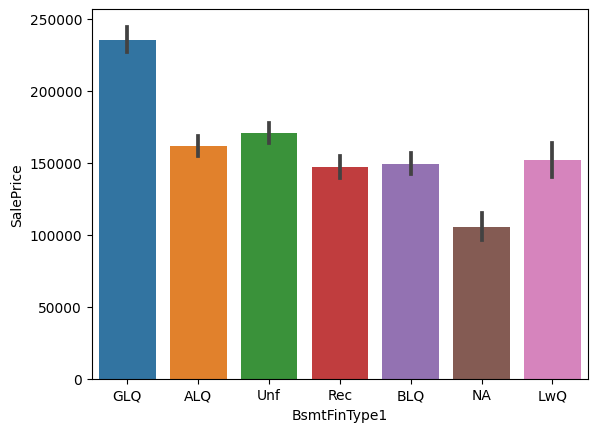

In [107]:
sns.barplot(data=data, x="BsmtFinType1", y="SalePrice");

In [108]:
_sr = data.groupby("BsmtFinType1").SalePrice.median()
_sr

BsmtFinType1
ALQ    149250.0
BLQ    139100.0
GLQ    213750.0
LwQ    139000.0
NA     101800.0
Rec    142000.0
Unf    161750.0
Name: SalePrice, dtype: float64

In [109]:
df["BsmtFinType1"] = round(data.BsmtFinType1.map(_sr.to_dict()), 2)
df.head()

,subclass_price,lot_area,pav_strt,grav_al,pav_al,regShape,lvlContour,hlsContour,bnkContour,Neighborhood,...,masVnrArea,exterQual,exterCond,foundPConc,foundCBlock,foundBrkTil,BsmtQual,BsmtCond,bsmtExpo,BsmtFinType1
Id,,,,,,,,,,,,,,,,,,,,,
1,239948.501672,8450,1,0,0,1,1,0,0,197965.773333,...,196.0,4,3,1,0,0,4.0,3.0,0.0,213750.0
2,185224.811567,9600,1,0,0,1,1,0,0,238772.727273,...,0.0,3,3,0,1,0,4.0,3.0,3.0,149250.0
3,239948.501672,11250,1,0,0,0,1,0,0,197965.773333,...,162.0,4,3,1,0,0,4.0,3.0,1.0,213750.0
4,166772.416667,9550,1,0,0,0,1,0,0,210624.725490,...,0.0,3,3,0,0,1,3.0,4.0,0.0,149250.0
5,239948.501672,14260,1,0,0,0,1,0,0,335295.317073,...,350.0,4,3,1,0,0,4.0,3.0,2.0,213750.0


## BsmtFinSF1 - площадь фундамента, оцененного в 1-м типе

In [110]:
# Уберем выбросы
bsmtfinsf1_data = data.query("BsmtFinSF1 < 2000")

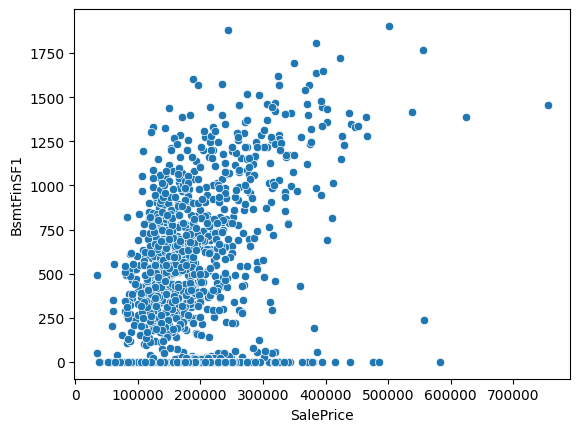

In [111]:
sns.scatterplot(data=bsmtfinsf1_data, x="SalePrice", y="BsmtFinSF1");

Ух ты, закономерность то есть, и похоже это на квадратный корень

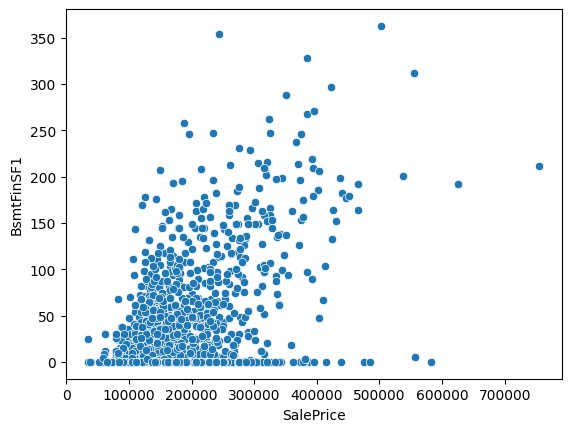

In [112]:
sns.scatterplot(x=bsmtfinsf1_data.SalePrice,
                # y=np.exp(bsmtfinsf1_data.BsmtFinSF1 / 1000));
                y=pow(bsmtfinsf1_data.BsmtFinSF1 / 100, 2));

Делим на 100, возводим в квадрат и добавляем в фрейм

In [113]:
df["BsmtFinSF1"] = pow(data.BsmtFinSF1 / 100, 2)
df.head()

,subclass_price,lot_area,pav_strt,grav_al,pav_al,regShape,lvlContour,hlsContour,bnkContour,Neighborhood,...,exterQual,exterCond,foundPConc,foundCBlock,foundBrkTil,BsmtQual,BsmtCond,bsmtExpo,BsmtFinType1,BsmtFinSF1
Id,,,,,,,,,,,,,,,,,,,,,
1,239948.501672,8450,1,0,0,1,1,0,0,197965.773333,...,4,3,1,0,0,4.0,3.0,0.0,213750.0,49.8436
2,185224.811567,9600,1,0,0,1,1,0,0,238772.727273,...,3,3,0,1,0,4.0,3.0,3.0,149250.0,95.6484
3,239948.501672,11250,1,0,0,0,1,0,0,197965.773333,...,4,3,1,0,0,4.0,3.0,1.0,213750.0,23.6196
4,166772.416667,9550,1,0,0,0,1,0,0,210624.725490,...,3,3,0,0,1,3.0,4.0,0.0,149250.0,4.6656
5,239948.501672,14260,1,0,0,0,1,0,0,335295.317073,...,4,3,1,0,0,4.0,3.0,2.0,213750.0,42.9025


## BsmtFinType2 - оценка площади фундамента (другая)
- **GLQ** - хорошие жилые помещения
- **ALQ** - норм жилые помещения
- **BLQ** - ниже среднего
- **Rec** - обычная комната
- **LwQ** - низкое качество
- **Unf** - неоценено
- **NA** - отсутствует основание

In [114]:
data.BsmtFinType2.fillna("Unf")
data.groupby("BsmtFinType2").SalePrice.describe()

,count,mean,std,min,25%,50%,75%,max
BsmtFinType2,,,,,,,,
ALQ,19.0,209942.105263,104764.743411,123500.0,139000.0,174900.0,262500.0,555000.0
BLQ,33.0,151101.000000,41611.305388,62383.0,129000.0,143000.0,172500.0,271900.0
GLQ,14.0,180982.142857,64573.040359,75500.0,130250.0,203125.0,231500.0,270000.0
LwQ,46.0,164364.130435,43255.035241,88000.0,134500.0,154000.0,179750.0,287000.0
Rec,54.0,164917.129630,59183.277020,85000.0,129000.0,148750.0,180175.0,402000.0
Unf,1256.0,184694.690287,81275.313909,34900.0,132000.0,167000.0,219500.0,755000.0


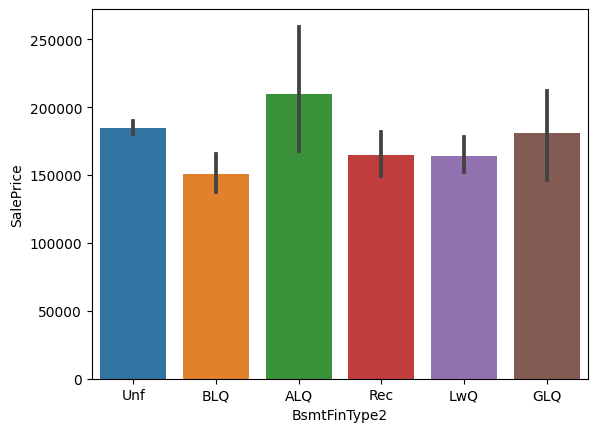

In [115]:
sns.barplot(x=data.BsmtFinType2, y=data.SalePrice);

1256 неопределенных значений, вон из хаты

## BsmtFinSF2 - площадь фундамента 2-го типа

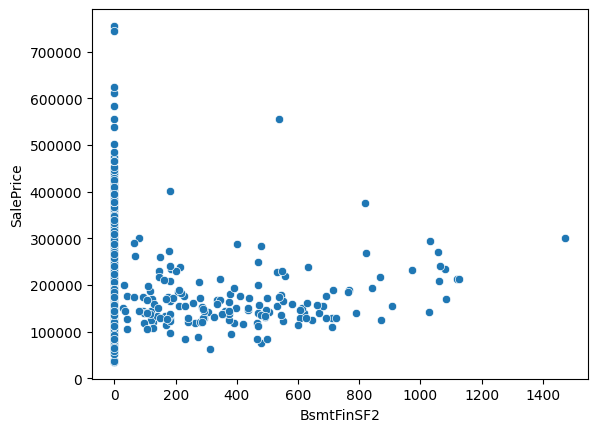

In [116]:
sns.scatterplot(x=data.BsmtFinSF2, y=data.SalePrice);

In [117]:
data.query("BsmtFinSF2 == 0").BsmtFinSF2.count()

1293

1293 0 значения - досвидания

## BsmtUnfSF - недостроенные квадратные метры подвала

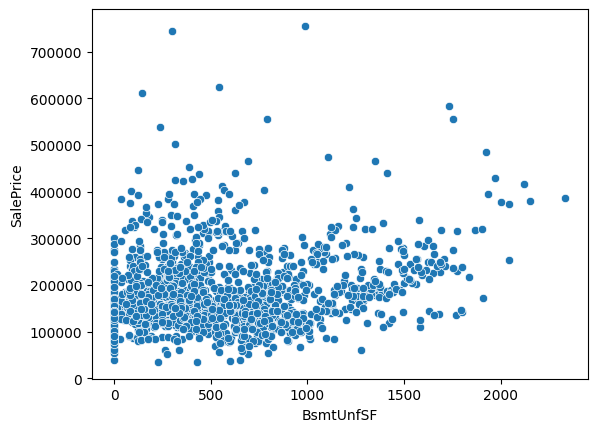

In [118]:
sns.scatterplot(data=data, x="BsmtUnfSF", y="SalePrice");

Корреляции нет, не берем

## TotalBsmtSF - общая площадь подвала

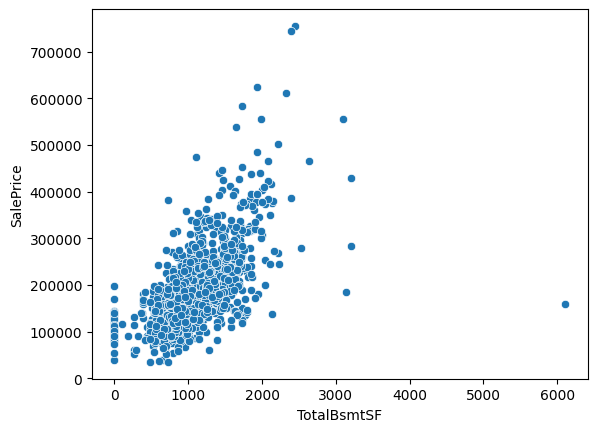

In [119]:
sns.scatterplot(data=data, x="TotalBsmtSF", y="SalePrice");

C:\Users\vlad\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


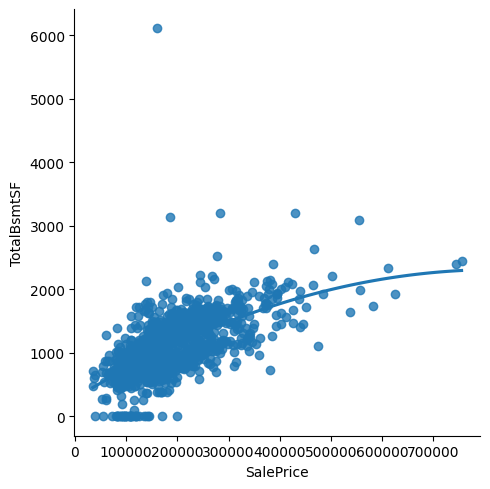

In [120]:
sns.lmplot(data=data, y="TotalBsmtSF", x="SalePrice", order=2, ci=None);

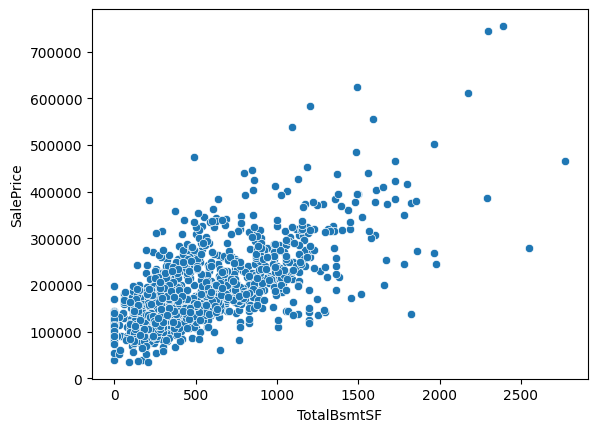

In [121]:
sns.scatterplot(x=pow(data.query("TotalBsmtSF < 3000").TotalBsmtSF / 50, 2),
                y=data.query("TotalBsmtSF < 3000").SalePrice);

Если немного преобразовать данные площади, то признак очень хорошо коррелирует с ценой, поэтому берем

In [122]:
df["TotalBsmtSF"] = pow(data.TotalBsmtSF / 50, 2)
df.head()

,subclass_price,lot_area,pav_strt,grav_al,pav_al,regShape,lvlContour,hlsContour,bnkContour,Neighborhood,...,exterCond,foundPConc,foundCBlock,foundBrkTil,BsmtQual,BsmtCond,bsmtExpo,BsmtFinType1,BsmtFinSF1,TotalBsmtSF
Id,,,,,,,,,,,,,,,,,,,,,
1,239948.501672,8450,1,0,0,1,1,0,0,197965.773333,...,3,1,0,0,4.0,3.0,0.0,213750.0,49.8436,293.0944
2,185224.811567,9600,1,0,0,1,1,0,0,238772.727273,...,3,0,1,0,4.0,3.0,3.0,149250.0,95.6484,637.0576
3,239948.501672,11250,1,0,0,0,1,0,0,197965.773333,...,3,1,0,0,4.0,3.0,1.0,213750.0,23.6196,338.5600
4,166772.416667,9550,1,0,0,0,1,0,0,210624.725490,...,3,0,0,1,3.0,4.0,0.0,149250.0,4.6656,228.6144
5,239948.501672,14260,1,0,0,0,1,0,0,335295.317073,...,3,1,0,0,4.0,3.0,2.0,213750.0,42.9025,524.4100


## Heating - тип отопления
- **Floor** - напольная печь
- **GasA** - газовая печь
- **GasW** - гаовое/паровое отопление
- **Grav** - Гравитационная печь
- **OthW** - тепло горячей воды или пара
- **Wall** - настенная печь

In [123]:
data.groupby("Heating").SalePrice.describe()

,count,mean,std,min,25%,50%,75%,max
Heating,,,,,,,,
Floor,1.0,72500.000000,NaN,72500.0,72500.0,72500.0,72500.0,72500.0
GasA,1428.0,182021.195378,79262.873587,34900.0,130500.0,164500.0,214125.0,755000.0
GasW,18.0,166632.166667,78547.575324,82000.0,116375.0,134950.0,220000.0,375000.0
Grav,7.0,75271.428571,28066.570524,37900.0,56250.0,79000.0,88250.0,121000.0
OthW,2.0,125750.000000,5303.300859,122000.0,123875.0,125750.0,127625.0,129500.0
Wall,4.0,92100.000000,4509.988914,87500.0,89375.0,91450.0,94175.0,98000.0


Много значений в типе GasA и крайне мало в остальных, не берем

## HeatingQC - оценка качества отопления и кондиционирования
- **Ex** - 5
- **Gd** - 4
- **TA** - 3
- **Fa** - 2
- **Po** - 1

In [124]:
data.HeatingQC.replace({"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1}, inplace=True)

In [125]:
data.groupby("HeatingQC").SalePrice.describe()

,count,mean,std,min,25%,50%,75%,max
HeatingQC,,,,,,,,
1,1.0,87000.000000,NaN,87000.0,87000.0,87000.0,87000.0,87000.0
2,49.0,123919.489796,50306.618996,37900.0,87000.0,123500.0,161000.0,235000.0
3,428.0,142362.876168,47226.485663,34900.0,115000.0,135000.0,158925.0,375000.0
4,241.0,156858.871369,52923.920003,52000.0,122500.0,152000.0,179200.0,395000.0
5,741.0,214914.429150,87469.704503,66500.0,154900.0,194700.0,252000.0,755000.0


In [126]:
mx_heatqc = max(data.groupby("HeatingQC").SalePrice.mean())
score_to_num = round(data.groupby("HeatingQC").SalePrice.mean() / mx_heatqc * 50) / 10
score_to_num

HeatingQC
1    2.0
2    2.9
3    3.3
4    3.6
5    5.0
Name: SalePrice, dtype: float64

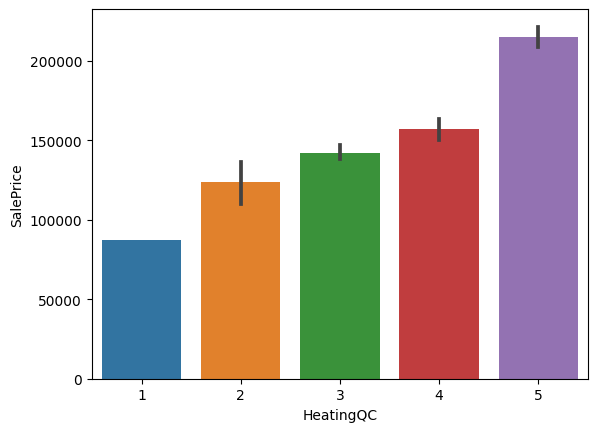

In [127]:
sns.barplot(data=data, x="HeatingQC", y="SalePrice");

Опять же есть зависимость, значит берем

In [128]:
df["heatingQC"] = data.HeatingQC.map(score_to_num.to_dict())
df.head()

,subclass_price,lot_area,pav_strt,grav_al,pav_al,regShape,lvlContour,hlsContour,bnkContour,Neighborhood,...,foundPConc,foundCBlock,foundBrkTil,BsmtQual,BsmtCond,bsmtExpo,BsmtFinType1,BsmtFinSF1,TotalBsmtSF,heatingQC
Id,,,,,,,,,,,,,,,,,,,,,
1,239948.501672,8450,1,0,0,1,1,0,0,197965.773333,...,1,0,0,4.0,3.0,0.0,213750.0,49.8436,293.0944,5.0
2,185224.811567,9600,1,0,0,1,1,0,0,238772.727273,...,0,1,0,4.0,3.0,3.0,149250.0,95.6484,637.0576,5.0
3,239948.501672,11250,1,0,0,0,1,0,0,197965.773333,...,1,0,0,4.0,3.0,1.0,213750.0,23.6196,338.5600,5.0
4,166772.416667,9550,1,0,0,0,1,0,0,210624.725490,...,0,0,1,3.0,4.0,0.0,149250.0,4.6656,228.6144,3.6
5,239948.501672,14260,1,0,0,0,1,0,0,335295.317073,...,1,0,0,4.0,3.0,2.0,213750.0,42.9025,524.4100,5.0


## CentralAir - центральное кондиционирование воздуха
- **N** - нет
- **Y** - есть

In [129]:
data.groupby("CentralAir").SalePrice.describe()

,count,mean,std,min,25%,50%,75%,max
CentralAir,,,,,,,,
N,95.0,105264.073684,40671.273961,34900.0,82000.0,98000.0,128500.0,265979.0
Y,1365.0,186186.709890,78805.206820,52000.0,134800.0,168000.0,219210.0,755000.0


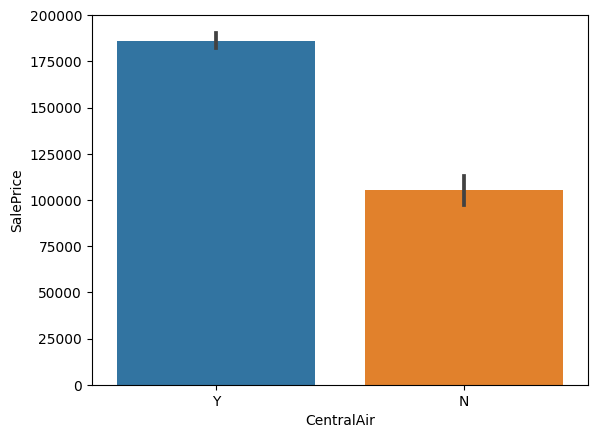

In [130]:
sns.barplot(data=data, x="CentralAir", y="SalePrice");

Явно стоит взять, так как очевидно, что дома с центральным кондиционированием будут стоить дороже (не нужно тратиться на покупку конлиционера)

In [131]:
df["centralAir"] = (data.CentralAir == "Y").astype(np.int64)
df.head()

,subclass_price,lot_area,pav_strt,grav_al,pav_al,regShape,lvlContour,hlsContour,bnkContour,Neighborhood,...,foundCBlock,foundBrkTil,BsmtQual,BsmtCond,bsmtExpo,BsmtFinType1,BsmtFinSF1,TotalBsmtSF,heatingQC,centralAir
Id,,,,,,,,,,,,,,,,,,,,,
1,239948.501672,8450,1,0,0,1,1,0,0,197965.773333,...,0,0,4.0,3.0,0.0,213750.0,49.8436,293.0944,5.0,1
2,185224.811567,9600,1,0,0,1,1,0,0,238772.727273,...,1,0,4.0,3.0,3.0,149250.0,95.6484,637.0576,5.0,1
3,239948.501672,11250,1,0,0,0,1,0,0,197965.773333,...,0,0,4.0,3.0,1.0,213750.0,23.6196,338.5600,5.0,1
4,166772.416667,9550,1,0,0,0,1,0,0,210624.725490,...,0,1,3.0,4.0,0.0,149250.0,4.6656,228.6144,3.6,1
5,239948.501672,14260,1,0,0,0,1,0,0,335295.317073,...,0,0,4.0,3.0,2.0,213750.0,42.9025,524.4100,5.0,1


## Electrical - электричество
- **SBrkr** - Стандартные автоматические выключатели & Romex
- **FuseA** - Блок предохранителей на 60 ампер и вся проводка Romex (средняя)
- **FuseF** - Блок предохранителей на 60 ампер и в основном проводка Romex (исправная)
- **FuseP** - Блок предохранителей на 60 ампер и в основном проводка ручки и трубки (плохая)
- **Mix** - Смешанный

In [132]:
data.groupby("Electrical").SalePrice.describe()

,count,mean,std,min,25%,50%,75%,max
Electrical,,,,,,,,
FuseA,94.0,122196.893617,37511.376615,34900.0,98500.0,121250.0,143531.25,239000.0
FuseF,27.0,107675.444444,30636.507376,39300.0,88500.0,115000.0,129950.00,169500.0
FuseP,3.0,97333.333333,34645.827070,73000.0,77500.0,82000.0,109500.00,137000.0
Mix,1.0,67000.000000,NaN,67000.0,67000.0,67000.0,67000.00,67000.0
SBrkr,1334.0,186825.113193,79856.458326,37900.0,134575.0,170000.0,220750.00,755000.0


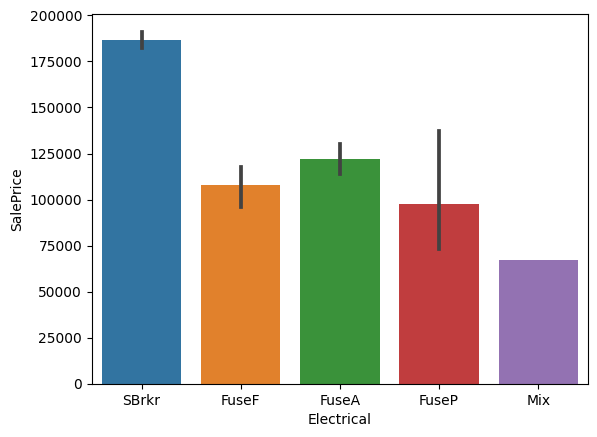

In [133]:
sns.barplot(data=data, x="Electrical", y="SalePrice");

Очевидно, что стандартные выключатели (SBrkr) будут стоить дороже, чем все остальное, поэтому побавит этот признак как 1 - SBrkr, 0 - остальное

In [134]:
df["electr"] = (data.Electrical == "SBrkr").astype(np.int64)
df.head()

,subclass_price,lot_area,pav_strt,grav_al,pav_al,regShape,lvlContour,hlsContour,bnkContour,Neighborhood,...,foundBrkTil,BsmtQual,BsmtCond,bsmtExpo,BsmtFinType1,BsmtFinSF1,TotalBsmtSF,heatingQC,centralAir,electr
Id,,,,,,,,,,,,,,,,,,,,,
1,239948.501672,8450,1,0,0,1,1,0,0,197965.773333,...,0,4.0,3.0,0.0,213750.0,49.8436,293.0944,5.0,1,1
2,185224.811567,9600,1,0,0,1,1,0,0,238772.727273,...,0,4.0,3.0,3.0,149250.0,95.6484,637.0576,5.0,1,1
3,239948.501672,11250,1,0,0,0,1,0,0,197965.773333,...,0,4.0,3.0,1.0,213750.0,23.6196,338.5600,5.0,1,1
4,166772.416667,9550,1,0,0,0,1,0,0,210624.725490,...,1,3.0,4.0,0.0,149250.0,4.6656,228.6144,3.6,1,1
5,239948.501672,14260,1,0,0,0,1,0,0,335295.317073,...,0,4.0,3.0,2.0,213750.0,42.9025,524.4100,5.0,1,1


## 1stFlrSF - площадь первого этажа

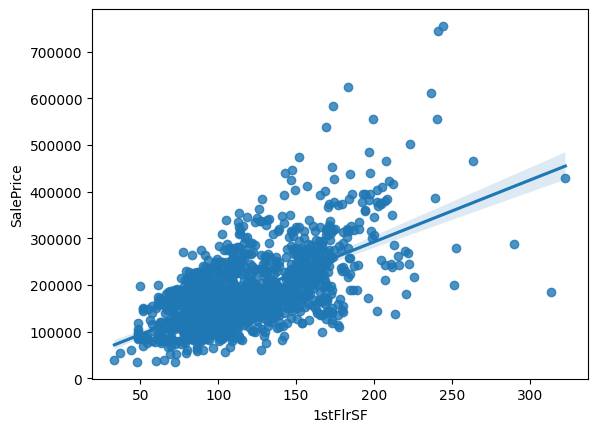

In [135]:
sns.regplot(x=pow(data[data["1stFlrSF"] < 4000]["1stFlrSF"] / 10, 1),
            y=data[data["1stFlrSF"] < 4000].SalePrice);

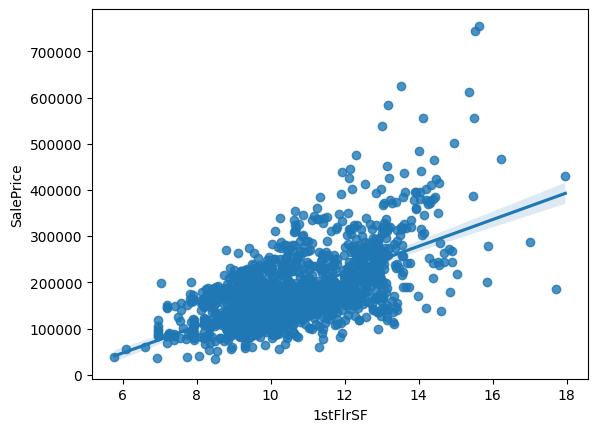

In [136]:
sns.regplot(x=pow(data[data["1stFlrSF"] < 4000]["1stFlrSF"] / 10, 1/2),
            y=data[data["1stFlrSF"] < 4000].SalePrice);

Добавляем

In [137]:
df["1stFlrSF"] = pow(data["1stFlrSF"] / 10, 1/2)
df.head()

,subclass_price,lot_area,pav_strt,grav_al,pav_al,regShape,lvlContour,hlsContour,bnkContour,Neighborhood,...,BsmtQual,BsmtCond,bsmtExpo,BsmtFinType1,BsmtFinSF1,TotalBsmtSF,heatingQC,centralAir,electr,1stFlrSF
Id,,,,,,,,,,,,,,,,,,,,,
1,239948.501672,8450,1,0,0,1,1,0,0,197965.773333,...,4.0,3.0,0.0,213750.0,49.8436,293.0944,5.0,1,1,9.252027
2,185224.811567,9600,1,0,0,1,1,0,0,238772.727273,...,4.0,3.0,3.0,149250.0,95.6484,637.0576,5.0,1,1,11.233877
3,239948.501672,11250,1,0,0,0,1,0,0,197965.773333,...,4.0,3.0,1.0,213750.0,23.6196,338.5600,5.0,1,1,9.591663
4,166772.416667,9550,1,0,0,0,1,0,0,210624.725490,...,3.0,4.0,0.0,149250.0,4.6656,228.6144,3.6,1,1,9.803061
5,239948.501672,14260,1,0,0,0,1,0,0,335295.317073,...,4.0,3.0,2.0,213750.0,42.9025,524.4100,5.0,1,1,10.700467


## 2ndFlrSF - площадь второго этажа

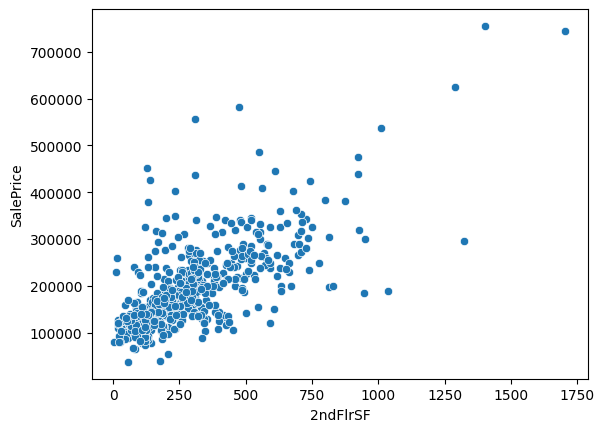

In [138]:
second_floor_df = data[data["2ndFlrSF"] > 1]
sns.scatterplot(x=pow(second_floor_df["2ndFlrSF"] / 50, 2),
                y=second_floor_df.SalePrice);

Возводим в квадрат и берем признак в фрейм

In [139]:
df["2ndFltSF"] = pow(data["2ndFlrSF"] / 50, 1/2)
df.head()

,subclass_price,lot_area,pav_strt,grav_al,pav_al,regShape,lvlContour,hlsContour,bnkContour,Neighborhood,...,BsmtCond,bsmtExpo,BsmtFinType1,BsmtFinSF1,TotalBsmtSF,heatingQC,centralAir,electr,1stFlrSF,2ndFltSF
Id,,,,,,,,,,,,,,,,,,,,,
1,239948.501672,8450,1,0,0,1,1,0,0,197965.773333,...,3.0,0.0,213750.0,49.8436,293.0944,5.0,1,1,9.252027,4.132796
2,185224.811567,9600,1,0,0,1,1,0,0,238772.727273,...,3.0,3.0,149250.0,95.6484,637.0576,5.0,1,1,11.233877,0.000000
3,239948.501672,11250,1,0,0,0,1,0,0,197965.773333,...,3.0,1.0,213750.0,23.6196,338.5600,5.0,1,1,9.591663,4.161730
4,166772.416667,9550,1,0,0,0,1,0,0,210624.725490,...,4.0,0.0,149250.0,4.6656,228.6144,3.6,1,1,9.803061,3.888444
5,239948.501672,14260,1,0,0,0,1,0,0,335295.317073,...,3.0,2.0,213750.0,42.9025,524.4100,5.0,1,1,10.700467,4.589118


## LowQualFinSF - площадь с отделкой низкого качества

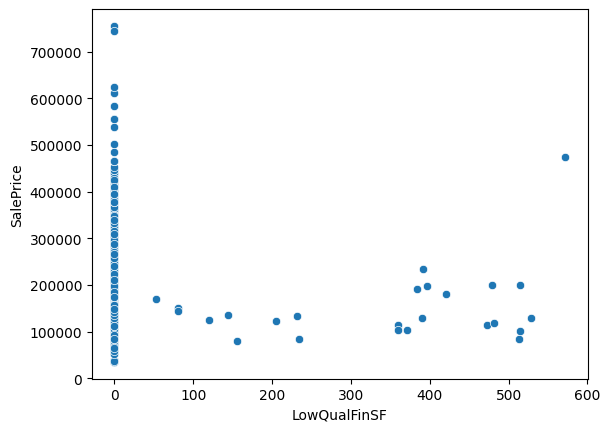

In [140]:
sns.scatterplot(x=data.LowQualFinSF, y=data.SalePrice);

Тут больше важен сам факт налиция такой площади, потому что он будет сбивать цену вниз.

In [141]:
df["lowQualFin"] = (data.LowQualFinSF == 0).astype(np.int64)
df.head()

,subclass_price,lot_area,pav_strt,grav_al,pav_al,regShape,lvlContour,hlsContour,bnkContour,Neighborhood,...,bsmtExpo,BsmtFinType1,BsmtFinSF1,TotalBsmtSF,heatingQC,centralAir,electr,1stFlrSF,2ndFltSF,lowQualFin
Id,,,,,,,,,,,,,,,,,,,,,
1,239948.501672,8450,1,0,0,1,1,0,0,197965.773333,...,0.0,213750.0,49.8436,293.0944,5.0,1,1,9.252027,4.132796,1
2,185224.811567,9600,1,0,0,1,1,0,0,238772.727273,...,3.0,149250.0,95.6484,637.0576,5.0,1,1,11.233877,0.000000,1
3,239948.501672,11250,1,0,0,0,1,0,0,197965.773333,...,1.0,213750.0,23.6196,338.5600,5.0,1,1,9.591663,4.161730,1
4,166772.416667,9550,1,0,0,0,1,0,0,210624.725490,...,0.0,149250.0,4.6656,228.6144,3.6,1,1,9.803061,3.888444,1
5,239948.501672,14260,1,0,0,0,1,0,0,335295.317073,...,2.0,213750.0,42.9025,524.4100,5.0,1,1,10.700467,4.589118,1


## GrLivArea - Жилая площадь надземной части

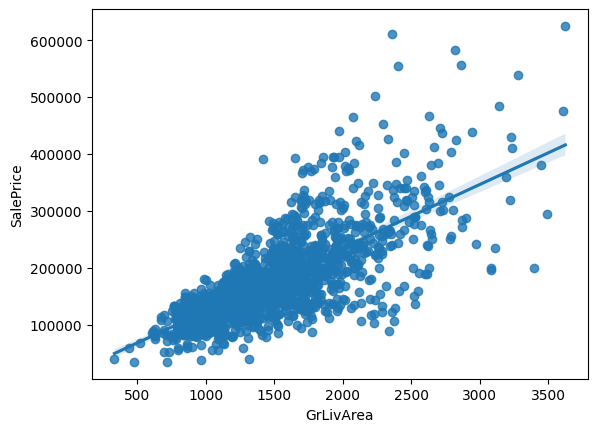

In [142]:
sns.regplot(x=pow(data.query("GrLivArea < 4000").GrLivArea, 1),
            y=data.query("GrLivArea < 4000").SalePrice);

Безоговорочно берем

In [143]:
df["GrLivArea"] = data.GrLivArea

## BsmtFullBath - цокольный этаж с душем

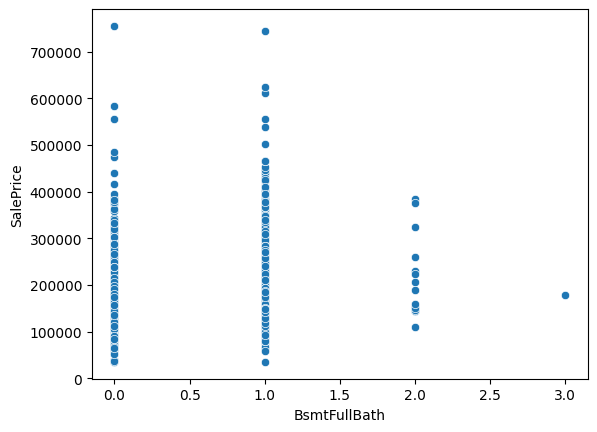

In [144]:
sns.scatterplot(x=data.BsmtFullBath, y=data.SalePrice);

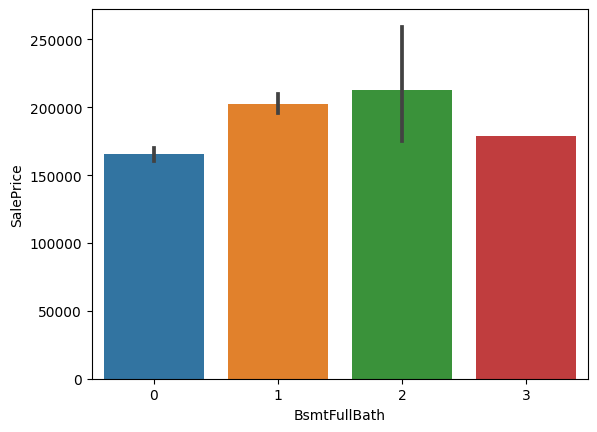

In [145]:
sns.barplot(x=data.BsmtFullBath, y=data.SalePrice);

не берем

## BsmtHalfBath - количество ванных комнат на цокольном этаже

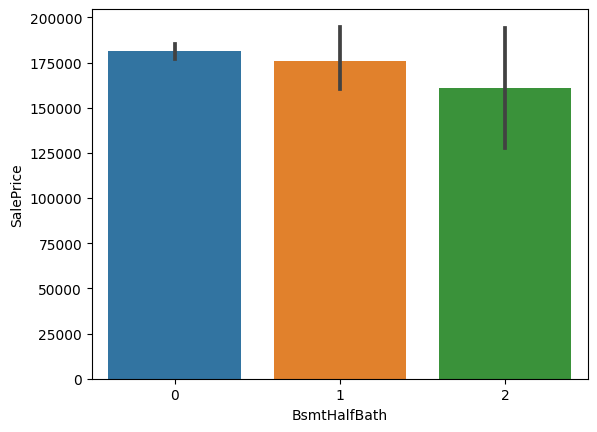

In [146]:
sns.barplot(x=data.BsmtHalfBath, y=data.SalePrice);

Не берем

## FullBath - количество полностью оборудованных ванных комнат высшего класса

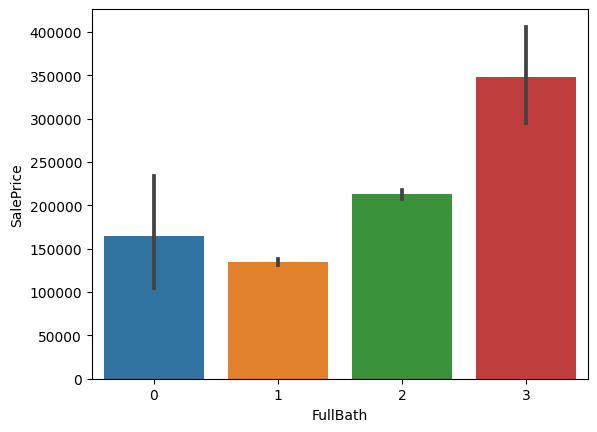

In [147]:
sns.barplot(x=data.FullBath, y=data.SalePrice);

Тут явно есть зависимость - берем

In [148]:
df["fullBath"] = data.FullBath

## HalfBath - Половина ванн высшего сорта

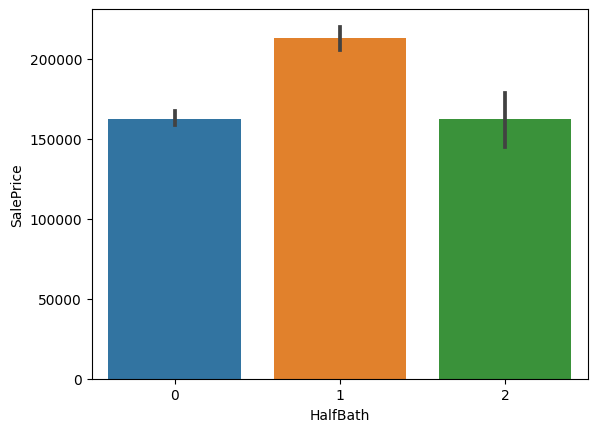

In [149]:
sns.barplot(x=data.HalfBath, y=data.SalePrice);

Не берем

## BedroomAbvGr - колчество спален, не считая цокольного этажа

In [150]:
data.groupby("BedroomAbvGr").SalePrice.describe()

,count,mean,std,min,25%,50%,75%,max
BedroomAbvGr,,,,,,,,
0,6.0,221493.166667,106675.888935,108959.0,144250.0,202500.0,279500.0,385000.0
1,50.0,173162.420000,102975.067584,35311.0,87500.0,145250.0,208975.0,501837.0
2,358.0,158197.659218,78197.106241,34900.0,109900.0,137250.0,185000.0,611657.0
3,804.0,181056.870647,63793.924903,40000.0,136875.0,169945.0,214000.0,451950.0
4,213.0,220421.253521,109510.516383,64500.0,140000.0,193500.0,266500.0,755000.0
5,21.0,180819.047619,68472.480743,81000.0,135000.0,161500.0,240000.0,320000.0
6,7.0,143779.000000,26455.384839,119000.0,130450.0,141000.0,142776.5,200000.0
8,1.0,200000.000000,NaN,200000.0,200000.0,200000.0,200000.0,200000.0


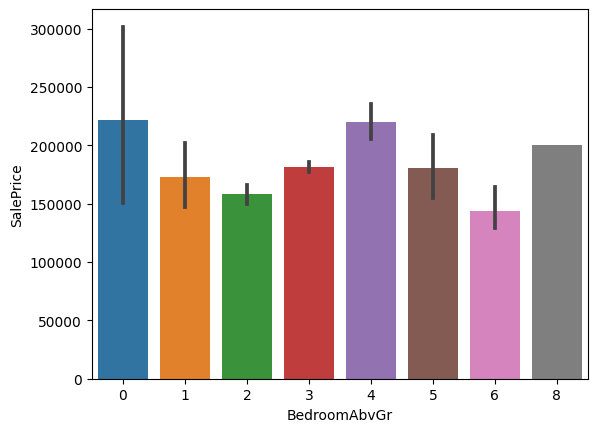

In [151]:
sns.barplot(x=data.BedroomAbvGr, y=data.SalePrice);

...

## KitchenAbvGr - количество кухонь

In [152]:
data.groupby("KitchenAbvGr").SalePrice.describe()

,count,mean,std,min,25%,50%,75%,max
KitchenAbvGr,,,,,,,,
0,1.0,127500.000000,NaN,127500.0,127500.0,127500.0,127500.00,127500.0
1,1392.0,183388.790230,80265.344315,34900.0,131300.0,165550.0,216877.75,755000.0
2,65.0,131096.153846,31483.474549,55000.0,108959.0,133900.0,145000.00,206300.0
3,2.0,109500.000000,4949.747468,106000.0,107750.0,109500.0,111250.00,113000.0


...

## KitchenQual - оценка кухни
- **Ex** - 5
- **Gd** - 4
- **TA** - 3
- **Fa** - 2
- **Po** - 1

In [153]:
data.KitchenQual.replace({"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1}, inplace=True)

In [154]:
data.groupby("KitchenQual").SalePrice.describe()

,count,mean,std,min,25%,50%,75%,max
KitchenQual,,,,,,,,
2,39.0,105565.205128,36004.254037,39300.0,81000.0,115000.0,131500.0,200000.0
3,735.0,139962.511565,38896.280336,34900.0,116025.0,137000.0,160000.0,375000.0
4,586.0,212116.023891,64020.176702,79000.0,172500.0,201400.0,242750.0,625000.0
5,100.0,328554.670000,120862.942573,86000.0,263474.0,316750.0,385312.5,755000.0


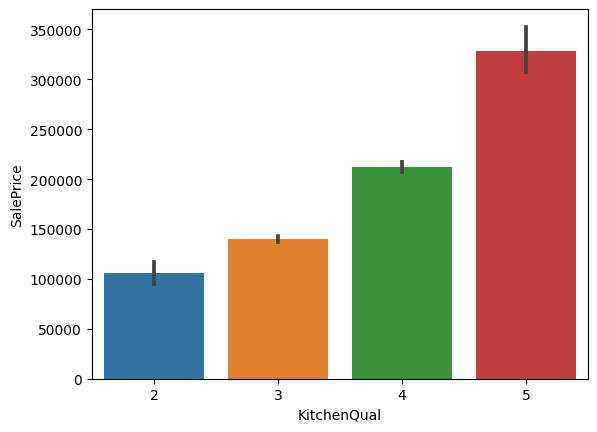

In [155]:
sns.barplot(x=data.KitchenQual, y=data.SalePrice);

Тут все очевидно, берем

In [156]:
kit_qual_mean_df = data.groupby("KitchenQual").SalePrice.mean()
df["kitQual"] = data.KitchenQual.map(
    (round(kit_qual_mean_df / kit_qual_mean_df.max() * 5, 2).to_dict())
)
df.head()

,subclass_price,lot_area,pav_strt,grav_al,pav_al,regShape,lvlContour,hlsContour,bnkContour,Neighborhood,...,TotalBsmtSF,heatingQC,centralAir,electr,1stFlrSF,2ndFltSF,lowQualFin,GrLivArea,fullBath,kitQual
Id,,,,,,,,,,,,,,,,,,,,,
1,239948.501672,8450,1,0,0,1,1,0,0,197965.773333,...,293.0944,5.0,1,1,9.252027,4.132796,1,1710,2,3.23
2,185224.811567,9600,1,0,0,1,1,0,0,238772.727273,...,637.0576,5.0,1,1,11.233877,0.000000,1,1262,2,2.13
3,239948.501672,11250,1,0,0,0,1,0,0,197965.773333,...,338.5600,5.0,1,1,9.591663,4.161730,1,1786,2,3.23
4,166772.416667,9550,1,0,0,0,1,0,0,210624.725490,...,228.6144,3.6,1,1,9.803061,3.888444,1,1717,1,3.23
5,239948.501672,14260,1,0,0,0,1,0,0,335295.317073,...,524.4100,5.0,1,1,10.700467,4.589118,1,2198,2,3.23


## TotRmsAbvGrd - количество камнат высшего класса

In [157]:
data.groupby("TotRmsAbvGrd").SalePrice.describe()

,count,mean,std,min,25%,50%,75%,max
TotRmsAbvGrd,,,,,,,,
2,1.0,39300.000000,NaN,39300.0,39300.0,39300.0,39300.0,39300.0
3,17.0,111217.647059,33108.103904,60000.0,81000.0,100000.0,143000.0,155900.0
4,97.0,122844.628866,41661.805370,34900.0,93000.0,120500.0,140000.0,260000.0
5,275.0,141550.749091,49656.905700,52000.0,112500.0,130250.0,156000.0,392500.0
6,402.0,161303.296020,48707.372941,37900.0,131625.0,155000.0,185000.0,374000.0
7,329.0,196666.784195,64404.686026,55000.0,155000.0,184100.0,230000.0,465000.0
8,187.0,213427.529412,73985.715639,81000.0,160500.0,200000.0,254096.5,466500.0
9,75.0,252988.173333,83131.922273,98000.0,200362.0,252000.0,298000.0,501837.0
10,47.0,296279.170213,155027.992122,90000.0,160000.0,285000.0,360509.5,755000.0


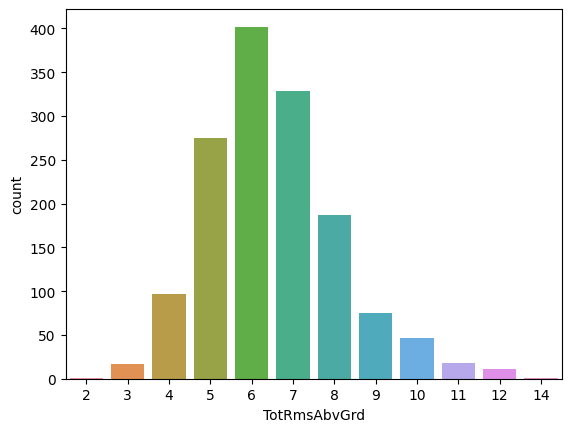

In [158]:
sns.countplot(x=data.TotRmsAbvGrd);

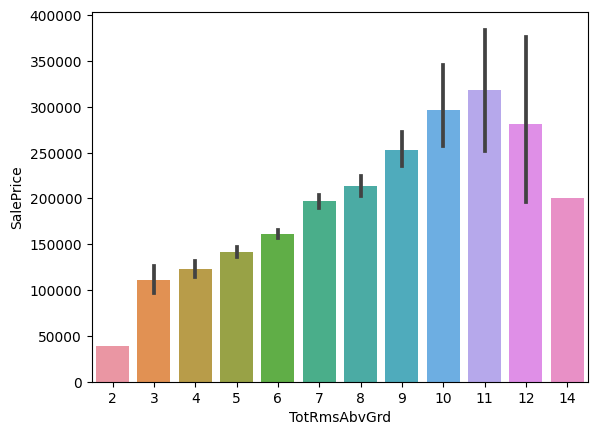

In [159]:
sns.barplot(x=data.TotRmsAbvGrd, y=data.SalePrice);

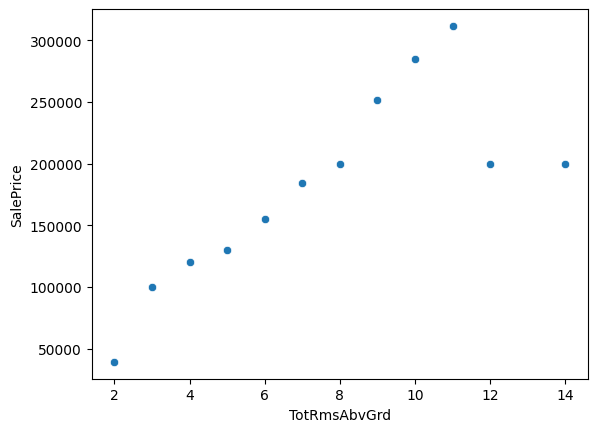

In [160]:
# data.groupby("TotRmsAbvGrd").SalePrice.mean()
sns.scatterplot(data.groupby("TotRmsAbvGrd").SalePrice.median());

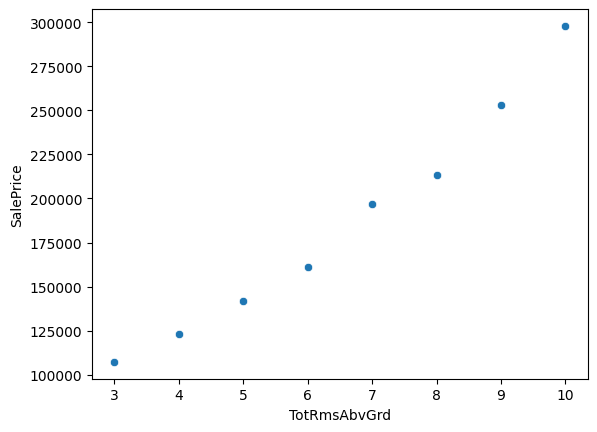

In [161]:
sns.scatterplot(data.replace(
    {2: 3, 14: 10, 13: 10, 12: 10, 11: 10}
).groupby("TotRmsAbvGrd").SalePrice.mean());

Если крайние значения заменить на соседние, то в целом получается прямая (хотя и немного кривая)

In [162]:
df["totRmsAbvGrd"] = data.TotRmsAbvGrd.map(
    {2: 1, 3: 1, 4: 2, 5: 3, 6: 4, 7: 5, 8: 6,
     9: 7, 10: 8, 11: 8, 12: 8, 13: 8, 14: 8}
)
df.head()

,subclass_price,lot_area,pav_strt,grav_al,pav_al,regShape,lvlContour,hlsContour,bnkContour,Neighborhood,...,heatingQC,centralAir,electr,1stFlrSF,2ndFltSF,lowQualFin,GrLivArea,fullBath,kitQual,totRmsAbvGrd
Id,,,,,,,,,,,,,,,,,,,,,
1,239948.501672,8450,1,0,0,1,1,0,0,197965.773333,...,5.0,1,1,9.252027,4.132796,1,1710,2,3.23,6
2,185224.811567,9600,1,0,0,1,1,0,0,238772.727273,...,5.0,1,1,11.233877,0.000000,1,1262,2,2.13,4
3,239948.501672,11250,1,0,0,0,1,0,0,197965.773333,...,5.0,1,1,9.591663,4.161730,1,1786,2,3.23,4
4,166772.416667,9550,1,0,0,0,1,0,0,210624.725490,...,3.6,1,1,9.803061,3.888444,1,1717,1,3.23,5
5,239948.501672,14260,1,0,0,0,1,0,0,335295.317073,...,5.0,1,1,10.700467,4.589118,1,2198,2,3.23,7


## Functional - функциональность дома
- **Typ** - стандартная функциональность
- **Min1** - незначительные недочеты 1
- **Min2** - незначительные недочеты 2
- **Mod** - умеренные отчисления
- **Maj1** - сильные недочеты 1
- **Maj2** - сильные недочеты 2
- **Sev** - серьезно поврежден
- **Sal** - только утилизация

In [163]:
data.Functional.replace(
    {"Maj1": 0, "Maj2": 0, "Min1": 0, "Min2": 0, "Mod": 0, "Sev": 0, "Typ": 1},
    inplace=True,
)

In [164]:
_df = data.groupby("Functional").SalePrice.describe()
_df

,count,mean,std,min,25%,50%,75%,max
Functional,,,,,,,,
0,100.0,146813.060000,62078.078960,52000.0,116500.0,138500.0,165862.5,538000.0
1,1360.0,183429.147059,80017.959658,34900.0,131300.0,165500.0,217125.0,755000.0


In [165]:
_df["mean"].min() / _df["mean"].max()

0.8003802141265958

Признак странный, но возьмем

In [166]:
df["func"] = data.Functional.map({0: 0.8, 1: 1})
df.head()

,subclass_price,lot_area,pav_strt,grav_al,pav_al,regShape,lvlContour,hlsContour,bnkContour,Neighborhood,...,centralAir,electr,1stFlrSF,2ndFltSF,lowQualFin,GrLivArea,fullBath,kitQual,totRmsAbvGrd,func
Id,,,,,,,,,,,,,,,,,,,,,
1,239948.501672,8450,1,0,0,1,1,0,0,197965.773333,...,1,1,9.252027,4.132796,1,1710,2,3.23,6,1.0
2,185224.811567,9600,1,0,0,1,1,0,0,238772.727273,...,1,1,11.233877,0.000000,1,1262,2,2.13,4,1.0
3,239948.501672,11250,1,0,0,0,1,0,0,197965.773333,...,1,1,9.591663,4.161730,1,1786,2,3.23,4,1.0
4,166772.416667,9550,1,0,0,0,1,0,0,210624.725490,...,1,1,9.803061,3.888444,1,1717,1,3.23,5,1.0
5,239948.501672,14260,1,0,0,0,1,0,0,335295.317073,...,1,1,10.700467,4.589118,1,2198,2,3.23,7,1.0


## Fireplaces - количество каминов

In [167]:
data.groupby("Fireplaces").SalePrice.describe()

,count,mean,std,min,25%,50%,75%,max
Fireplaces,,,,,,,,
0,690.0,141331.482609,44389.786884,34900.0,112000.0,135000.0,164375.0,342643.0
1,650.0,211843.909231,79531.825318,60000.0,158000.0,189975.0,254675.0,625000.0
2,115.0,240588.539130,117451.800525,100000.0,160750.0,206900.0,284500.0,755000.0
3,5.0,252000.000000,93313.986090,160000.0,190000.0,205000.0,345000.0,360000.0


In [168]:
data.Fireplaces.replace({3: 2}, inplace=True)

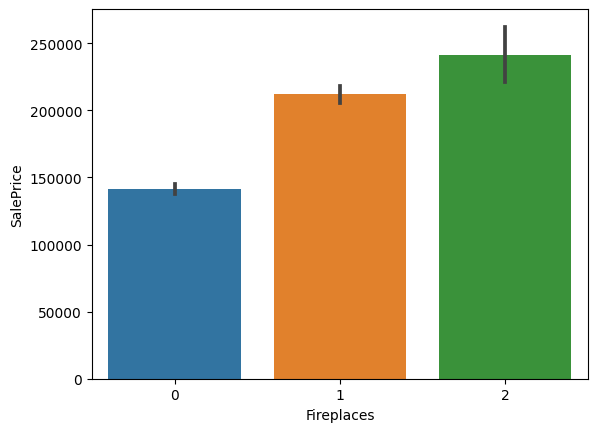

In [169]:
sns.barplot(x=data.Fireplaces, y=data.SalePrice);

Преобразуем его и возьмем

In [170]:
_sr = data.groupby("Fireplaces").SalePrice.median()
_sr

Fireplaces
0    135000.0
1    189975.0
2    205950.0
Name: SalePrice, dtype: float64

In [171]:
df["fireplaces"] = round(data.Fireplaces.map(_sr.to_dict()) / _sr.max(), 2)
df.head()

,subclass_price,lot_area,pav_strt,grav_al,pav_al,regShape,lvlContour,hlsContour,bnkContour,Neighborhood,...,electr,1stFlrSF,2ndFltSF,lowQualFin,GrLivArea,fullBath,kitQual,totRmsAbvGrd,func,fireplaces
Id,,,,,,,,,,,,,,,,,,,,,
1,239948.501672,8450,1,0,0,1,1,0,0,197965.773333,...,1,9.252027,4.132796,1,1710,2,3.23,6,1.0,0.66
2,185224.811567,9600,1,0,0,1,1,0,0,238772.727273,...,1,11.233877,0.000000,1,1262,2,2.13,4,1.0,0.92
3,239948.501672,11250,1,0,0,0,1,0,0,197965.773333,...,1,9.591663,4.161730,1,1786,2,3.23,4,1.0,0.92
4,166772.416667,9550,1,0,0,0,1,0,0,210624.725490,...,1,9.803061,3.888444,1,1717,1,3.23,5,1.0,0.92
5,239948.501672,14260,1,0,0,0,1,0,0,335295.317073,...,1,10.700467,4.589118,1,2198,2,3.23,7,1.0,0.92


## FireplaceQu - качество каминов
- **Ex** - 5
- **Gd** - 4
- **TA** - 3
- **Fa** - 2
- **Po** - 1
- **Na** - 0

In [172]:
data.FireplaceQu.fillna(0, inplace=True)
data.FireplaceQu.replace({"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1}, inplace=True)

In [173]:
data.groupby("FireplaceQu").SalePrice.describe()

,count,mean,std,min,25%,50%,75%,max
FireplaceQu,,,,,,,,
0,690.0,141331.482609,44389.786884,34900.0,112000.00,135000.0,164375.0,342643.0
1,20.0,129764.150000,31080.842115,60000.0,120925.00,131500.0,149500.0,172000.0
2,33.0,167298.484848,34287.717564,117000.0,143000.00,158000.0,187000.0,262000.0
3,313.0,205723.488818,71367.028772,82500.0,165000.00,187500.0,236000.0,745000.0
4,380.0,226351.415789,91123.148369,90350.0,159671.25,206950.0,274977.5,611657.0
5,24.0,337712.500000,123611.471764,130500.0,265070.00,314250.0,411324.5,755000.0


In [174]:
_sr = data.groupby("FireplaceQu").SalePrice.median()
_sr[0] = 0
_sr

FireplaceQu
0         0.0
1    131500.0
2    158000.0
3    187500.0
4    206950.0
5    314250.0
Name: SalePrice, dtype: float64

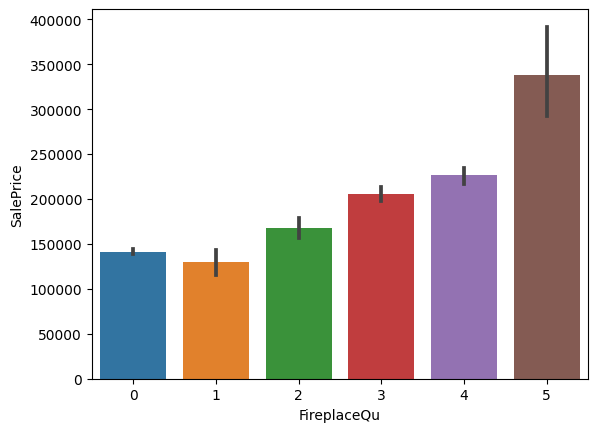

In [175]:
sns.barplot(x=data.FireplaceQu, y=data.SalePrice);

берем

In [176]:
df["fireplaceQual"] = round(data.FireplaceQu.map(_sr.to_dict()) / _sr.max(), 2)
df.head()

,subclass_price,lot_area,pav_strt,grav_al,pav_al,regShape,lvlContour,hlsContour,bnkContour,Neighborhood,...,1stFlrSF,2ndFltSF,lowQualFin,GrLivArea,fullBath,kitQual,totRmsAbvGrd,func,fireplaces,fireplaceQual
Id,,,,,,,,,,,,,,,,,,,,,
1,239948.501672,8450,1,0,0,1,1,0,0,197965.773333,...,9.252027,4.132796,1,1710,2,3.23,6,1.0,0.66,0.00
2,185224.811567,9600,1,0,0,1,1,0,0,238772.727273,...,11.233877,0.000000,1,1262,2,2.13,4,1.0,0.92,0.60
3,239948.501672,11250,1,0,0,0,1,0,0,197965.773333,...,9.591663,4.161730,1,1786,2,3.23,4,1.0,0.92,0.60
4,166772.416667,9550,1,0,0,0,1,0,0,210624.725490,...,9.803061,3.888444,1,1717,1,3.23,5,1.0,0.92,0.66
5,239948.501672,14260,1,0,0,0,1,0,0,335295.317073,...,10.700467,4.589118,1,2198,2,3.23,7,1.0,0.92,0.60


## GarageType - расположение гаража
- **2Types** - несколько типов гаражей
- **Attchd** - соединен с домом
- **Basment** - гараз на цокольном этаже
- **BuiltIn** - встроен в дом
- **CarPort** - место для авто
- **Detchd** - отделен от дома
- **NA** - нет гаража

In [177]:
data.GarageType.fillna('NA', inplace=True)
data.GarageType.replace({"CarPort": "NA", "Basment": "2Types"}, inplace=True)

In [178]:
data.groupby("GarageType").SalePrice.describe().sort_values("mean")

,count,mean,std,min,25%,50%,75%,max
GarageType,,,,,,,,
NA,90.0,103981.766667,32039.306400,34900.0,84500.0,100900.0,123900.00,200500.0
Detchd,387.0,134091.162791,41391.549953,35311.0,110000.0,129500.0,147700.00,475000.0
2Types,25.0,158341.720000,57786.233667,55993.0,137500.0,150000.0,171000.00,359100.0
Attchd,870.0,202892.656322,77146.621778,60000.0,150000.0,185000.0,235000.00,755000.0
BuiltIn,88.0,254751.738636,102230.854394,91000.0,180750.0,227500.0,300719.25,582933.0


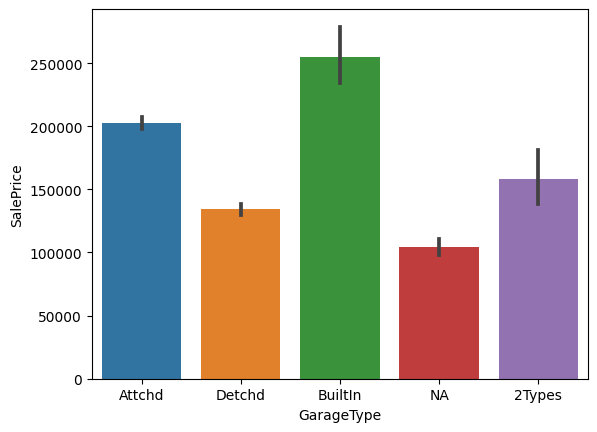

In [179]:
sns.barplot(x=data.GarageType, y=data.SalePrice);

In [180]:
_sr = data.groupby("GarageType").SalePrice.median()
_sr

GarageType
2Types     150000.0
Attchd     185000.0
BuiltIn    227500.0
Detchd     129500.0
NA         100900.0
Name: SalePrice, dtype: float64

In [181]:
df["garageType"] = round(data.GarageType.map(_sr.to_dict()) / _sr.max(), 2)
df.head()

,subclass_price,lot_area,pav_strt,grav_al,pav_al,regShape,lvlContour,hlsContour,bnkContour,Neighborhood,...,2ndFltSF,lowQualFin,GrLivArea,fullBath,kitQual,totRmsAbvGrd,func,fireplaces,fireplaceQual,garageType
Id,,,,,,,,,,,,,,,,,,,,,
1,239948.501672,8450,1,0,0,1,1,0,0,197965.773333,...,4.132796,1,1710,2,3.23,6,1.0,0.66,0.00,0.81
2,185224.811567,9600,1,0,0,1,1,0,0,238772.727273,...,0.000000,1,1262,2,2.13,4,1.0,0.92,0.60,0.81
3,239948.501672,11250,1,0,0,0,1,0,0,197965.773333,...,4.161730,1,1786,2,3.23,4,1.0,0.92,0.60,0.81
4,166772.416667,9550,1,0,0,0,1,0,0,210624.725490,...,3.888444,1,1717,1,3.23,5,1.0,0.92,0.66,0.57
5,239948.501672,14260,1,0,0,0,1,0,0,335295.317073,...,4.589118,1,2198,2,3.23,7,1.0,0.92,0.60,0.81


## GarageYrBlt - дата постройки гаража

In [182]:
data.GarageYrBlt.fillna(0, inplace=True)

In [183]:
_df = pd.DataFrame(data={
    "GarageYrBlt": data.GarageYrBlt.values,
    "SalePrice": data.SalePrice.values
}, index=data.index)

_df["GarageYrBlt"] = round(_df["GarageYrBlt"], -1)
_df.GarageYrBlt.replace({1900: 1910}, inplace=True)

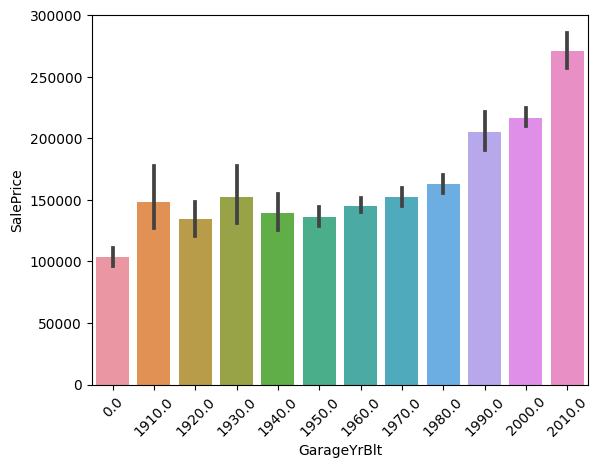

In [184]:
sns.barplot(x=_df.GarageYrBlt, y=_df.SalePrice);
plt.xticks(rotation=45);

Разделим на 4 категории и добавим в фрейм: 0, до 1990, 1990, 2000, 2010.

In [185]:
_df.GarageYrBlt.replace({1910: 1989, 1920: 1989, 1930: 1989, 1940: 1989,
                         1950: 1989, 1960: 1989, 1970: 1989, 1980: 1989,
                         1990: 2000}, inplace=True)

_sr_yr_price = _df.groupby("GarageYrBlt").SalePrice.median()
_sr_yr_price

GarageYrBlt
0.0       100000.0
1989.0    140000.0
2000.0    194500.0
2010.0    248328.0
Name: SalePrice, dtype: float64

In [186]:
df["GarageYrBlt"] = _df.GarageYrBlt.map(_sr_yr_price.to_dict()) / _sr_yr_price.max()
df.head()

,subclass_price,lot_area,pav_strt,grav_al,pav_al,regShape,lvlContour,hlsContour,bnkContour,Neighborhood,...,lowQualFin,GrLivArea,fullBath,kitQual,totRmsAbvGrd,func,fireplaces,fireplaceQual,garageType,GarageYrBlt
Id,,,,,,,,,,,,,,,,,,,,,
1,239948.501672,8450,1,0,0,1,1,0,0,197965.773333,...,1,1710,2,3.23,6,1.0,0.66,0.00,0.81,0.783238
2,185224.811567,9600,1,0,0,1,1,0,0,238772.727273,...,1,1262,2,2.13,4,1.0,0.92,0.60,0.81,0.563770
3,239948.501672,11250,1,0,0,0,1,0,0,197965.773333,...,1,1786,2,3.23,4,1.0,0.92,0.60,0.81,0.783238
4,166772.416667,9550,1,0,0,0,1,0,0,210624.725490,...,1,1717,1,3.23,5,1.0,0.92,0.66,0.57,0.783238
5,239948.501672,14260,1,0,0,0,1,0,0,335295.317073,...,1,2198,2,3.23,7,1.0,0.92,0.60,0.81,0.783238


## GarageFinish - внутренная отделка гаража
- **Fin** - закончена
- **RFin** - грубая
- **Unf** - не закончена
- **NA** - нет гаража

In [187]:
data.GarageFinish.fillna("NA", inplace=True)

In [188]:
data.groupby("GarageFinish").SalePrice.describe()

,count,mean,std,min,25%,50%,75%,max
GarageFinish,,,,,,,,
Fin,352.0,240052.690341,96960.593232,82500.0,176000.0,215000.0,283847.25,755000.0
NA,81.0,103317.283951,32815.023389,34900.0,82500.0,100000.0,124000.00,200500.0
RFn,422.0,202068.869668,63536.222518,68400.0,158000.0,190000.0,232000.00,582933.0
Unf,605.0,142156.423140,46498.528211,35311.0,116000.0,135000.0,157000.00,475000.0


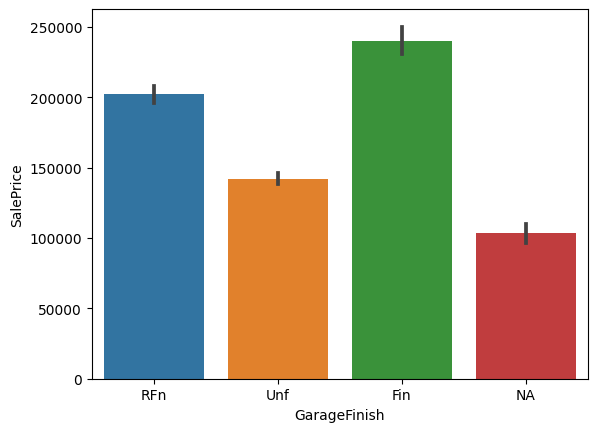

In [189]:
sns.barplot(x=data.GarageFinish, y=data.SalePrice);

Изменяем и берем

In [190]:
_sr = data.groupby("GarageFinish").SalePrice.median()
_sr

GarageFinish
Fin    215000.0
NA     100000.0
RFn    190000.0
Unf    135000.0
Name: SalePrice, dtype: float64

In [191]:
df["garageFin"] = round(data.GarageFinish.map(_sr.to_dict()) / _sr.max(), 2)
df.head()

,subclass_price,lot_area,pav_strt,grav_al,pav_al,regShape,lvlContour,hlsContour,bnkContour,Neighborhood,...,GrLivArea,fullBath,kitQual,totRmsAbvGrd,func,fireplaces,fireplaceQual,garageType,GarageYrBlt,garageFin
Id,,,,,,,,,,,,,,,,,,,,,
1,239948.501672,8450,1,0,0,1,1,0,0,197965.773333,...,1710,2,3.23,6,1.0,0.66,0.00,0.81,0.783238,0.88
2,185224.811567,9600,1,0,0,1,1,0,0,238772.727273,...,1262,2,2.13,4,1.0,0.92,0.60,0.81,0.563770,0.88
3,239948.501672,11250,1,0,0,0,1,0,0,197965.773333,...,1786,2,3.23,4,1.0,0.92,0.60,0.81,0.783238,0.88
4,166772.416667,9550,1,0,0,0,1,0,0,210624.725490,...,1717,1,3.23,5,1.0,0.92,0.66,0.57,0.783238,0.63
5,239948.501672,14260,1,0,0,0,1,0,0,335295.317073,...,2198,2,3.23,7,1.0,0.92,0.60,0.81,0.783238,0.88


## GarageCars - сколько машин помещается в гараж

In [192]:
data.groupby("GarageCars").SalePrice.describe()

,count,mean,std,min,25%,50%,75%,max
GarageCars,,,,,,,,
0,81.0,103317.283951,32815.023389,34900.0,82500.0,100000.0,124000.0,200500.0
1,369.0,128116.688347,30412.386890,35311.0,110000.0,128000.0,142000.0,266500.0
2,824.0,183851.663835,51617.144258,55993.0,148000.0,177750.0,213000.0,430000.0
3,181.0,309636.121547,106832.925939,81000.0,246578.0,295000.0,367294.0,755000.0
4,5.0,192655.800000,52621.839745,123000.0,168000.0,200000.0,206300.0,265979.0


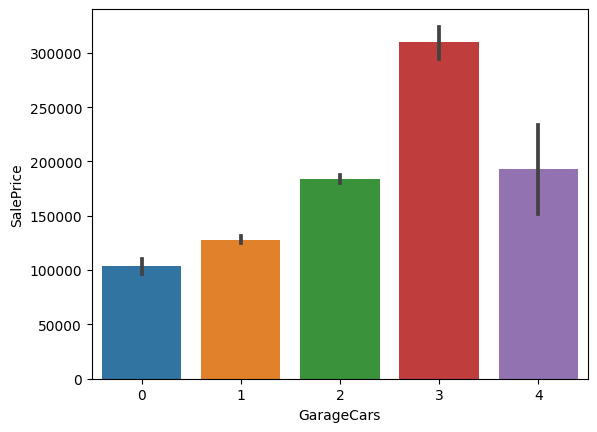

In [193]:
sns.barplot(x=data.GarageCars, y=data.SalePrice);

По какой-то причине гараж на 4 машины влияет на цену дома так же, как и гараж на 2 машины, но это не мещает нам добавить признак в фрейм

In [194]:
_sr = data.groupby("GarageCars").SalePrice.median()
_sr

GarageCars
0    100000.0
1    128000.0
2    177750.0
3    295000.0
4    200000.0
Name: SalePrice, dtype: float64

In [195]:
df["garageCars"] = round(data.GarageCars.map(_sr.to_dict()) / _sr.max(), 2)
df.head()

,subclass_price,lot_area,pav_strt,grav_al,pav_al,regShape,lvlContour,hlsContour,bnkContour,Neighborhood,...,fullBath,kitQual,totRmsAbvGrd,func,fireplaces,fireplaceQual,garageType,GarageYrBlt,garageFin,garageCars
Id,,,,,,,,,,,,,,,,,,,,,
1,239948.501672,8450,1,0,0,1,1,0,0,197965.773333,...,2,3.23,6,1.0,0.66,0.00,0.81,0.783238,0.88,0.6
2,185224.811567,9600,1,0,0,1,1,0,0,238772.727273,...,2,2.13,4,1.0,0.92,0.60,0.81,0.563770,0.88,0.6
3,239948.501672,11250,1,0,0,0,1,0,0,197965.773333,...,2,3.23,4,1.0,0.92,0.60,0.81,0.783238,0.88,0.6
4,166772.416667,9550,1,0,0,0,1,0,0,210624.725490,...,1,3.23,5,1.0,0.92,0.66,0.57,0.783238,0.63,1.0
5,239948.501672,14260,1,0,0,0,1,0,0,335295.317073,...,2,3.23,7,1.0,0.92,0.60,0.81,0.783238,0.88,1.0


## GarageArea - площадь гаража

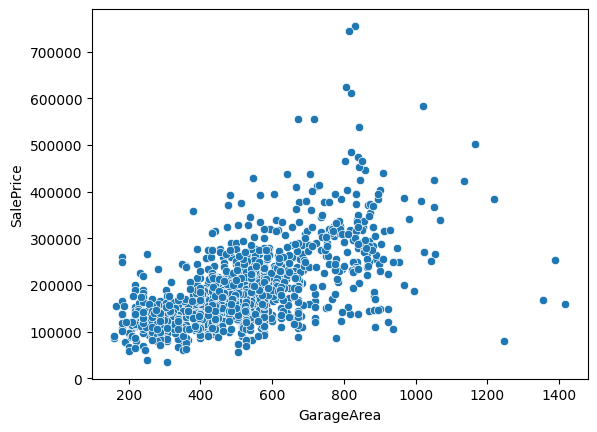

In [196]:
sns.scatterplot(x=data.query("GarageArea > 0").GarageArea,
                y=data.query("GarageArea > 0").SalePrice);

C:\Users\vlad\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


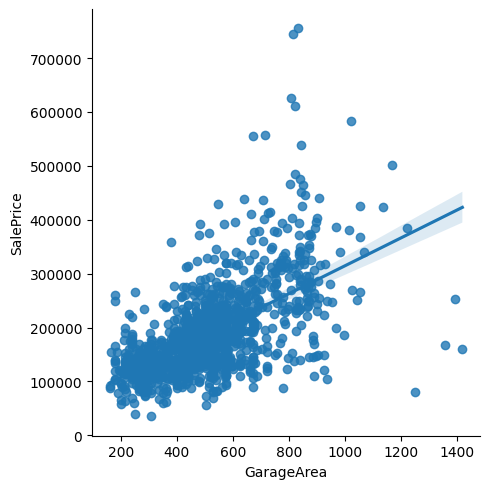

In [197]:
sns.lmplot(
    data=data.query("GarageArea > 0"), x="GarageArea", y="SalePrice");

Берем, тут есть линейная зависимость

In [198]:
df["garageArea"] = data.GarageArea

## GarageQual - качество гаража
- **Ex** - 5
- **Gd** - 4
- **TA** - 3
- **Fa** - 2
- **Po** - 1
- **Na** - 0

In [199]:
data.GarageQual.fillna(0, inplace=True)
data.GarageQual.replace({"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1}, inplace=True)

In [200]:
data.groupby("GarageQual").SalePrice.describe()

,count,mean,std,min,25%,50%,75%,max
GarageQual,,,,,,,,
0,81.0,103317.283951,32815.023389,34900.0,82500.0,100000.0,124000.0,200500.0
1,3.0,100166.666667,35143.752408,67000.0,81750.0,96500.0,116750.0,137000.0
2,48.0,123573.354167,42971.440985,64500.0,99500.0,115000.0,135612.5,256000.0
3,1311.0,187489.836003,78774.948567,35311.0,135500.0,170000.0,220000.0,755000.0
4,14.0,215860.714286,74126.739021,90350.0,165975.0,209115.0,271852.5,325000.0
5,3.0,241000.000000,202680.166765,120500.0,124000.0,127500.0,301250.0,475000.0


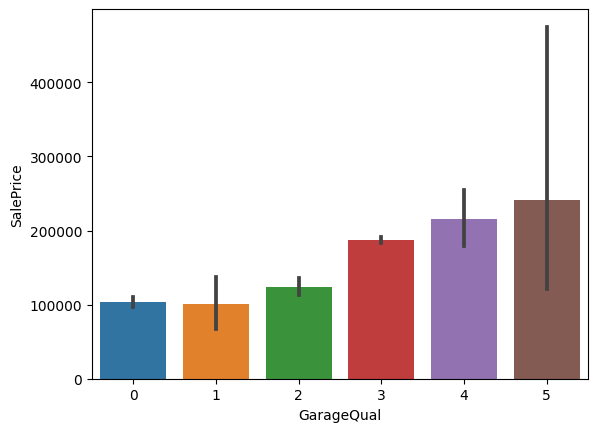

In [201]:
sns.barplot(x=data.GarageQual, y=data.SalePrice);

Конечно не сильно, но на цену влияет, поэтому возьмем признак, но 0 и 1 соединим 

In [202]:
data.GarageQual.replace({0: 1}, inplace=True)
_sr = data.groupby("GarageQual").SalePrice.mean()
_sr

GarageQual
1    103204.761905
2    123573.354167
3    187489.836003
4    215860.714286
5    241000.000000
Name: SalePrice, dtype: float64

In [203]:
df["GarageQual"] = round(data.GarageQual.map(_sr.to_dict()) / _sr.max(), 2)
df.head()

,subclass_price,lot_area,pav_strt,grav_al,pav_al,regShape,lvlContour,hlsContour,bnkContour,Neighborhood,...,totRmsAbvGrd,func,fireplaces,fireplaceQual,garageType,GarageYrBlt,garageFin,garageCars,garageArea,GarageQual
Id,,,,,,,,,,,,,,,,,,,,,
1,239948.501672,8450,1,0,0,1,1,0,0,197965.773333,...,6,1.0,0.66,0.00,0.81,0.783238,0.88,0.6,548,0.78
2,185224.811567,9600,1,0,0,1,1,0,0,238772.727273,...,4,1.0,0.92,0.60,0.81,0.563770,0.88,0.6,460,0.78
3,239948.501672,11250,1,0,0,0,1,0,0,197965.773333,...,4,1.0,0.92,0.60,0.81,0.783238,0.88,0.6,608,0.78
4,166772.416667,9550,1,0,0,0,1,0,0,210624.725490,...,5,1.0,0.92,0.66,0.57,0.783238,0.63,1.0,642,0.78
5,239948.501672,14260,1,0,0,0,1,0,0,335295.317073,...,7,1.0,0.92,0.60,0.81,0.783238,0.88,1.0,836,0.78


## GarageCond - состояние гаража
- **Ex** - 5
- **Gd** - 4
- **TA** - 3
- **Fa** - 2
- **Po** - 1
- **Na** - 0

In [204]:
data.GarageCond.fillna(0, inplace=True)
data.GarageCond.replace({"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1}, inplace=True)

In [205]:
data.groupby("GarageCond").SalePrice.describe()

,count,mean,std,min,25%,50%,75%,max
GarageCond,,,,,,,,
0,81.0,103317.283951,32815.023389,34900.0,82500.0,100000.0,124000.0,200500.0
1,7.0,108500.000000,22662.377045,67000.0,101250.0,108000.0,122500.0,137000.0
2,35.0,114654.028571,36420.903588,40000.0,89000.0,114504.0,137500.0,220000.0
3,1326.0,187885.735294,79103.322640,35311.0,135000.0,170000.0,221000.0,755000.0
4,9.0,179930.000000,64769.318354,118500.0,144000.0,148000.0,180000.0,302000.0
5,2.0,124000.000000,4949.747468,120500.0,122250.0,124000.0,125750.0,127500.0


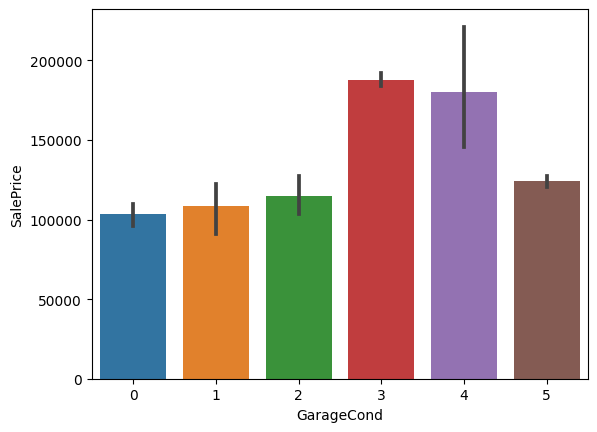

In [206]:
sns.barplot(x=data.GarageCond, y=data.SalePrice);

Если смотреть по цене, то есть смысл объединить 0,1,2,5 в одну категорию, а 3 и 4 в другую. Вообще странно, что гаражи с условиями на 5 звезд стоят дешевле, чем на 3.

In [207]:
data.GarageCond.replace({0: 1, 2: 1, 3: 5, 4: 5}, inplace=True)

In [208]:
data.groupby("GarageCond").SalePrice.describe()

,count,mean,std,min,25%,50%,75%,max
GarageCond,,,,,,,,
1,123.0,106838.138211,33570.269253,34900.0,84500.0,104000.0,128000.0,220000.0
5,1337.0,187736.615557,78977.643335,35311.0,135000.0,170000.0,221000.0,755000.0


In [209]:
_sr = data.groupby("GarageCond").SalePrice.median()
_sr

GarageCond
1    104000.0
5    170000.0
Name: SalePrice, dtype: float64

In [210]:
df["garageCond"] = round(data.GarageCond.map(_sr.to_dict()) / _sr.max(), 2)
df.head()

,subclass_price,lot_area,pav_strt,grav_al,pav_al,regShape,lvlContour,hlsContour,bnkContour,Neighborhood,...,func,fireplaces,fireplaceQual,garageType,GarageYrBlt,garageFin,garageCars,garageArea,GarageQual,garageCond
Id,,,,,,,,,,,,,,,,,,,,,
1,239948.501672,8450,1,0,0,1,1,0,0,197965.773333,...,1.0,0.66,0.00,0.81,0.783238,0.88,0.6,548,0.78,1.0
2,185224.811567,9600,1,0,0,1,1,0,0,238772.727273,...,1.0,0.92,0.60,0.81,0.563770,0.88,0.6,460,0.78,1.0
3,239948.501672,11250,1,0,0,0,1,0,0,197965.773333,...,1.0,0.92,0.60,0.81,0.783238,0.88,0.6,608,0.78,1.0
4,166772.416667,9550,1,0,0,0,1,0,0,210624.725490,...,1.0,0.92,0.66,0.57,0.783238,0.63,1.0,642,0.78,1.0
5,239948.501672,14260,1,0,0,0,1,0,0,335295.317073,...,1.0,0.92,0.60,0.81,0.783238,0.88,1.0,836,0.78,1.0


## PavedDrive - мощеная подъездная дорожка
- **Y** - мощеная
- **P** - частично мощеная
- **N** - земля/гравий

In [211]:
data.groupby("PavedDrive").SalePrice.describe()

,count,mean,std,min,25%,50%,75%,max
PavedDrive,,,,,,,,
N,90.0,115039.122222,44352.523309,34900.0,84625.0,111000.0,137100.0,265979.0
P,30.0,132330.000000,33503.030228,79500.0,102750.0,132250.0,159100.0,215000.0
Y,1340.0,186433.973881,79665.503047,35311.0,134337.5,168500.0,220000.0,755000.0


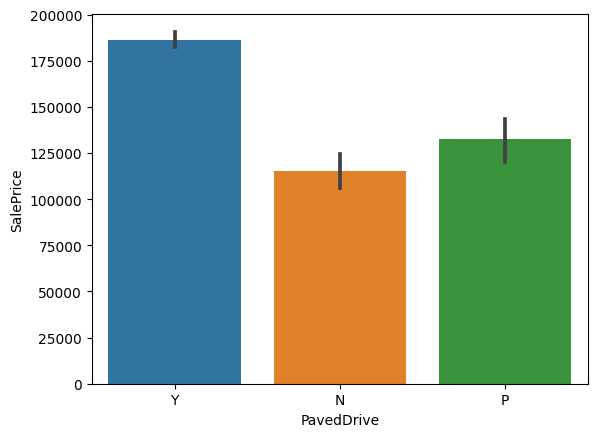

In [212]:
sns.barplot(x=data.PavedDrive, y=data.SalePrice);

Тут все очевидно - берем

In [213]:
_sr = data.groupby("PavedDrive").SalePrice.median()
_sr

PavedDrive
N    111000.0
P    132250.0
Y    168500.0
Name: SalePrice, dtype: float64

In [214]:
df["pavedDrive"] = round(data.PavedDrive.map(_sr.to_dict()) / _sr.max(), 2)
df.head()

,subclass_price,lot_area,pav_strt,grav_al,pav_al,regShape,lvlContour,hlsContour,bnkContour,Neighborhood,...,fireplaces,fireplaceQual,garageType,GarageYrBlt,garageFin,garageCars,garageArea,GarageQual,garageCond,pavedDrive
Id,,,,,,,,,,,,,,,,,,,,,
1,239948.501672,8450,1,0,0,1,1,0,0,197965.773333,...,0.66,0.00,0.81,0.783238,0.88,0.6,548,0.78,1.0,1.0
2,185224.811567,9600,1,0,0,1,1,0,0,238772.727273,...,0.92,0.60,0.81,0.563770,0.88,0.6,460,0.78,1.0,1.0
3,239948.501672,11250,1,0,0,0,1,0,0,197965.773333,...,0.92,0.60,0.81,0.783238,0.88,0.6,608,0.78,1.0,1.0
4,166772.416667,9550,1,0,0,0,1,0,0,210624.725490,...,0.92,0.66,0.57,0.783238,0.63,1.0,642,0.78,1.0,1.0
5,239948.501672,14260,1,0,0,0,1,0,0,335295.317073,...,0.92,0.60,0.81,0.783238,0.88,1.0,836,0.78,1.0,1.0


## WoodDeckSF - площадь деревянного покрытия

C:\Users\vlad\AppData\Local\Temp\ipykernel_9872\239508370.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.WoodDeckSF);


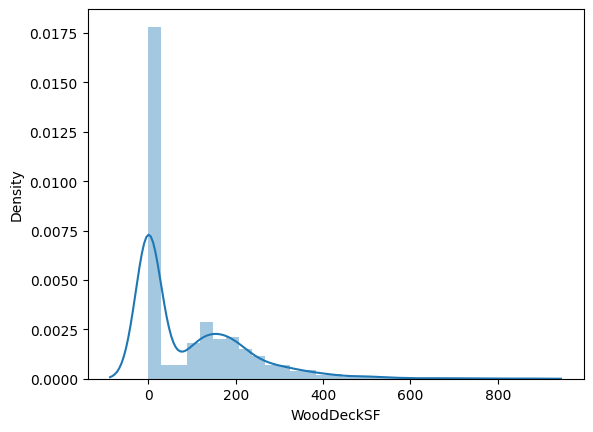

In [215]:
sns.distplot(data.WoodDeckSF);

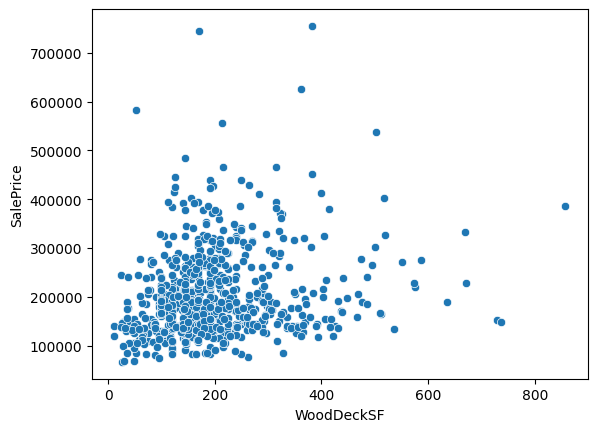

In [216]:
sns.scatterplot(x=data.query("WoodDeckSF > 0").WoodDeckSF, y=data.SalePrice);

Берем

In [217]:
df["woodDeckSF"] = data.WoodDeckSF

## OpenPorchSF - площадь открытой веранды

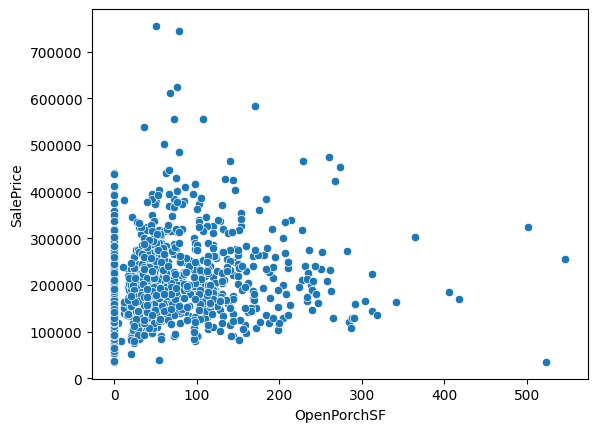

In [218]:
sns.scatterplot(x=data.OpenPorchSF, y=data.SalePrice);

Разброс сильный, но взять можно

In [219]:
df["openPorchSF"] = data.OpenPorchSF

## EnclosedPorch - площадь крытой веранды

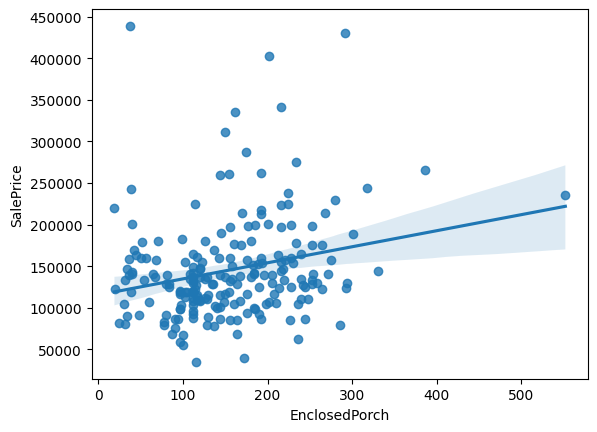

In [220]:
sns.regplot(x=data.query("EnclosedPorch > 0").EnclosedPorch,
            y=data.query("EnclosedPorch > 0").SalePrice);

In [221]:
df["enclosedPorch"] = data.EnclosedPorch

## 3SsnPorch - трехсезонная плозадь веранды

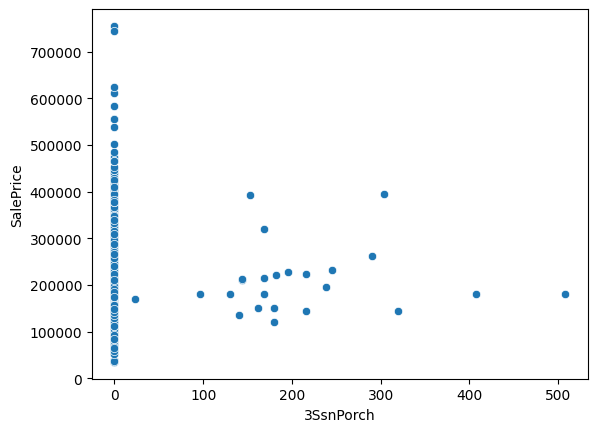

In [222]:
sns.scatterplot(x=data["3SsnPorch"], y=data.SalePrice);

Тут данных мало, да и влияния этот признак особого не оказывает

## ScreenPorch - площадь веранды с окнами

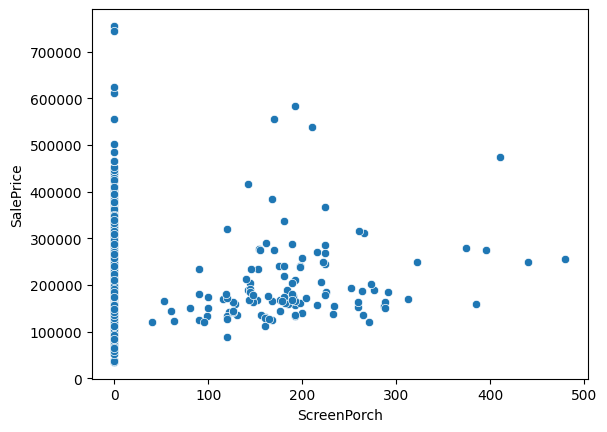

In [223]:
sns.scatterplot(x=data.ScreenPorch, y=data.SalePrice);

берем

In [224]:
df["screenPorch"] = data.ScreenPorch

## PoolArea - площадь бассейна

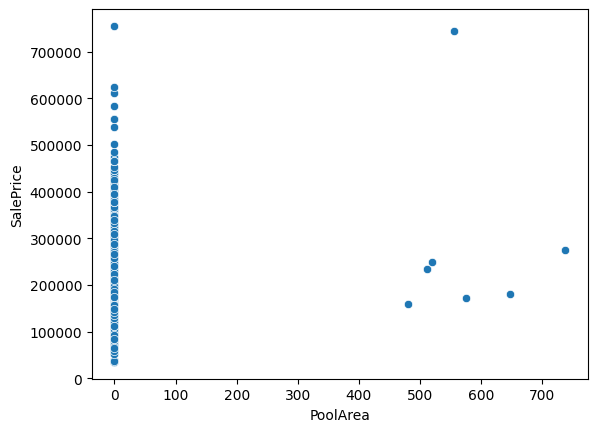

In [225]:
sns.scatterplot(x=data.PoolArea, y=data.SalePrice);

Тут уже важен сам факт наличия бассейна

In [226]:
df["pool"] = (data.PoolArea > 0).astype(np.int64)
df.head()

,subclass_price,lot_area,pav_strt,grav_al,pav_al,regShape,lvlContour,hlsContour,bnkContour,Neighborhood,...,garageCars,garageArea,GarageQual,garageCond,pavedDrive,woodDeckSF,openPorchSF,enclosedPorch,screenPorch,pool
Id,,,,,,,,,,,,,,,,,,,,,
1,239948.501672,8450,1,0,0,1,1,0,0,197965.773333,...,0.6,548,0.78,1.0,1.0,0,61,0,0,0
2,185224.811567,9600,1,0,0,1,1,0,0,238772.727273,...,0.6,460,0.78,1.0,1.0,298,0,0,0,0
3,239948.501672,11250,1,0,0,0,1,0,0,197965.773333,...,0.6,608,0.78,1.0,1.0,0,42,0,0,0
4,166772.416667,9550,1,0,0,0,1,0,0,210624.725490,...,1.0,642,0.78,1.0,1.0,0,35,272,0,0
5,239948.501672,14260,1,0,0,0,1,0,0,335295.317073,...,1.0,836,0.78,1.0,1.0,192,84,0,0,0


## PoolQC - качество бассейна
- **Ex** - 5
- **Gd** - 4
- **TA** - 3
- **Fa** - 2
- **Po** - 1
- **Na** - 0

In [227]:
data.PoolQC.fillna(0, inplace=True)
data.PoolQC.replace({"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1}, inplace=True)

In [228]:
data.groupby("PoolQC").SalePrice.describe()

,count,mean,std,min,25%,50%,75%,max
PoolQC,,,,,,,,
0,1453.0,180404.663455,78168.872519,34900.0,129900.0,162900.0,213500.0,755000.0
2,2.0,215500.000000,48790.367902,181000.0,198250.0,215500.0,232750.0,250000.0
4,3.0,201990.000000,63441.392639,160000.0,165500.0,171000.0,222985.0,274970.0
5,2.0,490000.000000,360624.458405,235000.0,362500.0,490000.0,617500.0,745000.0


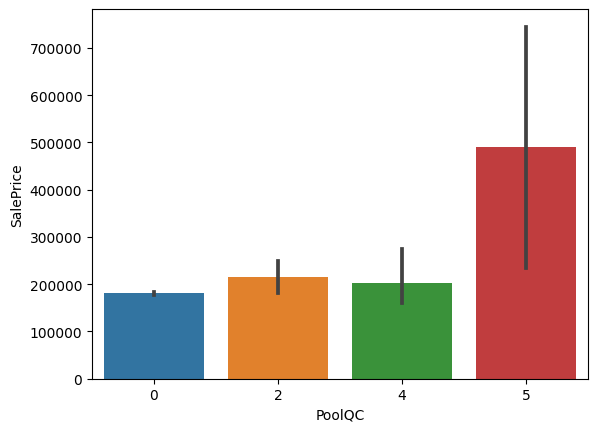

In [229]:
sns.barplot(x=data.PoolQC, y=data.SalePrice);

Бассейна с оценкой 5 стоят дороже (причем сильно), поэтому добавим этот признак

In [230]:
df["poolQC"] = (data.PoolQC == 5).astype(np.int64)

## Fence - качество ограждения
- **GdPrv** - норм приватность
- **MnPrv** - минимальная приватность
- **GdWo** - норм дерево
- **MnWw** - такое себе дерево
- **NA** - нет забора

In [231]:
data.Fence.fillna("NA", inplace=True)

In [232]:
data.groupby("Fence").SalePrice.describe()

,count,mean,std,min,25%,50%,75%,max
Fence,,,,,,,,
GdPrv,59.0,178927.457627,56757.237563,108000.0,144950.0,167500.0,189475.0,475000.0
GdWo,54.0,140379.314815,53592.585059,34900.0,118625.0,138750.0,151750.0,381000.0
MnPrv,157.0,148751.089172,66096.069463,40000.0,119900.0,137450.0,158000.0,745000.0
MnWw,11.0,134286.363636,21781.805376,110000.0,121500.0,130000.0,143000.0,187000.0
NA,1179.0,187596.837998,81656.497075,35311.0,132750.0,173000.0,224700.0,755000.0


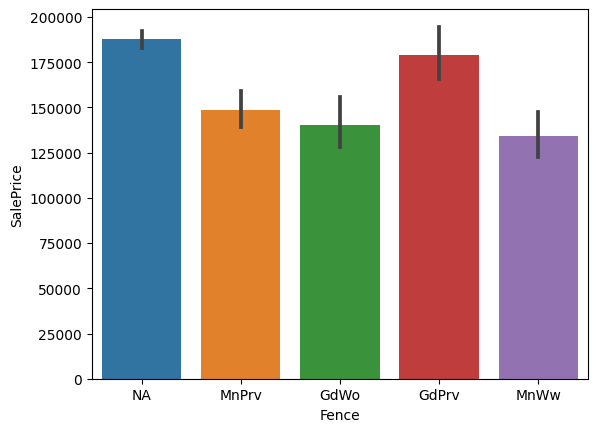

In [233]:
sns.barplot(x=data.Fence, y=data.SalePrice);

Берем

In [234]:
_sr = data.groupby("Fence").SalePrice.median()
_sr

Fence
GdPrv    167500.0
GdWo     138750.0
MnPrv    137450.0
MnWw     130000.0
NA       173000.0
Name: SalePrice, dtype: float64

In [235]:
df["Fence"] = round(data.Fence.map(_sr.to_dict()) / _sr.max(), 2)
df.head()

,subclass_price,lot_area,pav_strt,grav_al,pav_al,regShape,lvlContour,hlsContour,bnkContour,Neighborhood,...,GarageQual,garageCond,pavedDrive,woodDeckSF,openPorchSF,enclosedPorch,screenPorch,pool,poolQC,Fence
Id,,,,,,,,,,,,,,,,,,,,,
1,239948.501672,8450,1,0,0,1,1,0,0,197965.773333,...,0.78,1.0,1.0,0,61,0,0,0,0,1.0
2,185224.811567,9600,1,0,0,1,1,0,0,238772.727273,...,0.78,1.0,1.0,298,0,0,0,0,0,1.0
3,239948.501672,11250,1,0,0,0,1,0,0,197965.773333,...,0.78,1.0,1.0,0,42,0,0,0,0,1.0
4,166772.416667,9550,1,0,0,0,1,0,0,210624.725490,...,0.78,1.0,1.0,0,35,272,0,0,0,1.0
5,239948.501672,14260,1,0,0,0,1,0,0,335295.317073,...,0.78,1.0,1.0,192,84,0,0,0,0,1.0


## MiscFeature - другой функционал дома
- **Elev** - лифт
- **Gar2** - 2-й гараж
- **Othr** - другое
- **Shed** - сарай
- **TenC** - теннисный корт
- **NA** - нет

In [236]:
data.MiscFeature.fillna("NA", inplace=True)

In [237]:
data.groupby("MiscFeature").SalePrice.describe()

,count,mean,std,min,25%,50%,75%,max
MiscFeature,,,,,,,,
Gar2,2.0,170750.000000,27223.611076,151500.0,161125.0,170750.0,180375.0,190000.0
NA,1406.0,182046.410384,80084.136570,34900.0,130000.0,164250.0,215000.0,755000.0
Othr,2.0,94000.000000,55154.328933,55000.0,74500.0,94000.0,113500.0,133000.0
Shed,49.0,151187.612245,51642.728056,55993.0,120000.0,144000.0,172000.0,277000.0
TenC,1.0,250000.000000,NaN,250000.0,250000.0,250000.0,250000.0,250000.0


Стоит взять

In [238]:
_sr = data.groupby("MiscFeature").SalePrice.median()
_sr

MiscFeature
Gar2    170750.0
NA      164250.0
Othr     94000.0
Shed    144000.0
TenC    250000.0
Name: SalePrice, dtype: float64

In [239]:
df["miscFeature"] = round(data.MiscFeature.map(_sr.to_dict()) / _sr.max(), 2)

## MiscVal - значение $ другого функционала

In [240]:
data.groupby("MiscVal").SalePrice.describe()

,count,mean,std,min,25%,50%,75%,max
MiscVal,,,,,,,,
0,1408.0,181964.703835,80057.173616,34900.0,130000.0,164000.0,215000.0,755000.0
54,1.0,55993.000000,NaN,55993.0,55993.0,55993.0,55993.0,55993.0
350,1.0,200000.000000,NaN,200000.0,200000.0,200000.0,200000.0,200000.0
400,11.0,148940.909091,37857.923993,83000.0,128975.0,140000.0,180500.0,202500.0
450,4.0,116437.500000,36700.576176,76500.0,94125.0,113750.0,136062.5,161750.0
480,2.0,152500.000000,45961.940777,120000.0,136250.0,152500.0,168750.0,185000.0
500,8.0,169300.000000,56351.245391,90000.0,141125.0,163950.0,195000.0,277000.0
560,1.0,81000.000000,NaN,81000.0,81000.0,81000.0,81000.0,81000.0
600,4.0,123350.000000,29818.171194,79500.0,117375.0,134950.0,140925.0,144000.0


Большинство значений представлены всего 1-2 видами, брать не будем

## MoSold - продаж в месяц

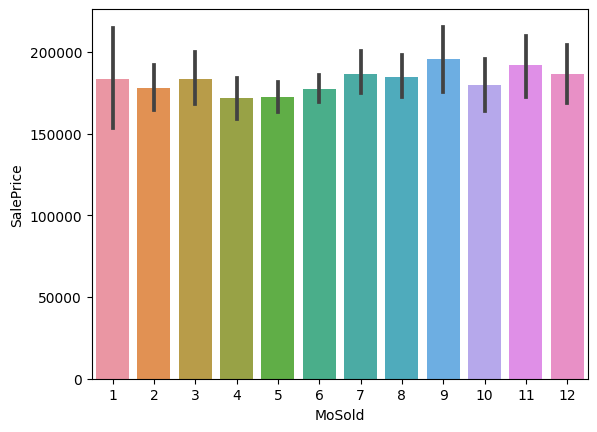

In [241]:
sns.barplot(x=data.MoSold, y=data.SalePrice);

In [242]:
for i in range(1, 13):
    data.MoSold.replace({i: ["winter", "spring", "summer", "autumn"][(i % 12) // 3]}, inplace=True)

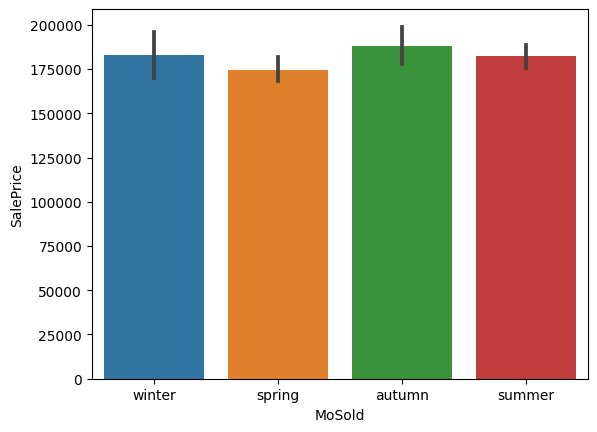

In [243]:
sns.barplot(x=data.MoSold, y=data.SalePrice);

Каждый из сезонов имеет примерно одинаковое значение, поэтому не берем

## YrSold - продажи в год

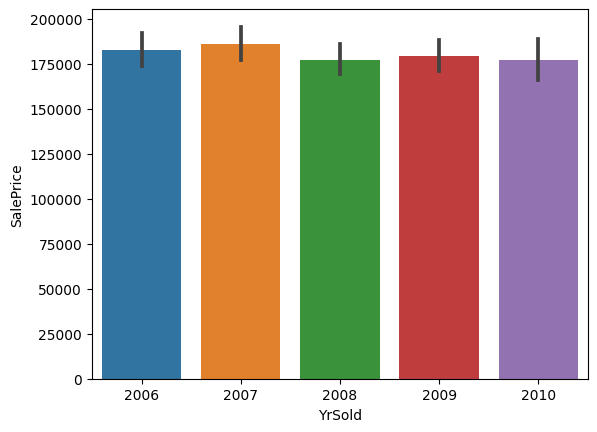

In [244]:
sns.barplot(x=data.YrSold, y=data.SalePrice);

Аналогичная картина

## SaleType - тип пролажи

In [245]:
data.groupby("SaleType").SalePrice.describe()

,count,mean,std,min,25%,50%,75%,max
SaleType,,,,,,,,
COD,43.0,143973.255814,47098.294314,60000.0,112000.00,139000.0,160500.00,287000.0
CWD,4.0,210600.000000,86421.486526,136000.0,152500.00,188750.0,246850.00,328900.0
Con,2.0,269600.000000,76933.217793,215200.0,242400.00,269600.0,296800.00,324000.0
ConLD,9.0,138780.888889,53876.560647,79900.0,85000.00,140000.0,160000.00,235128.0
ConLI,5.0,200390.000000,145282.519595,110000.0,115000.00,125000.0,200000.00,451950.0
ConLw,5.0,143700.000000,67291.901444,60000.0,95000.00,144000.0,207500.00,212000.0
New,122.0,274945.418033,103239.582158,113000.0,194050.25,247453.0,341919.75,611657.0
Oth,3.0,119850.000000,28441.035495,93500.0,104775.00,116050.0,133025.00,150000.0
WD,1267.0,173401.836622,71129.686245,34900.0,128925.00,158000.0,202950.00,755000.0


In [246]:
data.SaleType.replace({"CWD": "Other", "Con": "Other", "ConLD": "Other",
                       "ConLI": "Other", "ConLw": "Other", "Oth": "Other"},
                      inplace=True)

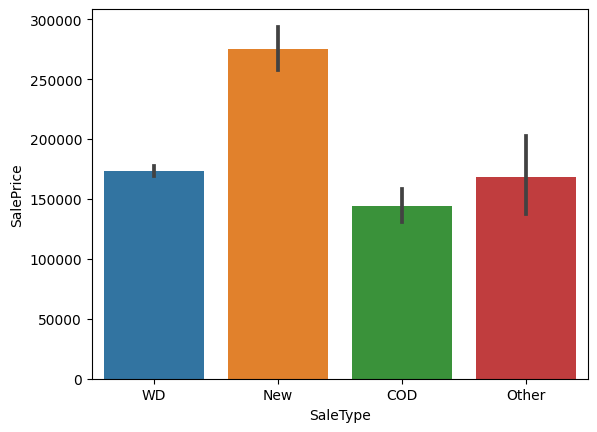

In [247]:
sns.barplot(x=data.SaleType, y=data.SalePrice);

Очевидно, что новое стоит дороже старого

In [248]:
data.SaleType.replace({"WD": "Other", "COD": "Other"}, inplace=True)

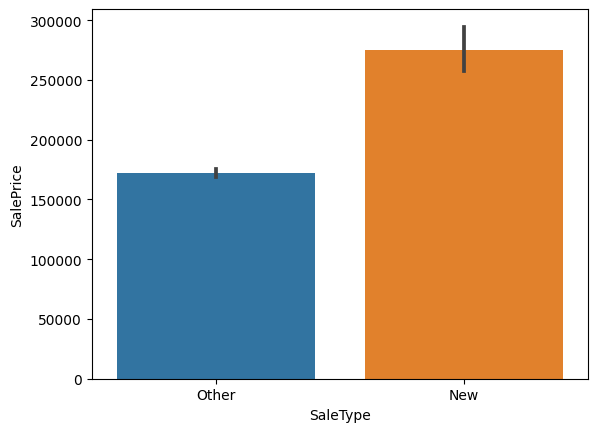

In [249]:
sns.barplot(x=data.SaleType, y=data.SalePrice);

In [250]:
_sr = data.groupby("SaleType").SalePrice.median()
_sr

SaleType
New      247453.0
Other    157000.0
Name: SalePrice, dtype: float64

In [251]:
df["SaleType"] = round(data.SaleType.map(_sr.to_dict()) / _sr.max(), 2)

## SaleCondition - условие продажи
- **Normal** - обычная продажа
- **Abnorml** - обмен, обращение взыскания, короткая продажа
- **AdjLand** - покупка прилегающего земельного участка
- **Alloca** - два связанных объекта с отдельными документами (кондоминимум с гаражом)
- **Family** - Продажа между челанми семьи
- **Partial** - Дом не достроен на момент последней оценки

In [252]:
data.groupby("SaleCondition").SalePrice.describe()

,count,mean,std,min,25%,50%,75%,max
SaleCondition,,,,,,,,
Abnorml,101.0,146526.623762,82796.213395,34900.0,104000.00,130000.0,172500.0,745000.0
AdjLand,4.0,104125.000000,26135.464411,81000.0,81750.00,104000.0,126375.0,127500.0
Alloca,12.0,167377.416667,84460.527502,55993.0,116383.25,148145.0,202043.0,359100.0
Family,20.0,149600.000000,47820.002421,82500.0,115500.00,140500.0,170250.0,259000.0
Normal,1198.0,175202.219533,69713.636280,39300.0,130000.00,160000.0,205000.0,755000.0
Partial,125.0,272291.752000,103696.404119,113000.0,193879.00,244600.0,339750.0,611657.0


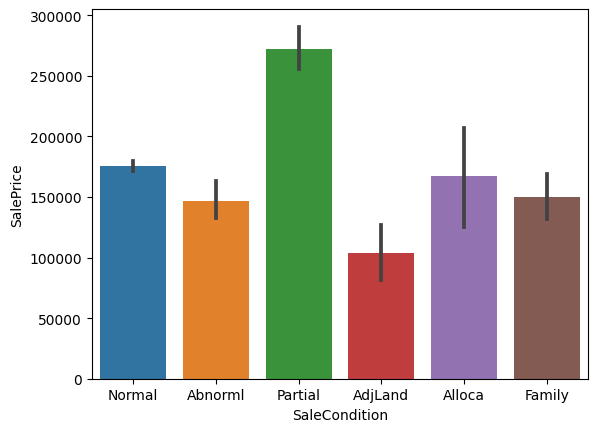

In [253]:
sns.barplot(x=data.SaleCondition, y=data.SalePrice);

Берем

In [254]:
_sr = data.groupby("SaleCondition").SalePrice.median()
_sr

SaleCondition
Abnorml    130000.0
AdjLand    104000.0
Alloca     148145.0
Family     140500.0
Normal     160000.0
Partial    244600.0
Name: SalePrice, dtype: float64

In [255]:
df["saleCond"] = round(data.SaleCondition.map(_sr.to_dict()) / _sr.max(), 2)
df.head()

,subclass_price,lot_area,pav_strt,grav_al,pav_al,regShape,lvlContour,hlsContour,bnkContour,Neighborhood,...,woodDeckSF,openPorchSF,enclosedPorch,screenPorch,pool,poolQC,Fence,miscFeature,SaleType,saleCond
Id,,,,,,,,,,,,,,,,,,,,,
1,239948.501672,8450,1,0,0,1,1,0,0,197965.773333,...,0,61,0,0,0,0,1.0,0.66,0.63,0.65
2,185224.811567,9600,1,0,0,1,1,0,0,238772.727273,...,298,0,0,0,0,0,1.0,0.66,0.63,0.65
3,239948.501672,11250,1,0,0,0,1,0,0,197965.773333,...,0,42,0,0,0,0,1.0,0.66,0.63,0.65
4,166772.416667,9550,1,0,0,0,1,0,0,210624.725490,...,0,35,272,0,0,0,1.0,0.66,0.63,0.53
5,239948.501672,14260,1,0,0,0,1,0,0,335295.317073,...,192,84,0,0,0,0,1.0,0.66,0.63,0.65


## SalePrice

In [256]:
df["salePrice"] = data.SalePrice

# Function for preparing data for further training

In [257]:
def category_to_num(df: pd.DataFrame, train_df: pd.DataFrame, feature: str, racc: int) -> pd.Series:
    """Convert category feature to number"""
    _sr = train_df.groupby(feature).SalePrice.median()
    _sr = round(df[feature].map(_sr.to_dict()) / _sr.max(), racc)
    _sr.fillna(0, inplace=True)
    return _sr

In [258]:
def prepare_data(df: pd.DataFrame, train_df: pd.DataFrame) -> pd.DataFrame:
    """Function for preparing data for further training"""
    racc = 3
    
    # MSSubClass
    _sr = train_df.groupby("MSSubClass").SalePrice.median()
    
    res_df = pd.DataFrame(df.MSSubClass).rename(
        columns={"MSSubClass": "subclassPrice"}
    )
    res_df.subclassPrice.replace(round(_sr / _sr.max(), racc).to_dict(), inplace=True)

    # LotArea
    res_df["lotArea"] = df.LotArea

    # pav_strt
    res_df["pavStrt"] = (df.Street == "Pave").astype(np.int64)

    # Alley
    res_df["gravAlley"] = (df.Alley == "Grvl").astype(np.int64)
    res_df["pavAlley"] = (df.Alley == "Pave").astype(np.int64)

    # lotShape
    res_df["regShape"] = (df.LotShape == "Reg").astype(np.int64)

    # LandContour
    res_df["lvlContour"] = (df.LandContour == "Lvl").astype(np.int64)
    res_df["hlsContour"] = (df.LandContour == "HLS").astype(np.int64)
    res_df["bnkContour"] = (df.LandContour == "Bnk").astype(np.int64)

    # Neighborhood
    res_df["neighborhood"] = category_to_num(df, train_df, "Neighborhood", racc)

    # BldgType
    res_df["bldgType"] = category_to_num(df, train_df, "BldgType", racc)

    # HouseStyle
    res_df["houseStyle"] = category_to_num(df, train_df, "HouseStyle", racc)

    # OverallQual
    res_df["overallQual"] = category_to_num(df, train_df, "OverallQual", racc)

    # OverallCond
    res_df["overallCond"] = category_to_num(df, train_df, "BldgType", racc)

    # YearBuilt
    _df = pd.DataFrame(data={"YearBuilt": train_df.YearBuilt.values,
                                       "SalePrice": train_df.SalePrice.values},
                                 index=train_df.index)
    _df["YearBuilt"] = round(_df["YearBuilt"], -1)
    _df.YearBuilt.replace({1870: 1890, 1880: 1890}, inplace=True)
    _sr = _df.groupby("YearBuilt").SalePrice.median()
    
    res_df["yearBuilt"] = round(df["YearBuilt"], -1)
    res_df["yearBuilt"].replace({1870: 1890, 1880: 1890}, inplace=True)
    res_df["yearBuilt"] = round(res_df.yearBuilt.map(_sr.to_dict()) / _sr.max(), racc)

    # YearRemodAdd
    _df = pd.DataFrame(data={"YearRemodAdd": data.YearRemodAdd.values,
                             "SalePrice": data.SalePrice.values},
                       index=data.index)
    
    _df["YearRemodAdd"] = round(_df["YearRemodAdd"], -1)
    _df.YearRemodAdd.replace({1870: 1890, 1880: 1890}, inplace=True)

    _sr = _df.groupby("YearRemodAdd").SalePrice.median()
    
    res_df["yearRemod"] = round(df["YearRemodAdd"], -1)
    res_df["yearRemod"].replace({1870: 1890, 1880: 1890}, inplace=True)
    res_df["yearRemod"] = round(res_df.yearRemod.map(_sr.to_dict()) / _sr.max(), racc)

    # RoofStyle
    res_df["gableRoof"] = (df.RoofStyle == "Gable").astype(np.int64)
    res_df["hipRoof"] = (df.RoofStyle == "Hip").astype(np.int64)

    # MasVnrType
    res_df["masBrkFace"] = (df.MasVnrType == "BrkFace").astype(np.int64)
    res_df["masBrkCmn"] = (df.MasVnrType == "BrkCmn").astype(np.int64)
    res_df["masStone"] = (df.MasVnrType == "Stone").astype(np.int64)

    # MasVnrArea
    for _df in [df, train_df]:
        _df.MasVnrArea.fillna(0, inplace=True)
    res_df["masVnrArea"] = df.MasVnrArea

    # ExterQual
    for _df in [df, train_df]:
        _df.ExterQual.replace(
            {"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1}, inplace=True)

    res_df["exterQual"] = category_to_num(df, train_df, "ExterQual", racc)

    # ExterCond
    for _df in [df, train_df]:
        _df.ExterCond.replace(
            {"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1}, inplace=True)

    res_df["exterCond"] = category_to_num(df, train_df, "ExterCond", racc)

    # Foundation
    for _df in [df, train_df]:
        _df.Foundation.replace(
            {"Stone": "Other", "Wood": "Other", "Slab": "Other"}, inplace=True)

    res_df["foundPConc"] = (df["Foundation"] == "PConc").astype(np.int64)
    res_df["foundCBlock"] = (df["Foundation"] == "CBlock").astype(np.int64)
    res_df["foundBrkTil"] = (df["Foundation"] == "BrkTil").astype(np.int64)

    # BsmtQual
    for _df in [df, train_df]:
         _df.BsmtQual.fillna(0, inplace=True)
         _df.BsmtQual.replace(
            {"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1}, inplace=True)

    res_df["bsmtQual"] = category_to_num(df, train_df, "BsmtQual", racc)

    # BsmtCond 
    for _df in [df, train_df]:
         _df.BsmtCond.fillna(0, inplace=True)
         _df.BsmtCond.replace(
            {"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1}, inplace=True)

    res_df["bsmtCond"] = category_to_num(df, train_df, "BsmtCond", racc)

    # BsmtExposure 
    for _df in [df, train_df]:
        _df.BsmtExposure.replace({"Gd": 3, "Av": 2, "Mn": 1, "No": 0}, inplace=True)
        _df.BsmtExposure.fillna(0, inplace=True)

    res_df["bsmtExpo"] = category_to_num(df, train_df, "BsmtExposure", racc)

    # BsmtFinType1
    for _df in [df, train_df]:
        _df.BsmtFinType1.fillna("NA", inplace=True)

    res_df["bsmtFunType1"] = category_to_num(df, train_df, "BsmtFinType1", racc)

    # BsmtFinSF1
    for _df in [df, train_df]:
        _df.BsmtFinSF1.fillna(0, inplace=True)
    res_df["bsmtFinSF1"] = pow(df.BsmtFinSF1 / 100, 2)

    # TotalBsmtSF 
    for _df in [df, train_df]:
        _df.TotalBsmtSF.fillna(0, inplace=True)
    res_df["totalBsmtSF"] = pow(df.TotalBsmtSF / 50, 2)

    # HeatingQC 
    for _df in [df, train_df]:
        _df.HeatingQC.replace({"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1}, inplace=True)

    res_df["heatingQC"] = category_to_num(df, train_df, "HeatingQC", racc)

    # CentralAir 
    res_df["centralAir"] = (df.CentralAir == "Y").astype(np.int64)

    # Electrical
    res_df["electr"] = (df.Electrical == "SBrkr").astype(np.int64)

    # 1stFlrSF 
    res_df["1stFlrSF"] = pow(df["1stFlrSF"] / 10, 1/2)

    # 2ndFlrSF 
    res_df["2ndFltSF"] = pow(df["2ndFlrSF"] / 50, 1/2)

    # LowQualFinSF 
    res_df["lowQualFin"] = (df.LowQualFinSF == 0).astype(np.int64)

    # GrLivArea 
    res_df["GrLivArea"] = df.GrLivArea

    # FullBath
    for _df in [df, train_df]:
        _df.FullBath.fillna(0, inplace=True)

    res_df["fullBath"] = category_to_num(df, train_df, "FullBath", racc)

    # KitchenQual 
    for _df in [df, train_df]:
        _df.KitchenQual.fillna("TA", inplace=True)
        _df.KitchenQual.replace(
            {"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1}, inplace=True)

    res_df["kitQual"] = category_to_num(df, train_df, "KitchenQual", racc)

    # TotRmsAbvGrd
    for _df in [df, train_df]:
        _df.TotRmsAbvGrd.fillna(2, inplace=True)

    res_df["totRmsAbvGrd"] = df.TotRmsAbvGrd.map(
        {2: 1, 3: 1, 4: 2, 5: 3, 6: 4, 7: 5, 8: 6, 9: 7, 10: 8, 11: 8, 12: 8, 13: 8, 14: 8, 15: 8})

    # Functional 
    for _df in [df, train_df]:
        _df.Functional.fillna("Typ", inplace=True)
        _df.Functional.replace(
            {"Maj1": 0, "Maj2": 0, "Min1": 0, "Min2": 0, "Mod": 0, "Sev": 0, "Typ": 1},
            inplace=True,
        )

    res_df["func"] = df.Functional.map({0: 0.8, 1: 1})

    # Fireplaces
    for _df in [df, train_df]:
        _df.Fireplaces.fillna(0, inplace=True)
    res_df["fireplaces"] = category_to_num(df, train_df, "Fireplaces", racc)

    # FireplaceQu
    for _df in [df, train_df]:
        _df.FireplaceQu.fillna(0, inplace=True)
        _df.FireplaceQu.replace({"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1}, inplace=True)

    _sr = train_df.groupby("FireplaceQu").SalePrice.median()
    _sr[0] = 0
    res_df["fireplaceQual"] = round(
        df.FireplaceQu.map(_sr.to_dict()) / _sr.max(), racc)

    # GarageType
    for _df in [df, train_df]:
        _df.GarageType.fillna('NA', inplace=True)
        _df.GarageType.replace({"CarPort": "NA", "Basment": "2Types"}, inplace=True)

    res_df["garageType"] = category_to_num(df, train_df, "GarageType", racc)

    # GarageYrBlt
    for _df in [df, train_df]:
        _df.GarageYrBlt.fillna(0, inplace=True)
        
        for _id in _df.index:
            year = _df.loc[_id, "GarageYrBlt"]
            if 0 < year <= 1990:
                _df.at[_id, "GarageYrBlt"] = 1990
            elif 1990 < year <= 2000:
                _df.at[_id, "GarageYrBlt"] = 2000
            elif 2000 < year:
                _df.at[_id, "GarageYrBlt"] = 2010

    res_df["garageYrBlt"] = category_to_num(df, train_df, "GarageYrBlt", racc)

    # GarageFinish
    for _df in [df, train_df]:
        _df.GarageFinish.fillna("NA", inplace=True)
        
    res_df["garageFin"] = category_to_num(df, train_df, "GarageFinish", racc)

    # GarageCars
    for _df in [df, train_df]:
        _df.GarageCars.fillna(0, inplace=True)

    res_df["garageCars"] = category_to_num(df, train_df, "GarageCars", racc)

    # GarageArea
    for _df in [df, train_df]:
        _df.GarageArea.fillna(0, inplace=True)
        
    res_df["garageArea"] = df.GarageArea

    # GarageQual
    for _df in [df, train_df]:
        _df.GarageQual.fillna(1, inplace=True)
        _df.GarageQual.replace({"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1}, inplace=True)

    res_df["garageQual"] = category_to_num(df, train_df, "GarageQual", racc)

    # GarageCond
    for _df in [df, train_df]:
        _df.GarageCond.fillna(1, inplace=True)
        _df.GarageCond.replace({"Ex": 5, "Gd": 5, "TA": 5, "Fa": 1, "Po": 1}, inplace=True)

    res_df["garageCond"] = category_to_num(df, train_df, "GarageCond", racc)

    # PavedDrive
    res_df["pavedDrive"] = category_to_num(df, train_df, "PavedDrive", racc)

    # WoodDeckSF 
    res_df["woodDeckSF"] = df.WoodDeckSF

    # OpenPorchSF 
    res_df["openPorchSF"] = df.OpenPorchSF

    # EnclosedPorch 
    res_df["enclosedPorch"] = df.EnclosedPorch

    # ScreenPorch 
    res_df["screenPorch"] = df.ScreenPorch

    # PoolArea 
    res_df["hasPool"] = (df.PoolArea > 0).astype(np.int64)

    # PoolQC 
    for _df in [df, train_df]:
        _df.PoolQC.fillna(0, inplace=True)

    res_df["poolQC"] = (df.PoolQC == "Ex").astype(np.int64)

    # Fence 
    for _df in [df, train_df]:
        _df.Fence.fillna("NA", inplace=True)

    res_df["fence"] = category_to_num(df, train_df, "Fence", racc)

    # MiscFeature 
    for _df in [df, train_df]:
        _df.MiscFeature.fillna("NA", inplace=True)

    res_df["miscFeature"] = category_to_num(df, train_df, "MiscFeature", racc)

    # SaleType 
    for _df in [df, train_df]:
        _df.SaleType.fillna("Other", inplace=True)
        _df.SaleType.replace({"COD": "Other", "CWD": "Other", "Con": "Other", "ConLD": "Other",
                              "ConLI": "Other", "ConLw": "Other", "Oth": "Other"},
                             inplace=True)

    res_df["saleType"] = category_to_num(df, train_df, "SaleType", racc)

    # SaleCondition 
    res_df["saleCond"] = category_to_num(df, train_df, "SaleCondition", racc)

    return res_df

# Machine Learning
## Load data

In [259]:
train_data = pd.read_csv("data/train.csv", index_col="Id")
test_data = pd.read_csv("data/test.csv", index_col="Id")
print(train_data.shape, test_data.shape)

(1460, 80) (1459, 79)


## Preparing data

In [260]:
from sklearn.model_selection import train_test_split
np.random.seed(42)

In [261]:
train_df = prepare_data(train_data, train_data)
test_df = prepare_data(test_data, train_data)

In [262]:
X_train, X_test, y_train, y_test = train_test_split(
    train_df, train_data.SalePrice, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1022, 64) (438, 64) (1022,) (438,)


## Training
### LinrearRegression
#### Train data

In [263]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [264]:
reg = LinearRegression(n_jobs=-1).fit(X_train, y_train)
print(reg.score(X_train, y_train), reg.score(X_test, y_test))

0.8737466379921017 0.870915818654127


In [265]:
mean_squared_error(y_test, reg.predict(X_test), squared=False)

30012.68932444399

#### Test data
Score at kaggle: 0.35376

In [266]:
pd.DataFrame(
    pd.Series(reg.predict(test_df), index=test_df.index),
    index=test_df.index,
    columns=["SalePrice"]
).to_csv("predictions_reg.csv")

### KNeighborsRegressor
#### Train data

In [267]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [268]:
knn_X_scaler = StandardScaler().fit(X_train)
knn_y_scaler = StandardScaler().fit(y_train.to_frame())

knn_X_train = knn_X_scaler.transform(X_train)
knn_y_train = knn_y_scaler.transform(y_train.to_frame())
knn_X_test = knn_X_scaler.transform(X_test)
knn_y_test = knn_y_scaler.transform(y_test.to_frame())

knn_test_df = knn_X_scaler.transform(test_df)

In [269]:
# knn_clf = GridSearchCV(
#     KNeighborsRegressor(n_jobs=-1),
#     {
#         "algorithm": ["ball_tree", "kd_tree", "brute"],
#         "n_neighbors": range(1, 21),  # range(1, 21),
#         "leaf_size": [20, 30, 40],  # [2, 3, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50],
#     },
#     n_jobs=-1,
#     cv=5,
# )

# knn_clf.fit(knn_X_train, knn_y_train)

# print(knn_clf.best_score_, knn_clf.best_estimator_)

In [270]:
knn = KNeighborsRegressor(algorithm='ball_tree', leaf_size=20, n_jobs=-1, n_neighbors=7)
knn.fit(knn_X_train, knn_y_train)

print(knn.score(knn_X_train, knn_y_train), knn.score(knn_X_test, knn_y_test))

0.819864835376759 0.8128405025164127


#### Test data
Score at kaggle: 11.56581

In [271]:
pd.DataFrame(
    pd.Series(abs(knn.predict(knn_test_df)).reshape(-1), index=test_df.index),
    index=test_df.index,
    columns=["SalePrice"]
).to_csv("predictions_knn.csv")

### DescisionTree
#### Train data

In [272]:
from sklearn.tree import DecisionTreeRegressor

In [273]:
dt = DecisionTreeRegressor(max_depth=7, random_state=42)
dt.fit(X_train, y_train)

print(dt.score(X_train, y_train), dt.score(X_test, y_test))

0.9336234473883962 0.8265379287782688


In [274]:
# dt_clf = GridSearchCV(
#     DecisionTreeRegressor(random_state=42),
#     {
#         "max_depth": range(1, 15),
#         "min_samples_split": range(2, 11),
#         "min_samples_leaf": range(1, 16),
#     },
#     n_jobs=-1,
#     cv=5,
#     verbose=4,
# )

# dt_clf.fit(X_train, y_train)
# print(dt_clf.best_score_, dt_clf.best_estimator_)

In [275]:
dt = DecisionTreeRegressor(max_depth=12, min_samples_leaf=8, random_state=42)
dt.fit(X_train, y_train)
print(dt.score(X_train, y_train), dt.score(X_test, y_test))

0.872821574103844 0.801422570117961


#### Test data
Score at kaggle: 0.19643

In [276]:
pd.DataFrame(
    pd.Series(dt.predict(test_df), index=test_df.index),
    index=test_df.index,
    columns=["SalePrice"]
).to_csv("predictions_dt.csv")

### RandomForestRegressor
#### Train data

In [277]:
from sklearn.ensemble import RandomForestRegressor

In [278]:
rf = RandomForestRegressor(n_estimators=10, max_depth=9, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

print(rf.score(X_train, y_train), rf.score(X_test, y_test))

0.9619482955202511 0.8940421582605828


In [279]:
# rf_clf = GridSearchCV(
#     RandomForestRegressor(
#         n_estimators=42, max_depth=12, random_state=42, n_jobs=-1),
#     {
#         # "criterion": ["squared_error", "absolute_error", "friedman_mse", "poisson"],
#         # "n_estimators": range(40, 91),
#         # "max_depth": range(1, 16),
#         "min_samples_split": range(2, 51),
#         "min_samples_leaf": range(1, 31),
#     },
#     n_jobs=-1,
#     cv=5,
#     verbose=2,
# )

# rf_clf.fit(X_train, y_train)
# print(rf_clf.best_score_, rf_clf.best_estimator_)

In [280]:
rf = RandomForestRegressor(n_estimators=420,
                           max_depth=12,
                           # min_samples_split=10,
                           random_state=42,
                           n_jobs=-1)
rf.fit(X_train, y_train)

print(rf.score(X_train, y_train), rf.score(X_test, y_test))

0.9782326170356247 0.902899718759316


#### Test data
Score at kaggle: 0.14918


In [281]:
pd.DataFrame(
    pd.Series(rf.predict(test_df), index=test_df.index),
    index=test_df.index,
    columns=["SalePrice"]
).to_csv("predictions_rf.csv")

### SGDRegressor
#### Train data

In [282]:
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [283]:
sgd_reg = make_pipeline(StandardScaler(),
                        SGDRegressor(max_iter=10000, alpha=0.0001, random_state=42))
sgd_reg.fit(X_train, y_train)

print(sgd_reg.score(X_train, y_train), sgd_reg.score(X_test, y_test))

0.8688992437955698 0.8633676240842001


In [284]:
sgd_clf = make_pipeline(
    StandardScaler(),
    GridSearchCV(
        SGDRegressor(random_state=42, max_iter=10000),
        {
            "alpha": [n / 100000 for n in range(1, 1001)],
        },
        n_jobs=-1,
        cv=5,
        verbose=2,
    )
)

sgd_clf.fit(X_train, y_train)
# print(sgd_clf.best_score_, sgd_clf.best_estimator_)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gridsearchcv',
                 GridSearchCV(cv=5,
                              estimator=SGDRegressor(max_iter=10000,
                                                     random_state=42),
                              n_jobs=-1,
                              param_grid={'alpha': [1e-05, 2e-05, 3e-05, 4e-05,
                                                    5e-05, 6e-05, 7e-05, 8e-05,
                                                    9e-05, 0.0001, 0.00011,
                                                    0.00012, 0.00013, 0.00014,
                                                    0.00015, 0.00016, 0.00017,
                                                    0.00018, 0.00019, 0.0002,
                                                    0.00021, 0.00022, 0.00023,
                                                    0.00024, 0.00025, 0.00026,
                                                    0.00027, 0.00028, 0.00029,
                                                    0.0003, ...]},
                              verbose=2))])

In [285]:
print(sgd_clf.score(X_train, y_train), sgd_clf.score(X_test, y_test))

0.8687368946871585 0.8631539563764794


### XGBoost
#### Train data

In [300]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

In [287]:
xgr = XGBRegressor(n_estimators=20, max_depth=5, n_jobs=-1, random_state=42)
xgr.fit(X_train, y_train)

print(xgr.score(X_train, y_train), xgr.score(X_test, y_test))

0.9806334375476962 0.9028213396278677


In [303]:
# xgr_rand = RandomizedSearchCV(
#     XGBRegressor(n_jobs=-1, random_state=42),
#     {
#         "n_estimators": range(10, 201),
#         "max_depth": range(1, 31),
#         "learning_rate": [n / 1000 for n in range(1, 1001)],
#     },
#     random_state=42,
#     cv=5,
#     n_jobs=-1,
#     verbose=2,
#     n_iter=100,
# )

# xgr_rand.fit(X_train, y_train)
# print(xgr_rand.best_estimator_,
#       xgr_rand.score(X_train, y_train),
#       xgr_rand.score(X_test, y_test))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.161, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=59, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...) 0.9352558131488959 0.9076482531821906


In [288]:
# xgr_clf = GridSearchCV(
#     XGBRegressor(max_depth=4, learning_rate=0.01, random_state=42, n_jobs=-1),
#     {
#         "n_estimators": range(500, 801, 10)
#         # "max_depth": range(2, 51),
#         # "learning_rate": [n / 1000000 for n in range(1, 101)],
#     },
#     cv=10,
#     n_jobs=-1,
#     verbose=2,
# )

# xgr_clf.fit(X_train, y_train)
# print(xgr_clf.best_estimator_,
#       xgr_clf.score(X_train, y_train),
#       xgr_clf.score(X_test, y_test))

In [316]:
xgr = XGBRegressor(
    n_estimators=800, learning_rate=0.01, max_depth=4, n_jobs=-1, random_state=42)
xgr.fit(X_train, y_train)

print(xgr.score(X_train, y_train), xgr.score(X_test, y_test))

0.9609811129798135 0.9227532583582558


#### Test data

In [317]:
pd.DataFrame(
    pd.Series(xgr.predict(test_df), index=test_df.index),
    index=test_df.index,
    columns=["SalePrice"]
).to_csv("predictions_xgr.csv")

### CatBoostRegressor
#### Train data

In [291]:
from catboost import CatBoostRegressor

In [292]:
cbr = CatBoostRegressor(iterations=20, learning_rate=1, depth=12, verbose=0)
cbr.fit(knn_X_train, knn_y_train)

print(cbr.score(knn_X_train, knn_y_train), cbr.score(knn_X_test, knn_y_test))

0.9975856933161958 0.8082002509176414


In [293]:
# cbr_clf = GridSearchCV(
#     CatBoostRegressor(depth=7, iterations=20, learning_rate=0.5, random_state=42, verbose=0),
#     {
#         # "iterations": range(10, 151, 10),
#         # "depth": range(1, 16),
#         # "learning_rate": [n / 100 for n in range(1, 101, 5)],
#     },
#     cv=5,
#     n_jobs=-1,
#     verbose=2
# )
# cbr_clf.fit(X_train, y_train)

# print(cbr_clf.best_estimator_.get_all_params())
# print(cbr_clf.score(X_train, y_train), cbr_clf.score(X_test, y_test))

In [296]:
cbr = CatBoostRegressor(verbose=0)
    # depth=7, learning_rate=0.5, iterations=210, random_state=42, verbose=0)
cbr.fit(X_train, y_train)

print(cbr.score(X_train, y_train), cbr.score(X_test, y_test))

0.9957833895494754 0.9237555390296324


#### Test data

In [299]:
pd.DataFrame(
    pd.Series(cbr.predict(test_df), index=test_df.index),
    index=test_df.index,
    columns=["SalePrice"]
).to_csv("predictions_cbr.csv")

### LGBMRegressor
#### Train data

In [318]:
from lightgbm import LGBMRegressor

In [335]:
lgb_clf = GridSearchCV(
    LGBMRegressor(n_estimators=50, n_jobs=-1, random_state=42, verbose=-1),
    {
        "max_depth": range(1, 8),
        "boosting_type": ["gbdt", "dart", "rf"],
        "learning_rate": [n / 100 for n in range(1, 101, 10)],
    },
    cv=5,
    n_jobs=-1,
    verbose=2,
)

lgb_clf.fit(X_train, y_train)

print(lgb_clf.best_estimator_.get_params())
print(lgb_clf.score(X_train, y_train), lgb_clf.score(X_test, y_test))

Fitting 5 folds for each of 210 candidates, totalling 1050 fits
{'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 1.0, 'importance_type': 'split', 'learning_rate': 0.11, 'max_depth': 3, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 50, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': 42, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'subsample': 1.0, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'verbose': -1}
0.924044603582808 0.9020839788752418


C:\Users\vlad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
350 fits failed out of a total of 1050.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
350 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\vlad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\vlad\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\sklearn.py", line 1049, in fit
    super().fit(
  File "C:\Users\vlad\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\sklearn.py", line 842,

In [346]:
lgb = LGBMRegressor(n_estimators=340,
                    max_depth=3,
                    boosting_type="gbdt",
                    learning_rate=0.1,
                    n_jobs=-1,
                    random_state=42,
                    verbose=-1)

lgb.fit(X_train, y_train)
print(lgb.score(X_train, y_train), lgb.score(X_test, y_test))

0.9788858897729338 0.9091860289221771


#### Test data

In [347]:
pd.DataFrame(
    pd.Series(lgb.predict(test_df), index=test_df.index),
    index=test_df.index,
    columns=["SalePrice"]
).to_csv("predictions_lgb.csv")

### Combinations of different machine learning models
#### Train data

In [349]:
from sklearn.model_selection import KFold, cross_val_score

In [354]:
legend_models = {
    "catboost": CatBoostRegressor(verbose=0),
    "xgb": XGBRegressor(),
    "lgbm": LGBMRegressor(verbose=-1),
}

for name, model in legend_models.items():
    model.fit(X_train, y_train)
    print(f"{name!r} trained")

legend_results = {}
kf = KFold(n_splits=10)

for name, model in legend_models.items():
    res = np.sqrt(np.abs(cross_val_score(
        model, X_train, y_train, scoring="neg_mean_squared_error", cv=kf,
    )))
    legend_results[name] = np.mean(res)

for name, res in legend_results.items():
    print(f"{name!r} mean error: {res}")

'catboost' trained
'xgb' trained
'lgbm' trained
'catboost' mean error: 25948.15277975062
'xgb' mean error: 30450.85624758869
'lgbm' mean error: 28954.56136431467


In [355]:
for name, model in legend_models.items():
    print(f"{name!r} train score: {model.score(X_train, y_train)}, test score: {model.score(X_test, y_test)}")

'catboost' train score: 0.9957833895494754, test score: 0.9237555390296324
'xgb' train score: 0.9998735593237368, test score: 0.9051069459013371
'lgbm' train score: 0.9768273173455798, test score: 0.9041095290008494


#### Test data

In [356]:
legend_preds = {}

for name, model in legend_models.items():
    legend_preds.update({name: model.predict(test_df)})

y_pred_legend_models = (
    0.4 * legend_preds["catboost"] +
    0.3 * legend_preds["xgb"] +
    0.3 * legend_preds["lgbm"]
)

In [358]:
y_pred_legend_models

array([129282.11500057, 157661.21527475, 190586.41472968, ...,
       153312.77268595, 117816.45339655, 202470.0884424 ])

In [359]:
pd.DataFrame(
    y_pred_legend_models,
    index=test_df.index,
    columns=["SalePrice"]
).to_csv("predictions_legend.csv")